# forward

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np


from sklearn.metrics import mean_squared_error
from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error, max_error, mean_absolute_percentage_error

import math

from sklearn.preprocessing import PowerTransformer
import h5py
from keras.models import load_model

ModuleNotFoundError: No module named 'pandas'

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_excel('database_new.xlsx')

In [75]:
parameters=[{'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.5,1],
            'kernel':['rbf'],
            'gamma':[0, 0.0001, 0.001, 0.01,0.05,0.5, 0.75, 1]}]

In [9]:
#GridSearchCV

In [19]:
X = df.iloc[:, :8]
Y = df.iloc[:, 25:28]
X_train, X_test, Y_train, Y_test = train_test_split(
            X, Y,
            test_size=0.30,
            random_state=10)
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.00000000001)


print(pd.DataFrame({'cols':X.columns,'box_cox_lambdas':pt.lambdas_}))

regressor= KernelRidge()
model=regressor.fit(X_train_transformed,Y_train)
grid_search=GridSearchCV(estimator=model,
                        param_grid=parameters,
                         cv=2,
                         scoring='neg_mean_absolute_error',
                        n_jobs=-1
                        )
grid_search= grid_search.fit(X_train_transformed,Y_train)
print('Best score in CV: ', grid_search.best_score_)
print('Best parameters in CV: ', grid_search.best_params_)

parameter_alpha=grid_search.best_params_['alpha']
parameter_kernel=grid_search.best_params_['kernel']
parameter_gamma=grid_search.best_params_['gamma']
print(parameter_alpha)
print(parameter_gamma)

                          cols  box_cox_lambdas
0                   wavelength        -1.842183
1            fractal_dimension         0.695022
2          fraction_of_coating         0.251718
3        primary_particle_size        -3.483052
4  number_of_primary_particles         0.107926
5        vol_equi_radius_outer         0.213253
6        vol_equi_radius_inner         0.323777
7            equi_mobility_dia         0.178926
Best score in CV:  -0.0039057469898519637
Best parameters in CV:  {'alpha': 0.0001, 'gamma': 0.75, 'kernel': 'rbf'}
0.0001
0.75


# Leave nothing out (KRR)

In [ ]:
X = df.iloc[:, :8]
Y = df.iloc[:, 25:28]
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X+0.00000000001)
X_test_transformed = pt.transform(X+0.000000001)


print(pd.DataFrame({'cols':X.columns,'box_cox_lambdas':pt.lambdas_}))

regressor = KernelRidge(alpha=0.0001, gamma=0.75, kernel='rbf')


model = regressor.fit(X_train_transformed,Y)


Y_pred = model.predict(X_test_transformed)

Y_pred_KRR = pd.DataFrame(data=Y_pred, columns=["q_abs_pred_KRR", "q_sca_pred_KRR","g_pred_KRR"])
#Y_test.reset_index(inplace=True)
#Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y, Y_pred_KRR, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping



                          cols  box_cox_lambdas
0                   wavelength        -1.870511
1            fractal_dimension         0.685715
2          fraction_of_coating         0.251460
3        primary_particle_size        -3.454972
4  number_of_primary_particles         0.107769
5        vol_equi_radius_outer         0.211453
6        vol_equi_radius_inner         0.323308
7            equi_mobility_dia         0.177450


In [76]:
def min_max_error_efficiency(y_test, y_pred):
    abs_error = abs(y_test - y_pred)
    max_error, efficiency_max= np.max(abs_error), y_test[np.argmax(abs_error)]
    min_error, efficiency_min= np.min(abs_error), y_test[np.argmin(abs_error)]
    
    return max_error, efficiency_max, min_error, efficiency_min
    

# Random split (KRR)

In [77]:
X = df.iloc[:, :8]
Y = df.iloc[:, 25:28]
X_train, X_test, Y_train, Y_test = train_test_split(
            X, Y,
            test_size=0.30,
            random_state=10)
pt = PowerTransformer(method='box-cox')

X_test=X_test.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)

X_train_transformed = pt.fit_transform(X_train+0.00000000001)
X_test_transformed = pt.transform(X_test+0.000000001)




print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))

regressor = KernelRidge(alpha=0.0001, gamma=0.75, kernel='rbf')


model = regressor.fit(X_train_transformed,Y_train)


Y_pred = model.predict(X_test_transformed)


Y_pred_KRR = pd.DataFrame(data=Y_pred, columns=["q_abs_pred_KRR", "q_sca_pred_KRR","g_pred_KRR"])
#Y_test.reset_index(inplace=True)
#Y_test.drop('index',axis=1, inplace=True)
mean_abs_error = mean_absolute_error(Y_test, Y_pred_KRR, multioutput='raw_values')

max_error_q_abs, q_abs_max, min_error_q_abs, q_abs_min = min_max_error_efficiency(Y_test['q_abs'], Y_pred_KRR['q_abs_pred_KRR'])
max_error_q_sca, q_sca_max, min_error_q_sca, q_sca_min = min_max_error_efficiency(Y_test['q_sca'], Y_pred_KRR['q_sca_pred_KRR'])
max_error_g, g_max, min_error_g, g_min = min_max_error_efficiency(Y_test['g'], Y_pred_KRR['g_pred_KRR'])

mape  = mean_absolute_percentage_error(Y_test, Y_pred_KRR, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', mean_abs_error)
print(f'Max error is {max_error_q_abs} for  q_abs {q_abs_max} on test set')
print(f'Min error is {min_error_q_abs} for  q_abs {q_abs_min} on test set')

print(f'Max error is {max_error_q_sca} for  q_sca {q_sca_max} on test set')
print(f'Min error is {min_error_q_sca} for  q_sca {q_sca_min} on test set')

print(f'Max error is {max_error_g} for  g {g_max} on test set')
print(f'Min error is {min_error_g} for  g {g_min} on test set')


print('Mean absolute percentage error on test set: ', mape)
# Running and logging model plus Early stopping



                          cols  box_cox_lambdas
0                   wavelength        -1.842183
1            fractal_dimension         0.695022
2          fraction_of_coating         0.251718
3        primary_particle_size        -3.483052
4  number_of_primary_particles         0.107926
5        vol_equi_radius_outer         0.213253
6        vol_equi_radius_inner         0.323777
7            equi_mobility_dia         0.178926
Mean absolute error on test set:  [0.00220497 0.00194241 0.00440487]
Max error is 0.17486031823298648 for  q_abs 0.47018 on test set
Min error is 4.882928273941545e-07 for  q_abs 0.51706 on test set
Max error is 0.14892393867148002 for  q_sca 1.1128 on test set
Min error is 2.566405401015562e-07 for  q_sca 0.0065846 on test set
Max error is 0.14044634167219383 for  g 0.68108 on test set
Min error is 1.9431198348962564e-07 for  g 0.0056895 on test set
Mean absolute percentage error on test set:  [0.00429755 0.01588793 0.0175978 ]


In [78]:
X_test

,wavelength,fractal_dimension,fraction_of_coating,primary_particle_size,number_of_primary_particles,vol_equi_radius_outer,vol_equi_radius_inner,equi_mobility_dia
0,467,2.9,1,15.1,155.0,81.112449,80.575280,314.102655
1,467,2.7,5,15.3,550.0,125.356154,122.898191,607.158243
2,660,1.9,60,20.4,95.0,93.083214,68.443540,330.593796
3,467,2.9,0,15.0,34.0,48.594177,48.594177,143.936521
4,660,1.5,25,16.5,18.0,43.242233,39.311121,114.471775
...,...,...,...,...,...,...,...,...
5553,467,2.9,90,29.0,26.0,85.912386,44.437441,242.694480
5554,530,2.5,60,20.4,95.0,93.083214,68.443540,330.593796
5555,530,2.7,15,15.8,7.0,30.224313,28.693968,67.714641
5556,660,1.7,80,25.6,50.0,94.311206,55.260472,299.047490


In [79]:
Y_test

,q_abs,q_sca,g
0,1.24230,0.653110,0.411450
1,1.65230,1.216400,0.761700
2,0.37741,0.076234,0.554980
3,0.73500,0.151020,0.124590
4,0.30227,0.015495,0.151920
...,...,...,...
5553,0.48824,0.360820,0.412310
5554,0.57085,0.251440,0.521190
5555,0.30511,0.012923,0.040875
5556,0.20742,0.062839,0.477510


In [80]:
Y_pred_KRR

,q_abs_pred_KRR,q_sca_pred_KRR,g_pred_KRR
0,1.241571,0.653237,0.411513
1,1.654579,1.221464,0.760069
2,0.377744,0.076026,0.561506
3,0.737111,0.151313,0.125112
4,0.302274,0.015449,0.150391
...,...,...,...
5553,0.488370,0.360848,0.413011
5554,0.570699,0.251606,0.518406
5555,0.305084,0.012860,0.040432
5556,0.207149,0.062406,0.482208


In [81]:
# df_new= df.sort_values(by = ['equi_mobility_dia'])

X = df.iloc[:, :8]
Y = df.iloc[:, 25:28]
X_train, X_test, Y_train, Y_test = train_test_split(
            X, Y,
            test_size=0.30,
            random_state=10)
pt = PowerTransformer(method='box-cox')

X_test=X_test.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)

X_train_transformed = pt.fit_transform(X_train+0.00000000001)
X_test_transformed = pt.transform(X_test+0.000000001)


print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))


model = load_model('best_model_forward_random.hdf5')
Y_pred_NN = model.predict(X_test_transformed)

Y_test = pd.DataFrame(data=Y_test, columns=["q_abs", "q_sca","g"])

Y_pred_NN = pd.DataFrame(data=Y_pred_NN, columns=["q_abs_pred_NN", "q_sca_pred_NN","g_pred_NN"])
#Y_test.reset_index(inplace=True)
#Y_test.drop('index',axis=1, inplace=True)
mean_abs_error = mean_absolute_error(Y_test, Y_pred_NN, multioutput='raw_values')
max_error_q_abs, q_abs_max, min_error_q_abs, q_abs_min = min_max_error_efficiency(Y_test['q_abs'], Y_pred_NN['q_abs_pred_NN'])
max_error_q_sca, q_sca_max, min_error_q_sca, q_sca_min = min_max_error_efficiency(Y_test['q_sca'], Y_pred_NN['q_sca_pred_NN'])
max_error_g, g_max, min_error_g, g_min = min_max_error_efficiency(Y_test['g'], Y_pred_NN['g_pred_NN'])

mape  = mean_absolute_percentage_error(Y_test, Y_pred_KRR, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', mean_abs_error)
print(f'Max error is {max_error_q_abs} for  q_abs {q_abs_max} on test set')
print(f'Min error is {min_error_q_abs} for  q_abs {q_abs_min} on test set')

print(f'Max error is {max_error_q_sca} for  q_sca {q_sca_max} on test set')
print(f'Min error is {min_error_q_sca} for  q_sca {q_sca_min} on test set')

print(f'Max error is {max_error_g} for  g {g_max} on test set')
print(f'Min error is {min_error_g} for  g {g_min} on test set')


print('Mean absolute percentage error on test set: ', mape)

                          cols  box_cox_lambdas
0                   wavelength        -1.842183
1            fractal_dimension         0.695022
2          fraction_of_coating         0.251718
3        primary_particle_size        -3.483052
4  number_of_primary_particles         0.107926
5        vol_equi_radius_outer         0.213253
6        vol_equi_radius_inner         0.323777
7            equi_mobility_dia         0.178926
174/174 [==============================] - 0s 2ms/step
Mean absolute error on test set:  [0.00391732 0.00306736 0.00387666]
Max error is 0.34592148021698 for  q_abs 0.84404 on test set
Min error is 4.516649246277815e-07 for  q_abs 0.18927 on test set
Max error is 0.17263275958538055 for  q_sca 0.36489 on test set
Min error is 4.8495292670480694e-08 for  q_sca 0.083974 on test set
Max error is 0.2260522367763519 for  g 0.60298 on test set
Min error is 3.982162475324458e-07 for  g 0.50319 on test set
Mean absolute percentage error on test set:  [0.00429755 0.01588

In [82]:
Y_pred_NN

,q_abs_pred_NN,q_sca_pred_NN,g_pred_NN
0,1.237860,0.648997,0.417312
1,1.649431,1.213009,0.769260
2,0.371408,0.082692,0.550921
3,0.736295,0.150601,0.123354
4,0.301690,0.015097,0.159164
...,...,...,...
5553,0.480146,0.365227,0.410568
5554,0.562278,0.248012,0.518282
5555,0.310110,0.012659,0.041609
5556,0.195463,0.064066,0.472443


In [83]:
Y_test


,q_abs,q_sca,g
0,1.24230,0.653110,0.411450
1,1.65230,1.216400,0.761700
2,0.37741,0.076234,0.554980
3,0.73500,0.151020,0.124590
4,0.30227,0.015495,0.151920
...,...,...,...
5553,0.48824,0.360820,0.412310
5554,0.57085,0.251440,0.521190
5555,0.30511,0.012923,0.040875
5556,0.20742,0.062839,0.477510


In [84]:
df_random=pd.concat([X_test, Y_test, Y_pred_KRR, Y_pred_NN], axis =1)
df_random= df_random.sort_values(by=['equi_mobility_dia'])
df_random=df_random.reset_index(drop=True)
df_random

,wavelength,fractal_dimension,fraction_of_coating,primary_particle_size,number_of_primary_particles,vol_equi_radius_outer,vol_equi_radius_inner,equi_mobility_dia,q_abs,q_sca,g,q_abs_pred_KRR,q_sca_pred_KRR,g_pred_KRR,q_abs_pred_NN,q_sca_pred_NN,g_pred_NN
0,467,2.1,1,15.1,0.5,11.984878,11.905508,16.845238,0.19030,0.001535,0.007075,0.189197,0.001467,0.007676,0.191618,-0.000401,0.006255
1,530,2.7,1,15.1,0.5,11.984878,11.905508,16.845238,0.15654,0.000930,0.005690,0.157428,0.000913,0.005028,0.157313,-0.000056,0.005224
2,530,1.9,1,15.1,0.5,11.984878,11.905508,16.845238,0.15654,0.000930,0.005690,0.156884,0.001103,0.003680,0.158485,-0.000159,0.005077
3,660,1.7,1,15.1,0.5,11.984878,11.905508,16.845238,0.11691,0.000389,0.003798,0.115879,0.000411,0.003242,0.120277,-0.000387,0.003185
4,530,1.5,1,15.1,0.5,11.984878,11.905508,16.845238,0.15654,0.000930,0.005690,0.156931,0.000471,0.007244,0.159567,-0.000236,0.005130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5553,660,1.7,90,29.0,1000.0,290.000000,150.000000,1561.074003,0.45311,0.354780,0.691440,0.451866,0.348332,0.679414,0.474286,0.370146,0.695052
5554,467,1.9,90,29.0,1000.0,290.000000,150.000000,1561.074003,1.52690,1.242700,0.746010,1.517814,1.244697,0.746286,1.524537,1.240346,0.761322
5555,660,2.1,90,29.0,1000.0,290.000000,150.000000,1561.074003,0.45050,0.538040,0.800940,0.449562,0.529062,0.793820,0.459841,0.542338,0.808088
5556,530,1.7,90,29.0,1000.0,290.000000,150.000000,1561.074003,0.86752,0.605280,0.700670,0.868847,0.606520,0.704639,0.863679,0.602023,0.699706


In [85]:
#Residual plots


In [93]:
plt.scatter(df_random['g'],df_random['g']-df_random['g_pred_KRR'])
plt.scatter(df_random['g'],df_random['g']-df_random['g_pred_NN'])
plt.xlabel('g')
plt.ylabel('residuals')

Text(0, 0.5, 'residuals')

FileNotFoundError: missing font metrics file: cmr10

<Figure size 432x288 with 1 Axes>

In [71]:
plt.scatter(df_random['q_abs'],df_random['q_abs']-df_random['q_abs_pred_KRR'])
plt.scatter(df_random['q_abs'],df_random['q_abs']-df_random['q_abs_pred_NN'])
plt.xlabel('q_abs')
plt.ylabel('residuals')

Text(0, 0.5, 'residuals')

FileNotFoundError: missing font metrics file: cmr10

<Figure size 432x288 with 1 Axes>

Text(0, 0.5, 'residuals')

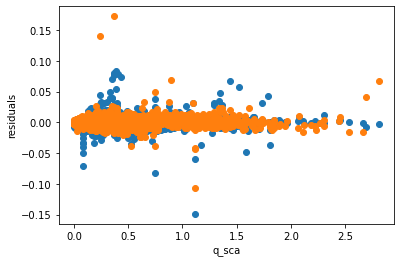

In [53]:
plt.scatter(df_random['q_sca'],df_random['q_sca']-df_random['q_sca_pred_KRR'])
plt.scatter(df_random['q_sca'],df_random['q_sca']-df_random['q_sca_pred_NN'])
plt.xlabel('q_sca')
plt.ylabel('residuals')

In [17]:
#bins to check variacne

94486

74


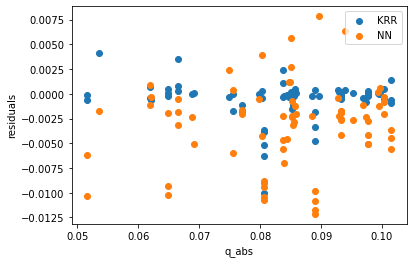

200


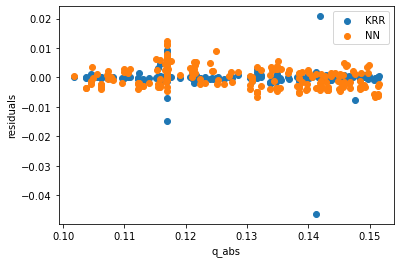

307


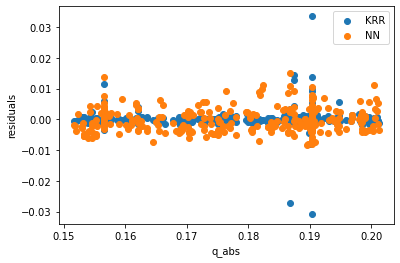

286


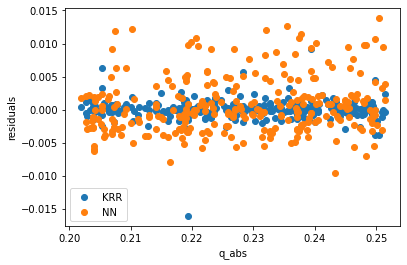

319


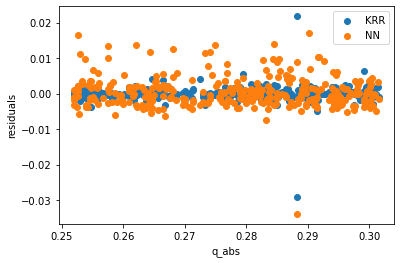

343


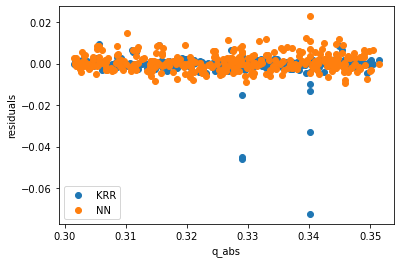

297


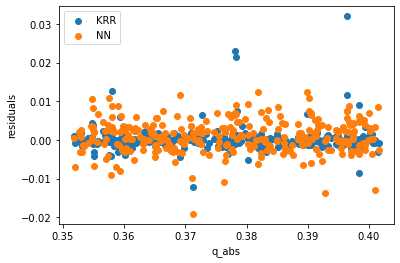

320


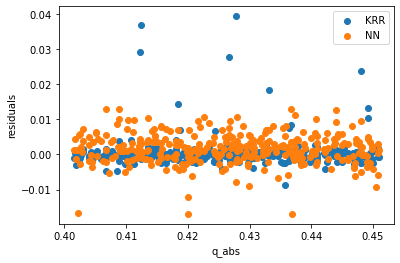

261


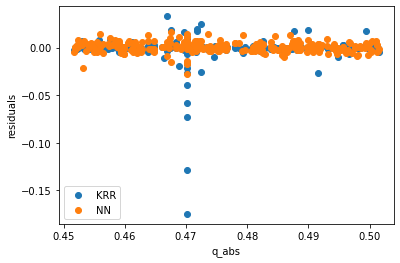

267


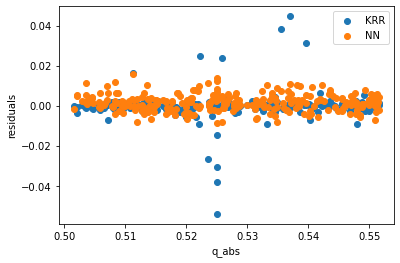

251


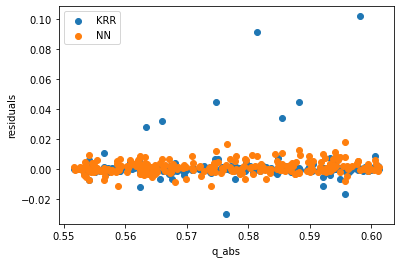

229


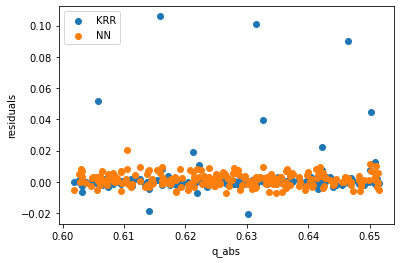

228


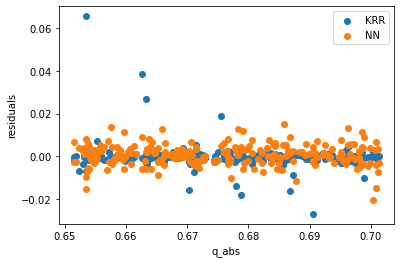

235


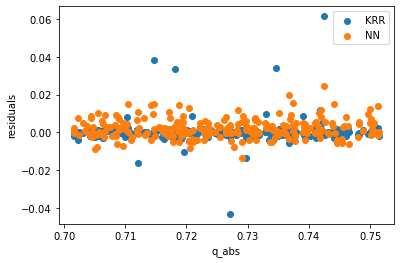

185


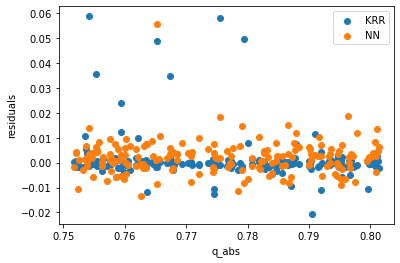

178


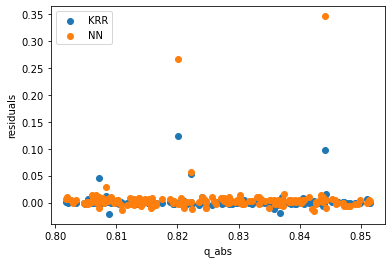

186


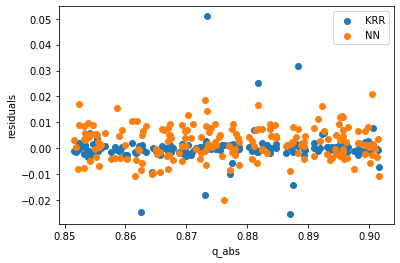

153


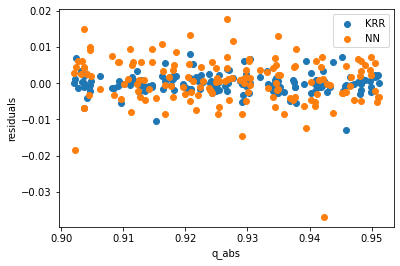

134


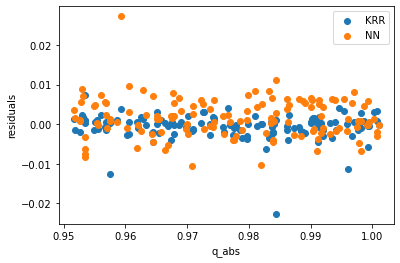

123


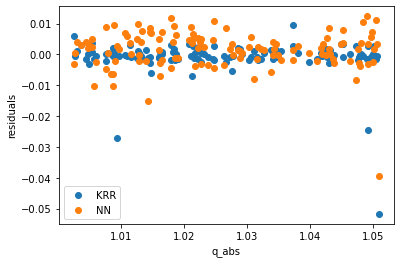

119


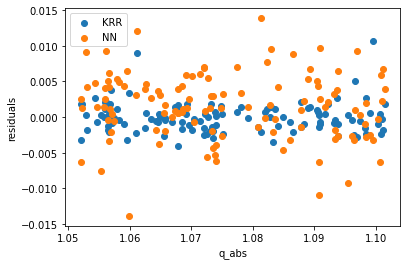

103


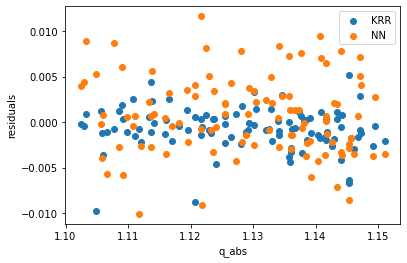

88


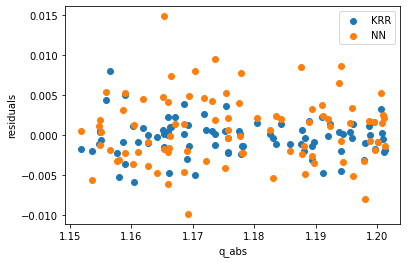

84


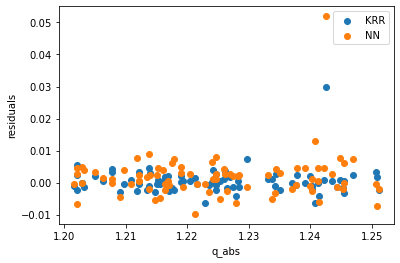

68


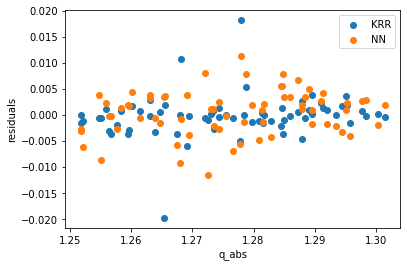

84


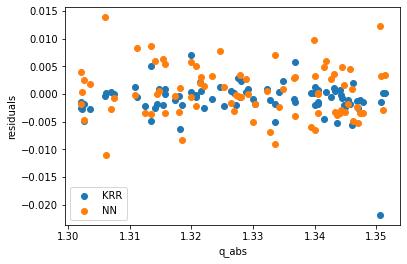

74


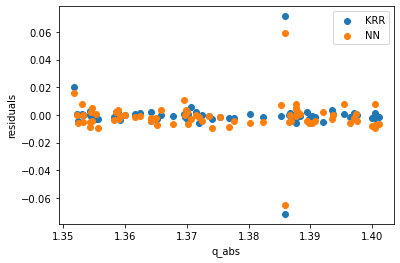

53


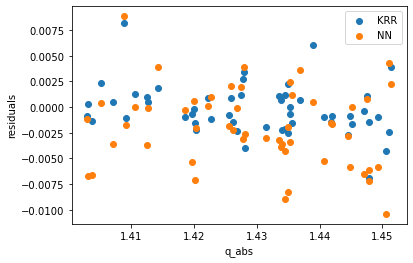

58


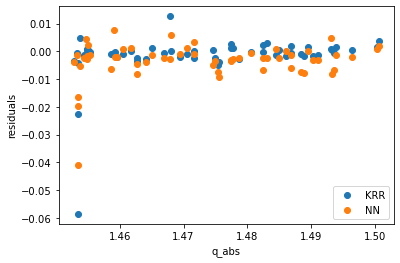

47


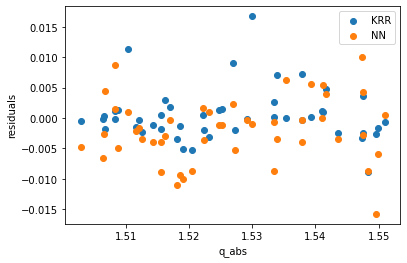

39


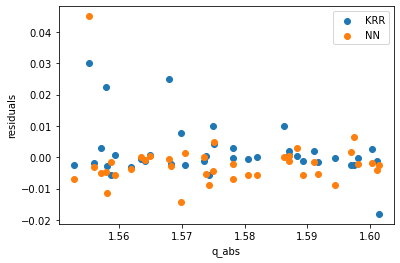

43


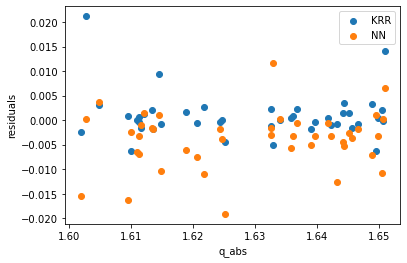

23


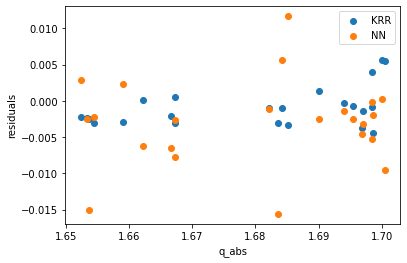

16


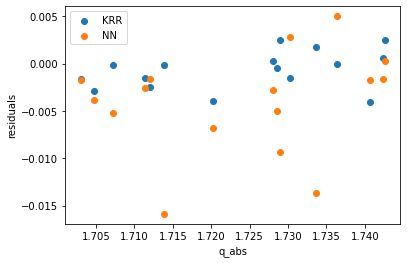

18


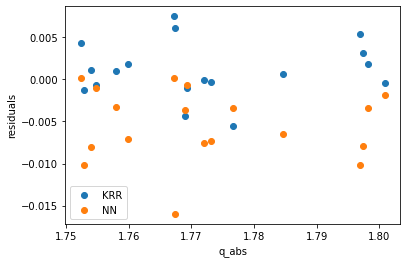

13


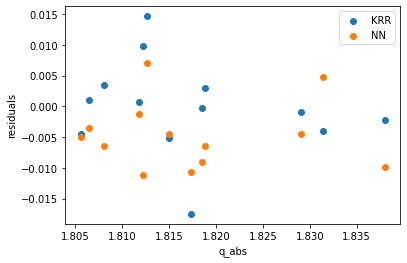

18


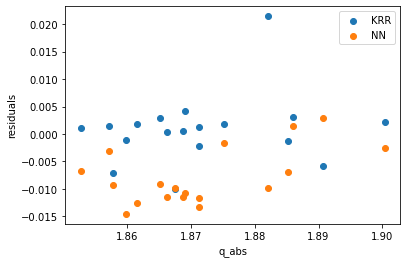

11


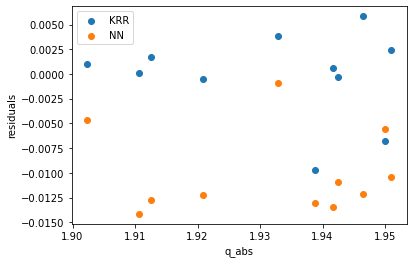

9


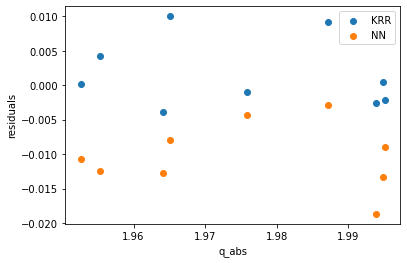

6


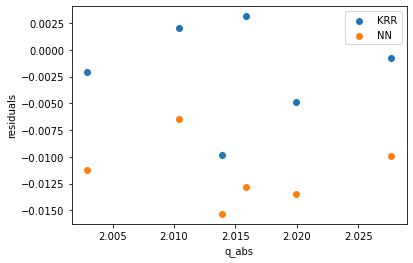

3


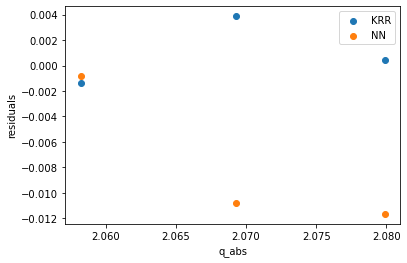

3


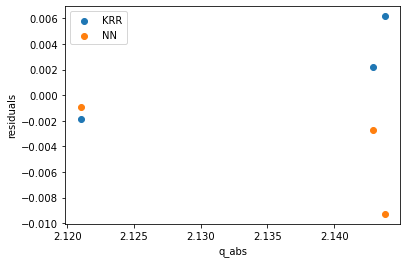

2


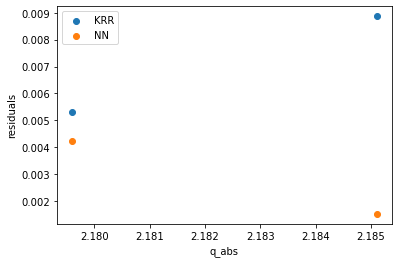

In [47]:
min_val= df_random['q_abs'].min()
max_val= df_random['q_abs'].max()

while min_val<=max_val:
    
    x = df_random[(df_random['q_abs']>=min_val) & (df_random['q_abs']<min_val+0.05)]['q_abs']
    y1 = df_random[(df_random['q_abs']>=min_val) & (df_random['q_abs']<min_val+0.05)]['q_abs_pred_KRR']
    y2 = df_random[(df_random['q_abs']>=min_val) & (df_random['q_abs']<min_val+0.05)]['q_abs_pred_NN']
    
    min_val+=0.05
    print(x.size)
    plt.scatter(x,x-y1, label = 'KRR')
    plt.scatter(x, x-y2, label = 'NN')
    plt.xlabel('q_abs')
    plt.ylabel('residuals')
    plt.legend()
    plt.show()
    

1661


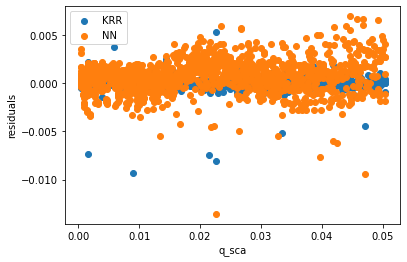

783


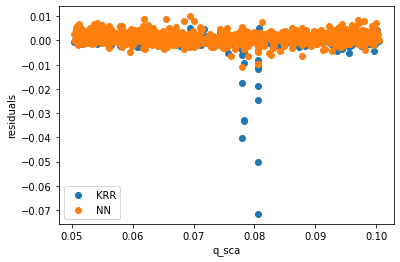

558


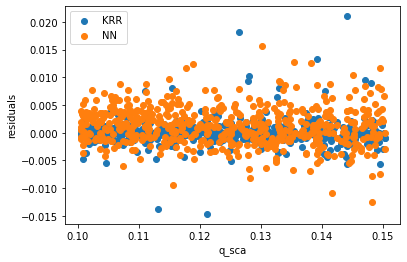

444


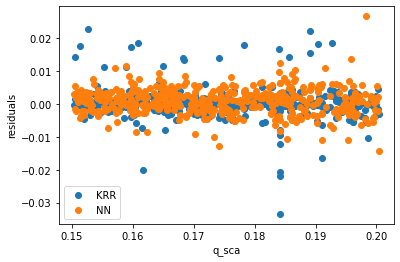

349


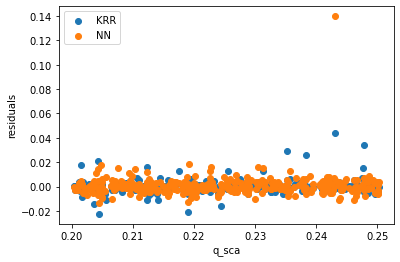

246


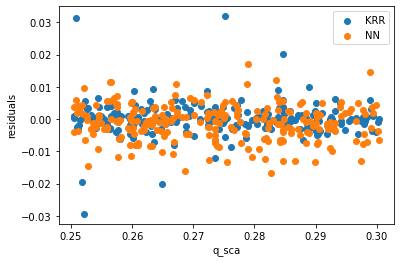

211


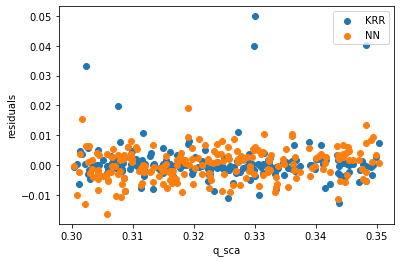

198


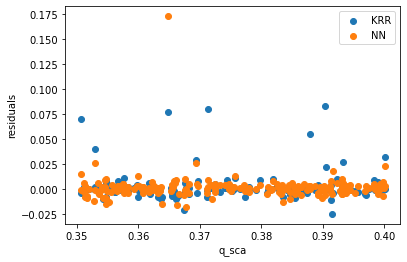

131


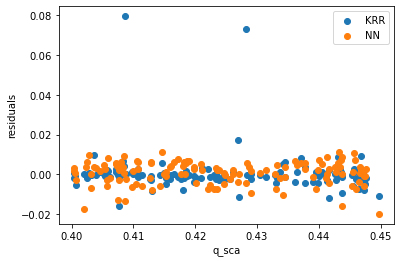

135


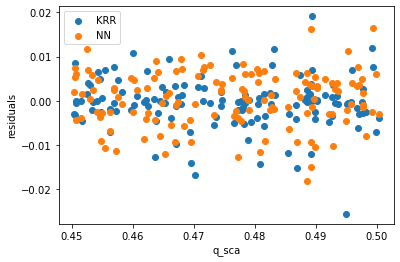

111


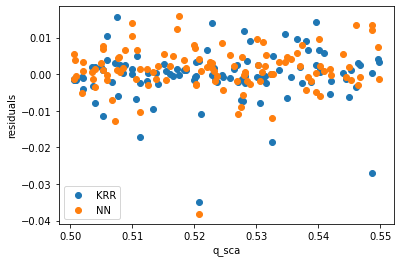

105


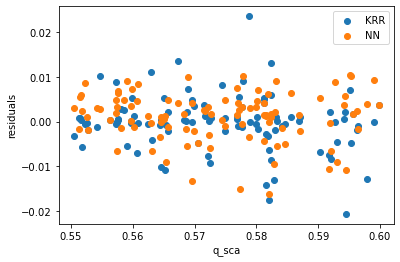

71


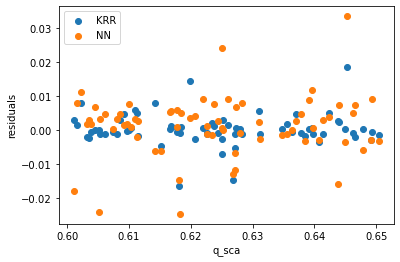

60


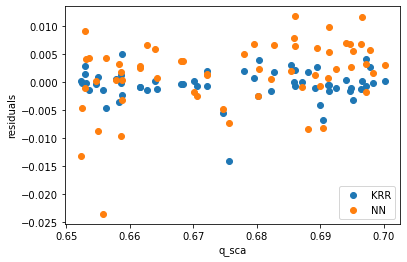

61


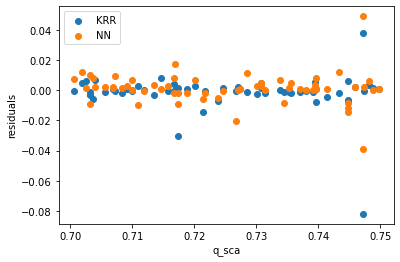

38


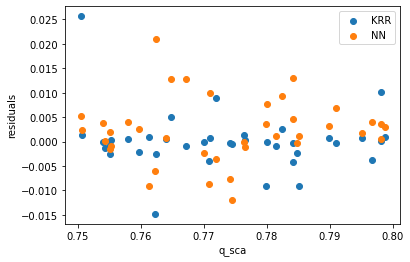

42


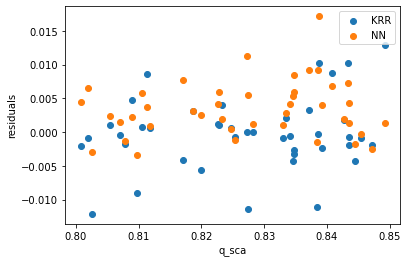

34


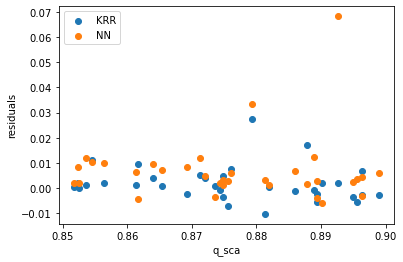

35


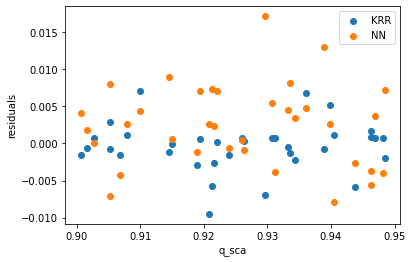

31


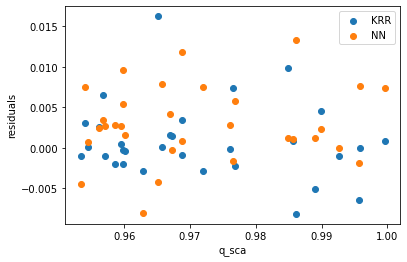

33


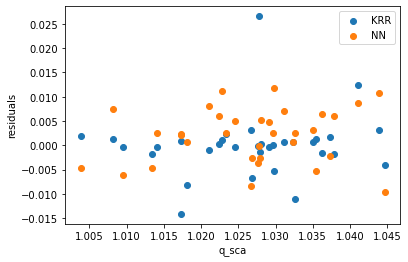

29


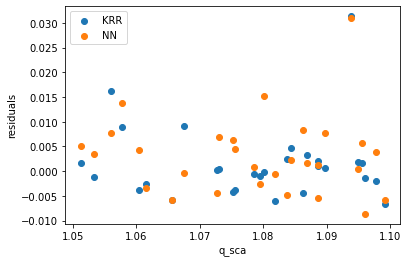

21


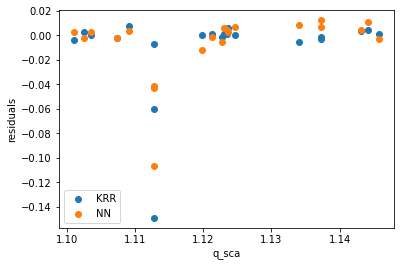

21


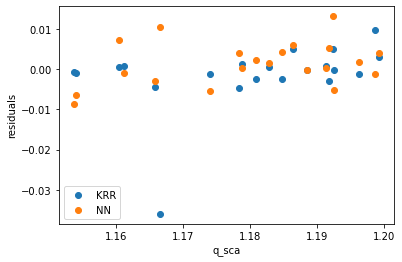

12


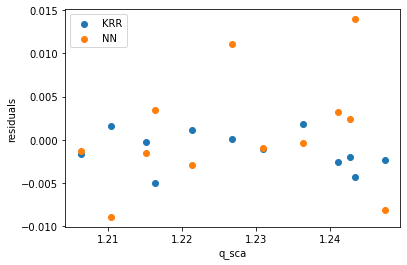

14


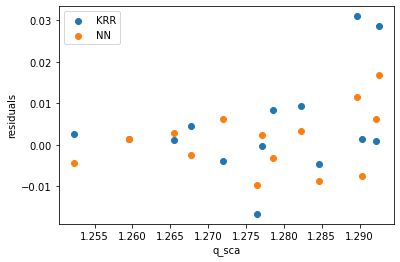

23


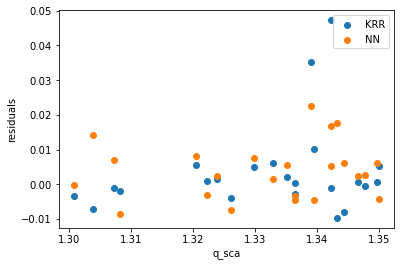

11


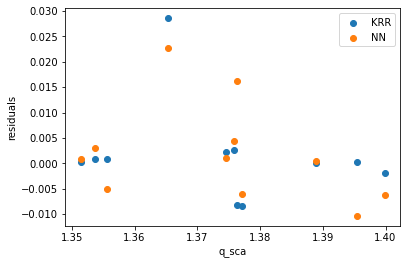

10


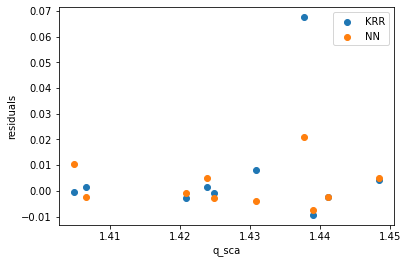

7


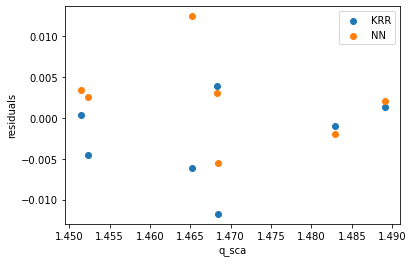

11


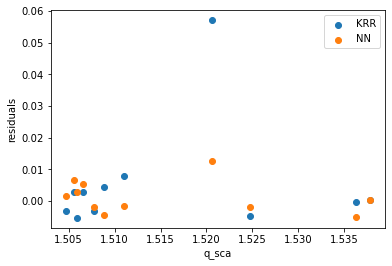

11


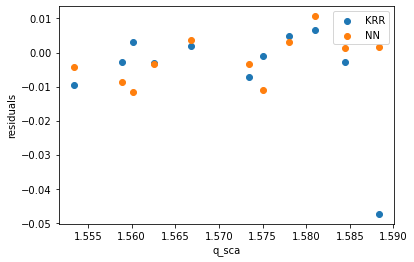

8


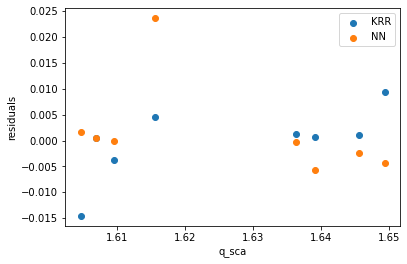

6


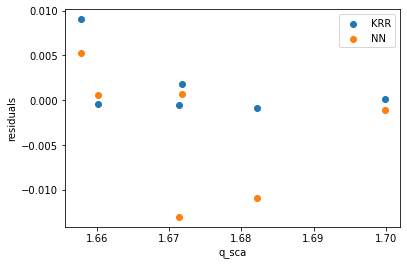

6


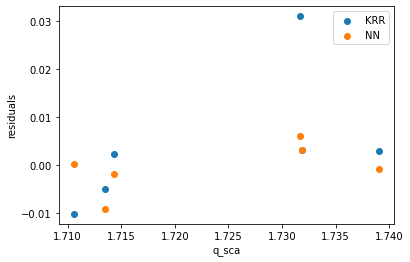

1


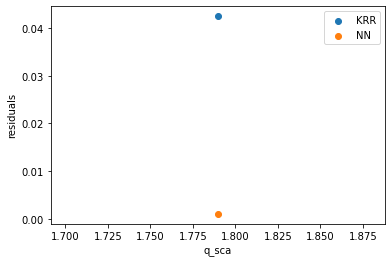

10


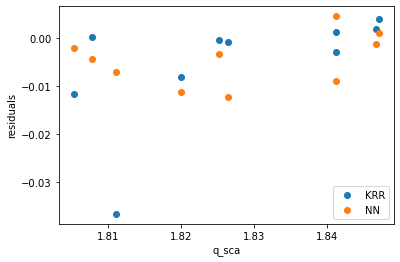

1


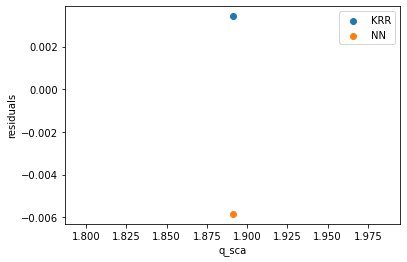

2


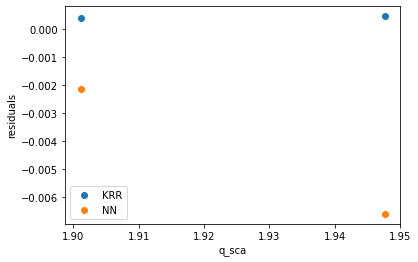

1


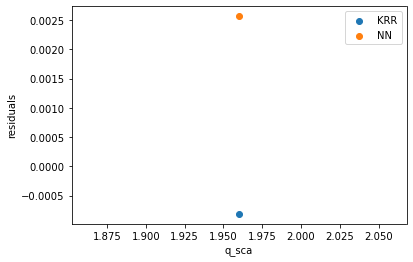

0


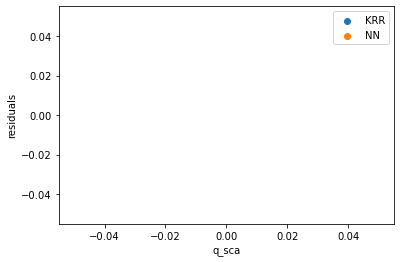

2


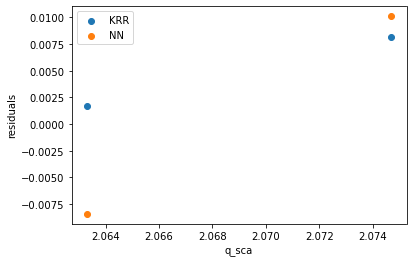

2


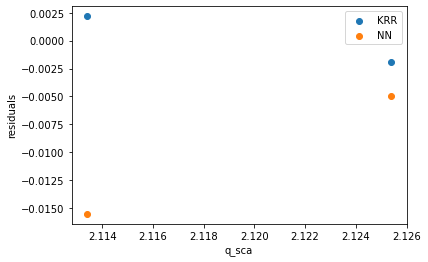

1


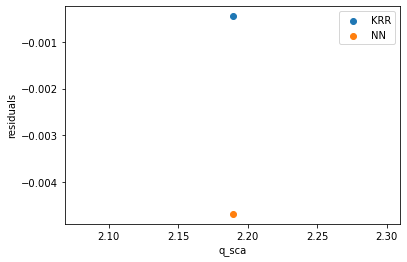

2


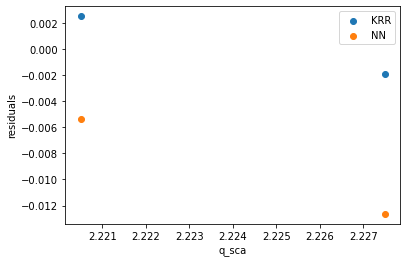

1


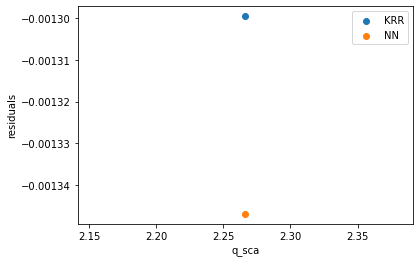

2


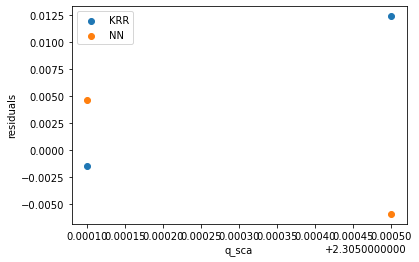

0


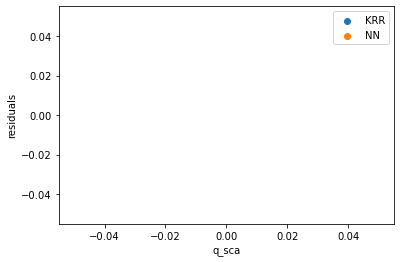

1


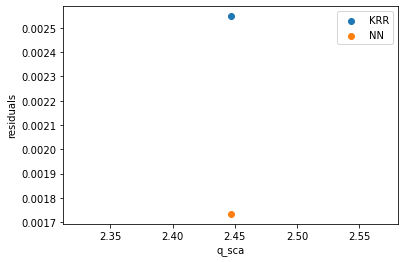

1


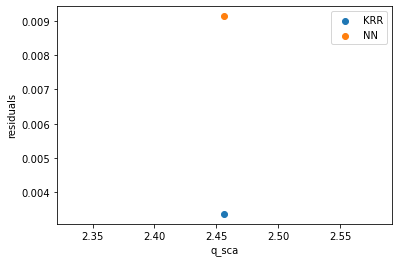

1


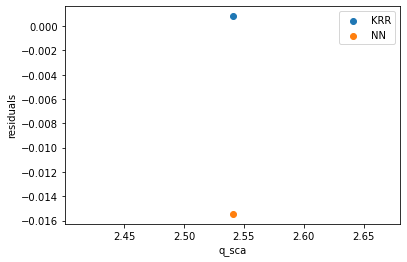

0


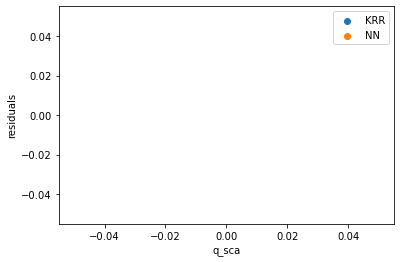

0


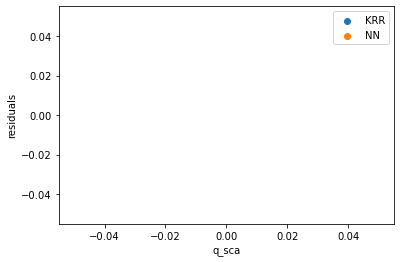

2


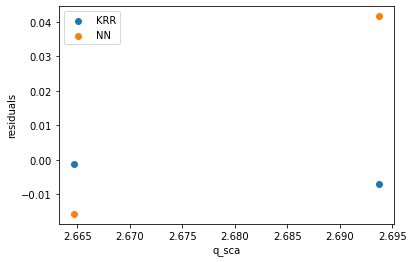

0


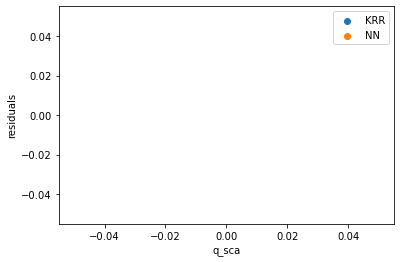

0


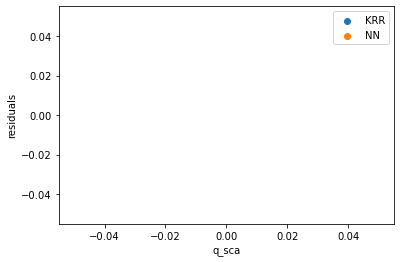

1


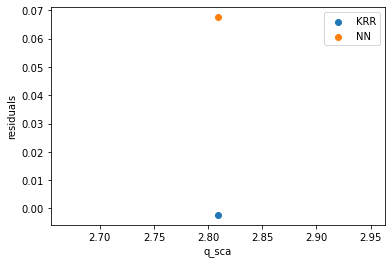

In [49]:
min_val= df_random['q_sca'].min()
max_val= df_random['q_sca'].max()

while min_val<=max_val:
    
    x = df_random[(df_random['q_sca']>=min_val) & (df_random['q_sca']<min_val+0.05)]['q_sca']
    y1 = df_random[(df_random['q_sca']>=min_val) & (df_random['q_sca']<min_val+0.05)]['q_sca_pred_KRR']
    y2 = df_random[(df_random['q_sca']>=min_val) & (df_random['q_sca']<min_val+0.05)]['q_sca_pred_NN']
    
    min_val+=0.05
    print(x.size)
    plt.scatter(x,x-y1, label = 'KRR')
    plt.scatter(x, x-y2, label = 'NN')
    plt.xlabel('q_sca')
    plt.ylabel('residuals')
    plt.legend()
    plt.show()
    

In [103]:
min_val= df_random['g'].min()
max_val= df_random['g'].max()

while min_val<=max_val:
    
    x = df_random[(df_random['g']>=min_val) & (df_random['g']<min_val+0.05)]['g']
    y1 = df_random[(df_random['g']>=min_val) & (df_random['g']<min_val+0.05)]['g_pred_KRR']
    y2 = df_random[(df_random['g']>=min_val) & (df_random['g']<min_val+0.05)]['g_pred_NN']
    
    min_val+=0.05
    print(x.size)
    print("Variance of KRR residuals",(x-y1).var())
    print("Variance of NN residuals",(x-y2).var())
    plt.scatter(x,x-y1, label = 'KRR')
    plt.scatter(x, x-y2, label = 'NN')
    plt.xlabel('g')
    plt.ylabel('residuals')
    plt.legend()
    plt.show()
    

738
Variance of KRR residuals 2.8493082419454236e-06
Variance of NN residuals 4.4361200504792735e-06


FileNotFoundError: missing font metrics file: cmr10

<Figure size 432x288 with 1 Axes>

544
Variance of KRR residuals 3.8971708989754675e-06
Variance of NN residuals 7.833514855219155e-06


FileNotFoundError: missing font metrics file: cmr10

<Figure size 432x288 with 1 Axes>

392
Variance of KRR residuals 3.929674561993673e-06
Variance of NN residuals 9.754111033632848e-06


FileNotFoundError: missing font metrics file: cmr10

<Figure size 432x288 with 1 Axes>

309
Variance of KRR residuals 9.179834024664183e-06
Variance of NN residuals 1.5430998027514015e-05


FileNotFoundError: missing font metrics file: cmr10

<Figure size 432x288 with 1 Axes>

266
Variance of KRR residuals 7.307213994967667e-05
Variance of NN residuals 2.0949129784173946e-05


FileNotFoundError: missing font metrics file: cmr10

<Figure size 432x288 with 1 Axes>

219
Variance of KRR residuals 0.00013747695288634108
Variance of NN residuals 7.469102809081678e-05


FileNotFoundError: missing font metrics file: cmr10

<Figure size 432x288 with 1 Axes>

218
Variance of KRR residuals 5.577029742157546e-05
Variance of NN residuals 4.3114966247748636e-05


FileNotFoundError: missing font metrics file: cmr10

<Figure size 432x288 with 1 Axes>

216
Variance of KRR residuals 0.0002184019781154299
Variance of NN residuals 4.757939899348289e-05


FileNotFoundError: missing font metrics file: cmr10

<Figure size 432x288 with 1 Axes>

224
Variance of KRR residuals 0.0001215877929369755
Variance of NN residuals 4.1300770049367534e-05


FileNotFoundError: missing font metrics file: cmr10

<Figure size 432x288 with 1 Axes>

254
Variance of KRR residuals 0.00022317497296579
Variance of NN residuals 4.977350932558041e-05


FileNotFoundError: missing font metrics file: cmr10

<Figure size 432x288 with 1 Axes>

300
Variance of KRR residuals 0.0002276747776966463
Variance of NN residuals 4.760659329445874e-05


FileNotFoundError: missing font metrics file: cmr10

<Figure size 432x288 with 1 Axes>

339
Variance of KRR residuals 0.00016693106712174413
Variance of NN residuals 0.0001942198263625793


FileNotFoundError: missing font metrics file: cmr10

<Figure size 432x288 with 1 Axes>

380
Variance of KRR residuals 0.00015567855636079914
Variance of NN residuals 6.063390469169339e-05


FileNotFoundError: missing font metrics file: cmr10

<Figure size 432x288 with 1 Axes>

344
Variance of KRR residuals 0.000363185097005157
Variance of NN residuals 3.613637740922734e-05


FileNotFoundError: missing font metrics file: cmr10

<Figure size 432x288 with 1 Axes>

329
Variance of KRR residuals 5.285797821663808e-05
Variance of NN residuals 3.331995323123537e-05


FileNotFoundError: missing font metrics file: cmr10

<Figure size 432x288 with 1 Axes>

244
Variance of KRR residuals 2.5649085660315532e-05
Variance of NN residuals 2.814063479167161e-05


FileNotFoundError: missing font metrics file: cmr10

<Figure size 432x288 with 1 Axes>

152
Variance of KRR residuals 1.731295654218362e-05
Variance of NN residuals 2.4496290085830235e-05


FileNotFoundError: missing font metrics file: cmr10

<Figure size 432x288 with 1 Axes>

81
Variance of KRR residuals 7.353735890091476e-06
Variance of NN residuals 1.5631338101194285e-05


FileNotFoundError: missing font metrics file: cmr10

<Figure size 432x288 with 1 Axes>

9
Variance of KRR residuals 3.084142702764302e-06
Variance of NN residuals 3.9788991174993236e-05


FileNotFoundError: missing font metrics file: cmr10

<Figure size 432x288 with 1 Axes>

In [99]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
text_width = 6.96

In [100]:
def setup_matplotlib(small_size: int = SMALL_SIZE, medium_size: int = MEDIUM_SIZE):
    # Use LaTeX to typeset all text in the figure
    # This obviously needs a working LaTeX installation on the system
    plt.rcParams.update({
        'font.family': 'serif',
        'font.size': small_size,
        'axes.titlesize': medium_size,
        'axes.labelsize': medium_size,
        'xtick.labelsize': medium_size,
        'ytick.labelsize': medium_size,
        'legend.fontsize': medium_size,
        'figure.titlesize': medium_size,
        'text.usetex': True,
        'mathtext.fontset': 'cm',
        'mathtext.rm': 'serif',
        'text.latex.preamble': '\\usepackage{amsmath}\n'
                               '\\usepackage{amssymb}'
})

In [101]:
setup_matplotlib()

In [44]:
def create_subplots(df_extrapol):
    fig, axs = plt.subplots(3, 3, figsize= (1*text_width, 0.9*text_width), sharex= 'col', sharey='row')
    
    x_axis = 'equi_mobility_dia'
    col_MSTM = 'q_abs'
    col_KRR = 'q_abs_pred_KRR'
    col_NN = 'q_abs_pred_NN'
    
    axs[0, 0].set_title('$D_f=2.5, f_{coating}=50\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==50)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==50)][col_NN]
    axs[0, 0].plot(x, y, label= 'MSTM', zorder=3)
    axs[0, 0].plot(x, y_KRR, label='KRR', zorder=2)
    axs[0, 0].plot(x, y_NN, label='NN', zorder=1)
    axs[0, 0].set(ylabel='$Q_{abs}$')
    
    axs[0, 1].set_title('$D_f=2.7, f_{coating}=50\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_NN]
    axs[0, 1].plot(x, y,zorder=3)
    axs[0, 1].plot(x, y_KRR, zorder=2)
    axs[0, 1].plot(x, y_NN, zorder=1)
    axs[0, 1].set(ylabel='$Q_{abs}$')
    
    axs[0, 2].set_title('$D_f=2.9, f_{coating}=50\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==50)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==50)][col_NN]
    axs[0, 2].plot(x, y,zorder=3)
    axs[0, 2].plot(x, y_KRR, zorder=2)
    axs[0, 2].plot(x, y_NN, zorder=1)
    axs[0, 2].set(ylabel='$Q_{abs}$')
    
    x_axis = 'equi_mobility_dia'
    col_MSTM = 'q_sca'
    col_KRR = 'q_sca_pred_KRR'
    col_NN = 'q_sca_pred_NN'
    
    axs[1, 0].set_title('$D_f=2.5, f_{coating}=50\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==50)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==50)][col_NN]
    axs[1, 0].plot(x, y,zorder=3)
    axs[1, 0].plot(x, y_KRR, zorder=2)
    axs[1, 0].plot(x, y_NN, zorder=1)
    axs[1, 0].set(ylabel='$Q_{sca}$')
    
    axs[1, 1].set_title('$D_f=2.7, f_{coating}=50\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_NN]
    axs[1, 1].plot(x, y,zorder=3)
    axs[1, 1].plot(x, y_KRR, zorder=2)
    axs[1, 1].plot(x, y_NN, zorder=1)
    axs[1, 1].set(ylabel='$Q_{sca}$')
    
    axs[1, 2].set_title('$D_f=2.9, f_{coating}=50\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==50)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==50)][col_NN]
    axs[1, 2].plot(x, y,zorder=3)
    axs[1, 2].plot(x, y_KRR, zorder=2)
    axs[1, 2].plot(x, y_NN, zorder=1)
    axs[1, 2].set(ylabel='$Q_{sca}$')
    
    x_axis = 'equi_mobility_dia'
    col_MSTM = 'g'
    col_KRR = 'g_pred_KRR'
    col_NN = 'g_pred_NN'
    
    axs[2, 0].set_title('$D_f=2.5, f_{coating}=50\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==50)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==50)][col_NN]
    axs[2, 0].plot(x, y,zorder=3)
    axs[2, 0].plot(x, y_KRR, zorder=2)
    axs[2, 0].plot(x, y_NN, zorder=1)
    axs[2, 0].set(ylabel='$g$')
    
    axs[2, 1].set_title('$D_f=2.7, f_{coating}=50\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_NN]
    axs[2, 1].plot(x, y,zorder=3)
    axs[2, 1].plot(x, y_KRR, zorder=2)
    axs[2, 1].plot(x, y_NN, zorder=1)
    axs[2, 1].set(ylabel='$g$')
    
    axs[2, 2].set_title('$D_f=2.9, f_{coating}=50\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==50)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==50)][col_NN]
    axs[2, 2].plot(x, y,zorder=3)
    axs[2, 2].plot(x, y_KRR, zorder=2)
    axs[2, 2].plot(x, y_NN, zorder=1)
    axs[2, 2].set(ylabel='$g$')
    
    
    fig.legend(loc='upper center', bbox_to_anchor=(1.05, 1))
    fig.tight_layout()
    
    for ax in axs.flat:
        ax.set(xlabel='$D_m(nm)$')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
        
    fig.savefig(f"lineplots/lineplot_extrapol_660.pdf", format="pdf", bbox_inches="tight")

In [47]:
def create_subplots(df_random,x_axis, y_axis_MSTM, y_axis_KRR, y_axis_NN):
    fig, axs = plt.subplots(3, 3, figsize= (1*text_width, 0.9*text_width), sharex= 'col', sharey= 'row' )
    axs[0, 0].set_title('$D_f=1.5, f_{coating}=0\%$')
    x=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==0)][x_axis]
    y=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==0)][y_axis_MSTM]
    axs[0, 0].plot(x, y, label= 'MSTM', zorder=3)
    x=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==0)][x_axis]
    y=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==0)][y_axis_KRR]
    axs[0, 0].plot(x, y, label='KRR', zorder=2)
    x=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==0)][x_axis]
    y=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==0)][y_axis_NN]
    axs[0, 0].plot(x, y, label='NN', zorder=1)
    axs[0, 0].set(ylabel='$Q_{abs}$')
    
    
    axs[0, 1].set_title('$D_f=2.1, f_{coating}=0\%$')
    x=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==0)][x_axis]
    y=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==0)][y_axis_MSTM]
    axs[0, 1].plot(x, y, zorder=3)
    x=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==0)][x_axis]
    y=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==0)][y_axis_KRR]
    axs[0, 1].plot(x, y, zorder=2)
    x=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==0)][x_axis]
    y=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==0)][y_axis_NN]
    axs[0, 1].plot(x, y, zorder=1)
    axs[0, 1].set(ylabel='$Q_{abs}$')
    
    
    
    axs[0, 2].set_title('$D_f=2.7, f_{coating}=0\%$')
    x=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==0)][x_axis]
    y=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==0)][y_axis_MSTM]
    axs[0, 2].plot(x, y,zorder=3)
    x=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==0)][x_axis]
    y=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==0)][y_axis_KRR]
    axs[0, 2].plot(x, y,zorder=2)
    x=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==0)][x_axis]
    y=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==0)][y_axis_NN]
    axs[0, 2].plot(x, y, zorder=1)
    axs[0, 2].set(ylabel='$Q_{abs}$')

    
    axs[1, 0].set_title('$D_f=1.5, f_{coating}=25\%$')
    x=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==25)][x_axis]
    y=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==25)][y_axis_MSTM]
    axs[1, 0].plot(x, y, zorder=3)
    x=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==25)][x_axis]
    y=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==25)][y_axis_KRR]
    axs[1, 0].plot(x, y, zorder=2)
    x=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==25)][x_axis]
    y=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==25)][y_axis_NN]
    axs[1, 0].plot(x, y,zorder=1)
    axs[1, 0].set(ylabel='$Q_{abs}$')
    
    axs[1, 1].set_title('$D_f=2.1, f_{coating}=25\%$')
    x=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==25)][x_axis]
    y=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==25)][y_axis_MSTM]
    axs[1, 1].plot(x, y, zorder=3)
    x=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==25)][x_axis]
    y=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==25)][y_axis_KRR]
    axs[1, 1].plot(x, y, zorder=2)
    x=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==25)][x_axis]
    y=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==25)][y_axis_NN]
    axs[1, 1].plot(x, y, zorder=1)
    axs[1, 1].set(ylabel='$Q_{abs}$')
    
    axs[1, 2].set_title('$D_f=2.7, f_{coating}=25\%$')
    x=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==25)][x_axis]
    y=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==25)][y_axis_MSTM]
    axs[1, 2].plot(x, y, zorder=3)
    x=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==25)][x_axis]
    y=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==25)][y_axis_KRR]
    axs[1, 2].plot(x, y, zorder=2)
    x=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==25)][x_axis]
    y=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==25)][y_axis_NN]
    axs[1, 2].plot(x, y, zorder=1)
    axs[1, 2].set(ylabel='$Q_{abs}$')
    
    
    axs[2, 0].set_title('$D_f=1.5, f_{coating}=90\%$')
    x=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==90)][x_axis]
    y=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==90)][y_axis_MSTM]
    axs[2, 0].plot(x, y, zorder=3)
    x=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==90)][x_axis]
    y=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==90)][y_axis_KRR]
    axs[2, 0].plot(x, y, zorder=2)
    x=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==90)][x_axis]
    y=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==90)][y_axis_NN]
    axs[2, 0].plot(x, y, zorder=1)
    axs[2, 0].set(ylabel='$Q_{abs}$')
    
    
    axs[2, 1].set_title('$D_f=2.1, f_{coating}=90\%$')
    x=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==90)][x_axis]
    y=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==90)][y_axis_MSTM]
    axs[2, 1].plot(x, y, zorder=3)
    x=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==90)][x_axis]
    y=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==90)][y_axis_KRR]
    axs[2, 1].plot(x, y,zorder=2)
    x=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==90)][x_axis]
    y=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==90)][y_axis_NN]
    axs[2, 1].plot(x, y, zorder=1)
    axs[2, 1].set(ylabel='$Q_{abs}$')
    
    
    
    axs[2, 2].set_title('$D_f=2.7, f_{coating}=90\%$')
    x=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==90)][x_axis]
    y=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==90)][y_axis_MSTM]
    axs[2, 2].plot(x, y, zorder=3)
    x=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==90)][x_axis]
    y=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==90)][y_axis_KRR]
    axs[2, 2].plot(x, y, zorder=2)
    x=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==90)][x_axis]
    y=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==90)][y_axis_NN]
    axs[2, 2].plot(x, y, zorder=1)
    axs[2, 2].set(ylabel='$Q_{abs}$')
    
    fig.legend(loc='upper center', bbox_to_anchor=(1.05, 1))
    fig.tight_layout()
    
    for ax in axs.flat:
        ax.set(xlabel='$D_m(nm)$')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
        
    fig.savefig(f"lineplots/lineplot_random_660_{y_axis_MSTM}.pdf", format="pdf", bbox_inches="tight")

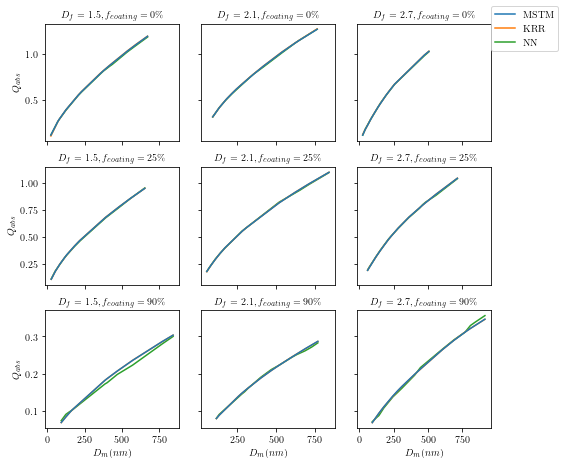

In [48]:
create_subplots(df_random[(df_random['wavelength']==660) & (df_random['equi_mobility_dia']<=1000)], 'equi_mobility_dia','q_abs', 'q_abs_pred_KRR', 'q_abs_pred_NN')

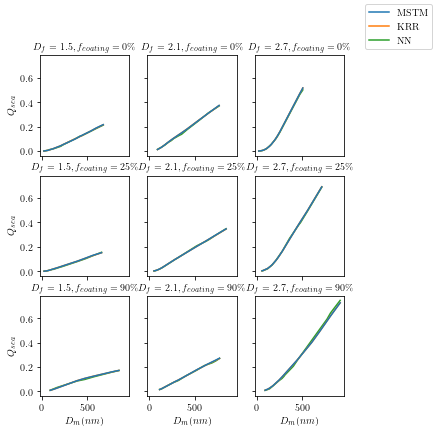

In [74]:
create_subplots(df_random[(df_random['wavelength']==660) & (df_random['equi_mobility_dia']<=1000)], 'equi_mobility_dia','q_sca', 'q_sca_pred_KRR', 'q_sca_pred_NN')

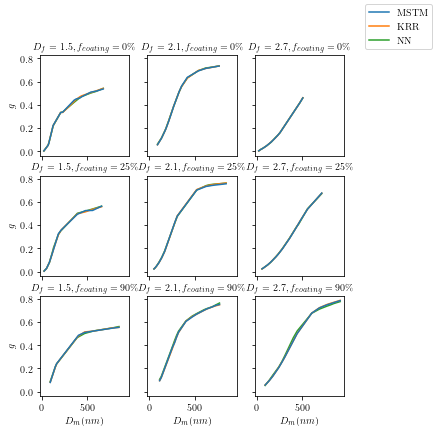

In [75]:
create_subplots(df_random[(df_random['wavelength']==660) & (df_random['equi_mobility_dia']<=1000)], 'equi_mobility_dia','g', 'g_pred_KRR', 'g_pred_NN')

In [19]:
# create_subplots(df_random[df_random['wavelength']==467], 'equi_mobility_dia','q_abs', 'q_abs_pred_KRR', 'q_abs_pred_NN')

In [52]:
# create_subplots(df_random[df_random['wavelength']==467], 'equi_mobility_dia','q_sca', 'q_sca_pred_KRR', 'q_sca_pred_NN')

In [53]:
# create_subplots(df_random[df_random['wavelength']==467], 'equi_mobility_dia','g', 'g_pred_KRR', 'g_pred_NN')

In [54]:
# create_subplots(df_random[df_random['wavelength']==530], 'equi_mobility_dia','q_abs', 'q_abs_pred_KRR', 'q_abs_pred_NN')

In [55]:
# create_subplots(df_random[df_random['wavelength']==530], 'equi_mobility_dia','q_sca', 'q_sca_pred_KRR', 'q_sca_pred_NN')

In [56]:
# create_subplots(df_random[df_random['wavelength']==530], 'equi_mobility_dia','g', 'g_pred_KRR', 'g_pred_NN')

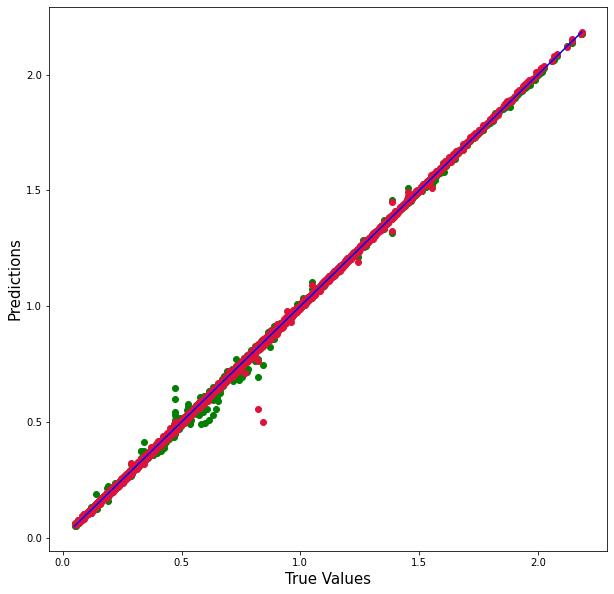

In [32]:
plt.figure(figsize=(10,10))
plt.scatter(df_random['q_abs'], df_random['q_abs_pred_KRR'], c='green')
plt.scatter(df_random['q_abs'], df_random['q_abs_pred_NN'], c='crimson')
plt.yscale('linear')
plt.xscale('linear')

p1 = max(max(df_random['q_abs_pred_KRR']), max(df_random['q_abs_pred_NN']), max(df_random['q_abs']))
p2 = min(min(df_random['q_abs_pred_KRR']), min(df_random['q_abs_pred_NN']),min(df_random['q_abs']))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()


In [29]:
def create_performance_plots(df_random):
    fig, axs = plt.subplots(3, 3, figsize= (1*text_width, 0.9*text_width), sharex= 'col', sharey='col')
    
    col_MSTM = 'q_abs'
    col_KRR = 'q_abs_pred_KRR'
    col_NN = 'q_abs_pred_NN'
    axs[0, 0].set_title('$D_f=1.5, f_{coating}=0\%$')
    x=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==0)][col_MSTM]
    y_KRR=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==0)][col_KRR]
    y_NN=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==0)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[0, 0].scatter(x, y_KRR, c='crimson',marker='+')
    axs[0, 0].scatter(x, y_NN, c='green',marker='+')
    axs[0, 0].plot([p1, p2], [p1, p2], 'b-')
    axs[0, 0].set(ylabel='$\hat{Q}_{abs}$')

    axs[1, 0].set_title('$D_f=2.1, f_{coating}=50\%$')
    x=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==50)][col_KRR]
    y_NN=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==50)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[1, 0].scatter(x, y_KRR, c='crimson',marker='+')
    axs[1, 0].scatter(x, y_NN, c='green',marker='+')
    axs[1, 0].plot([p1, p2], [p1, p2], 'b-')
    axs[1, 0].set(ylabel='$\hat{Q}_{abs}$')
    
    axs[2, 0].set_title('$D_f=2.7, f_{coating}=90\%$')
    x=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==90)][col_MSTM]
    y_KRR=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==90)][col_KRR]
    y_NN=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==90)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[2, 0].scatter(x, y_KRR, c='crimson',marker='+')
    axs[2, 0].scatter(x, y_NN, c='green',marker='+')
    axs[2, 0].plot([p1, p2], [p1, p2], 'b-')
    axs[2, 0].set_xlabel('$Q_{abs}$')
    axs[2, 0].set(ylabel='$\hat{Q}_{abs}$')
    

    col_MSTM = 'q_sca'
    col_KRR = 'q_sca_pred_KRR'
    col_NN = 'q_sca_pred_NN'
    
    axs[0, 1].set_title('$D_f=1.5, f_{coating}=0\%$')
    x=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==0)][col_MSTM]
    y_KRR=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==0)][col_KRR]
    y_NN=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==0)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[0,1].scatter(x, y_KRR, c='crimson',marker='+')
    axs[0,1].scatter(x, y_NN, c='green',marker='+')
    axs[0,1].plot([p1, p2], [p1, p2], 'b-')
    axs[0,1].set(ylabel='$\hat{Q}_{sca}$')
    
    axs[1, 1].set_title('$D_f=2.1, f_{coating}=50\%$')
    x=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==50)][col_KRR]
    y_NN=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==50)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[1, 1].scatter(x, y_KRR, c='crimson',marker='+')
    axs[1, 1].scatter(x, y_NN, c='green',marker='+')
    axs[1, 1].plot([p1, p2], [p1, p2], 'b-')
    axs[1,1].set(ylabel='$\hat{Q}_{sca}$')

    axs[2, 1].set_title('$D_f=2.7, f_{coating}=90\%$')
    x=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==90)][col_MSTM]
    y_KRR=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==90)][col_KRR]
    y_NN=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==90)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[2, 1].scatter(x, y_KRR, c='crimson',marker='+')
    axs[2, 1].scatter(x, y_NN, c='green',marker='+')
    axs[2, 1].plot([p1, p2], [p1, p2], 'b-')
    axs[2,1].set_xlabel('$Q_{sca}$')
    axs[2,1].set(ylabel='$\hat{Q}_{sca}$')
    
    
    col_MSTM = 'g'
    col_KRR = 'g_pred_KRR'
    col_NN = 'g_pred_NN'
    axs[0,2].set_title('$D_f=1.5, f_{coating}=0\%$')
    x=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==0)][col_MSTM]
    y_KRR=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==0)][col_KRR]
    y_NN=df_random[(df_random['fractal_dimension']==1.5) & (df_random['fraction_of_coating']==0)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[0,2].scatter(x, y_KRR, c='crimson', label='KRR',marker='+')
    axs[0,2].scatter(x, y_NN, c='green',label='NN',marker='+')
    axs[0,2].plot([p1, p2], [p1, p2], 'b-')
#     axs[0,2].set_xlabel('True $Q_{abs}$')
    axs[0,2].set(ylabel='$\hat{g}$')
#     axs[0,2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    
    axs[1,2].set_title('$D_f=2.1, f_{coating}=50\%$')
    x=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==50)][col_KRR]
    y_NN=df_random[(df_random['fractal_dimension']==2.1) & (df_random['fraction_of_coating']==50)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[1,2].scatter(x, y_KRR, c='crimson',marker='+')
    axs[1,2].scatter(x, y_NN, c='green',marker='+')
    axs[1,2].plot([p1, p2], [p1, p2], 'b-')
    axs[1,2].set(ylabel='$\hat{g}$')
    
    
    
    
    axs[2, 2].set_title('$D_f=2.7, f_{coating}=90\%$')
    x=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==90)][col_MSTM]
    y_KRR=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==90)][col_KRR]
    y_NN=df_random[(df_random['fractal_dimension']==2.7) & (df_random['fraction_of_coating']==90)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[2, 2].scatter(x, y_KRR, c='crimson',marker='+')
    axs[2, 2].scatter(x, y_NN, c='green',marker='+')
    axs[2, 2].plot([p1, p2], [p1, p2], 'b-')
    axs[2, 2].set_xlabel('$g$')
    axs[2, 2].set(ylabel='$\hat{g}$')

    
    
    fig.legend(loc='upper center', bbox_to_anchor=(1.05, 1))
    fig.tight_layout()
#     for ax in axs.flat:
#             ax.set(ylabel='Estimation')
    # Hide x labels and tick labels for top plots and y ticks for right plots.
#     for ax in axs.flat:
#         ax.label_outer()
        
    fig.savefig(f"performance_plots/performance_plot_random_660.pdf", format="pdf", bbox_inches="tight")

In [30]:
# df_random[df_random['wavelength']==660]

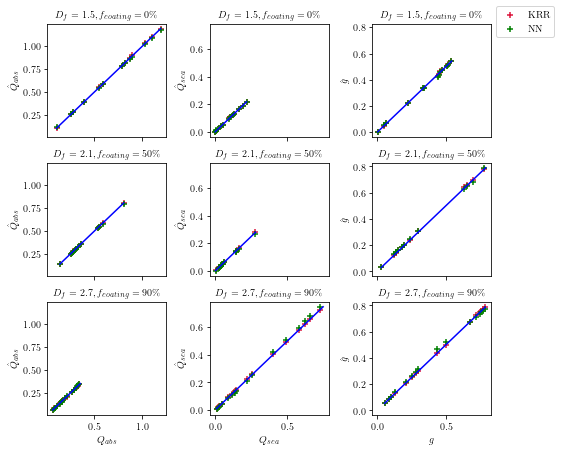

In [31]:
create_performance_plots(df_random[df_random['wavelength']==660])

In [92]:
# def create_boxplot(df, feature_x, feature_y, feature_y_model):
#     data=[]
#     positions=[]
#     for i in df[feature_x].unique().sort_values():
#         mstm_values=df[(df[feature_x]==i)][feature_y]
#         model_values=df[(df[feature_x]==i)][feature_y_model]
#         l=mstm_values-model_values.to_numpy()
#         data.append(l)
#         positions.append(i)
        
#     fig = plt.figure(figsize =(10, 7))
#     #print(data)
#     # Creating axes instance
#     #ax = fig.add_axes([0, 0, 1, 1])

#     # Creating plot
#     plt.boxplot(data, positions=positions, sym="")
#     plt.grid(linestyle="dashed")
    
#     plt.xlabel('fractal_dimensions')
#     plt.ylabel(f'{feature_y} - {feature_y_model}')

#     # show plot
#     plt.show()
    
        
        
        
    

In [21]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

In [18]:
# def create_boxplot(df, feature_x, feature_y, feature_y_KRR, feature_y_NN):
#     data_KRR=[]
#     data_NN=[]
#     ticks=[]
#     for i in np.sort(df[feature_x].unique()):
#         mstm_values=df[(df[feature_x]==i)][feature_y]
#         KRR_values=df[(df[feature_x]==i)][feature_y_KRR]
#         NN_values=df[(df[feature_x]==i)][feature_y_NN]
#         l1=mstm_values-KRR_values.to_numpy()
#         l2=mstm_values-NN_values.to_numpy()
#         data_KRR.append(l1)
#         data_NN.append(l2)
#         ticks.append(i)
        
#     fig = plt.figure(figsize =(10, 7))
#     #print(data)
#     # Creating axes instance
#     #ax = fig.add_axes([0, 0, 1, 1])
# #     data_KRR=np.array(data_KRR)
# #     data_NN=np.array(data_NN)
    
#     # Creating plot
#     bpl=plt.boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
#     bpr=plt.boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
#     plt.grid(linestyle="dashed")
#     set_box_color(bpl, '#D7191C') 
#     set_box_color(bpr, '#2C7BB6')
#     plt.plot([], c='#D7191C', label='KRR')
#     plt.plot([], c='#2C7BB6', label='NN')
#     plt.legend()

#     plt.xlabel(f'{feature_x}')
#     plt.ylabel(f'{feature_y} - {feature_y}_pred')
    
#     plt.xticks(range(0, len(ticks) * 2, 2), ticks)
# #     plt.xlim(-2, len(ticks)*2)
# #     plt.ylim(0, 8)
#     plt.tight_layout()
#     # show plot
#     plt.show()
# #     fig.savefig(f"boxplot_random_error_{feature_x}_{feature_y_model}.pdf", format="pdf", bbox_inches="tight")
    
    
        
        
        
    

In [19]:
# create_boxplot(df_random, 'wavelength', 'q_abs', 'q_abs_pred_KRR', 'q_abs_pred_NN')

In [20]:
# create_boxplot(df_random, 'fractal_dimension', 'q_abs', 'q_abs_pred_NN')

In [21]:
# create_boxplot(df_random, 'fractal_dimension', 'q_sca', 'q_sca_pred_KRR')

In [22]:
# create_boxplot(df_random, 'fractal_dimension', 'q_sca', 'q_sca_pred_NN')

In [23]:
# create_boxplot(df_random, 'fractal_dimension', 'g', 'g_pred_KRR')

In [24]:
# create_boxplot(df_random, 'fractal_dimension', 'g', 'g_pred_NN')

In [25]:
# create_boxplot(df_random, 'fraction_of_coating', 'q_abs', 'q_abs_pred_KRR')

In [47]:
# create_boxplot(df_random, 'fraction_of_coating', 'q_abs', 'q_abs_pred_NN')

In [48]:
# create_boxplot(df_random, 'fraction_of_coating', 'q_sca', 'q_sca_pred_KRR')

In [49]:
# create_boxplot(df_random, 'fraction_of_coating', 'q_sca', 'q_sca_pred_NN')

In [50]:
# create_boxplot(df_random, 'fraction_of_coating', 'g', 'g_pred_KRR')

In [51]:
# create_boxplot(df_random, 'fraction_of_coating', 'g', 'g_pred_NN')

In [52]:
# create_boxplot(df_random, 'wavelength', 'q_abs', 'q_abs_pred_NN')

In [53]:
# create_boxplot(df_random, 'wavelength', 'q_sca', 'q_sca_pred_NN')

In [54]:
# create_boxplot(df_random, 'wavelength', 'g', 'g_pred_NN')

In [55]:
# create_boxplot(df_random, 'wavelength', 'q_abs', 'q_abs_pred_KRR')

In [56]:
# create_boxplot(df_random, 'wavelength', 'q_sca', 'q_sca_pred_KRR')

In [57]:
# create_boxplot(df_random, 'wavelength', 'g', 'g_pred_KRR')

In [58]:
df = pd.read_excel('database_new.xlsx')

# Leave out fractal dimension(2.5,2.7,2.9) (KRR extrapolation)

In [59]:
# #GridSearchCV

# train_set = df[(df['fractal_dimension'] < 2.5)]
# test_set = df[(df['fractal_dimension'] >= 2.5)]
# Y_train = train_set.iloc[:, 25:28]
# X_train = train_set.iloc[:, :8]
# Y_test = test_set.iloc[:, 25:28]
# X_test = test_set.iloc[:, :8]
# pt = PowerTransformer(method='box-cox')

# X_train_transformed = pt.fit_transform(X_train+0.00000000001)



# regressor= KernelRidge()
# model=regressor.fit(X_train_transformed,Y_train)
# grid_search=GridSearchCV(estimator=model,
#                         param_grid=parameters,
#                          cv=2,
#                          scoring='neg_mean_absolute_error',
#                         n_jobs=-1
#                         )
# grid_search= grid_search.fit(X_train_transformed,Y_train)
# print('Best score in CV: ', grid_search.best_score_)
# print('Best parameters in CV: ', grid_search.best_params_)

# parameter_alpha=grid_search.best_params_['alpha']
# parameter_kernel=grid_search.best_params_['kernel']
# parameter_gamma=grid_search.best_params_['gamma']
# print(parameter_alpha)
# print(parameter_gamma)

In [22]:

train_set = df[(df['fractal_dimension'] < 2.5)]
test_set = df[(df['fractal_dimension'] >= 2.5)]
Y_train = train_set.iloc[:, 25:28]
X_train = train_set.iloc[:, :8]
Y_test = test_set.iloc[:, 25:28]
X_test = test_set.iloc[:, :8]

pt = PowerTransformer(method='box-cox')

X_test=X_test.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)

X_train_transformed = pt.fit_transform(X_train+0.00000000001)
X_test_transformed = pt.transform(X_test+0.000000001)




print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))

regressor = KernelRidge(alpha=0.001, gamma=0.01, kernel='rbf')


model = regressor.fit(X_train_transformed,Y_train)


Y_pred = model.predict(X_test_transformed)


Y_pred_KRR = pd.DataFrame(data=Y_pred, columns=["q_abs_pred_KRR", "q_sca_pred_KRR","g_pred_KRR"])
#Y_test.reset_index(inplace=True)
#Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_test, Y_pred_KRR, multioutput='raw_values')
max_error_q_abs, q_abs_max, min_error_q_abs, q_abs_min = min_max_error_efficiency(Y_test['q_abs'], Y_pred_KRR['q_abs_pred_KRR'])
max_error_q_sca, q_sca_max, min_error_q_sca, q_sca_min = min_max_error_efficiency(Y_test['q_sca'], Y_pred_KRR['q_sca_pred_KRR'])
max_error_g, g_max, min_error_g, g_min = min_max_error_efficiency(Y_test['g'], Y_pred_KRR['g_pred_KRR'])

mape  = mean_absolute_percentage_error(Y_test, Y_pred_KRR, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', mean_abs_error)
print(f'Max error is {max_error_q_abs} for  q_abs {q_abs_max} on test set')
print(f'Min error is {min_error_q_abs} for  q_abs {q_abs_min} on test set')

print(f'Max error is {max_error_q_sca} for  q_sca {q_sca_max} on test set')
print(f'Min error is {min_error_q_sca} for  q_sca {q_sca_min} on test set')

print(f'Max error is {max_error_g} for  g {g_max} on test set')
print(f'Min error is {min_error_g} for  g {g_min} on test set')


print('Mean absolute percentage error on test set: ', mape)
# Running and logging model plus Early stopping



                          cols  box_cox_lambdas
0                   wavelength        -1.882303
1            fractal_dimension         0.677943
2          fraction_of_coating         0.252202
3        primary_particle_size        -3.509534
4  number_of_primary_particles         0.108123
5        vol_equi_radius_outer         0.213367
6        vol_equi_radius_inner         0.324368
7            equi_mobility_dia         0.178682
Mean absolute error on test set:  [0.00391732 0.00306736 0.00387666]
Max error is 0.23065256791315947 for  q_abs 1.3881 on test set
Min error is 4.028623763252526e-06 for  q_abs 0.53129 on test set
Max error is 0.5510518517097052 for  q_sca 1.3443 on test set
Min error is 4.078449163356923e-06 for  q_sca 0.0082809 on test set
Max error is 0.42968304833987 for  g 0.0037985 on test set
Min error is 5.334413616098904e-06 for  g 0.012693 on test set
Mean absolute percentage error on test set:  [0.04960108 1.53344234 1.74203132]


In [26]:
#For plotting pupos, predicting for whole data

In [27]:
# df = pd.read_excel('database_new.xlsx')
# train_set = df[(df['fractal_dimension'] < 2.5)]
# test_set = df[(df['fractal_dimension'] >= 2.5)]
# Y_train = train_set.iloc[:, 25:28]
# X_train = train_set.iloc[:, :8]
# Y_test = test_set.iloc[:, 25:28]
# X_test = test_set.iloc[:, :8]

# pt = PowerTransformer(method='box-cox')

# X_test=X_test.reset_index(drop=True)
# Y_test=Y_test.reset_index(drop=True)

# X_train_transformed = pt.fit_transform(X_train+0.00000000001)
# X_test_transformed = pt.transform(X_test+0.000000001)




# print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))

# regressor = KernelRidge(alpha=0.001, gamma=0.01, kernel='rbf')


# model = regressor.fit(X_train_transformed,Y_train)


# Y_pred = model.predict(X_test_transformed)


# Y_pred_KRR = pd.DataFrame(data=Y_pred, columns=["q_abs_pred_KRR", "q_sca_pred_KRR","g_pred_KRR"])
# #Y_test.reset_index(inplace=True)
# #Y_test.drop('index',axis=1, inplace=True)
# error = mean_absolute_error(Y_test, Y_pred_KRR, multioutput='raw_values')

# # error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
# print('Mean absolute error on test set: ', error)
# # Running and logging model plus Early stopping



In [23]:
#Neural network for extrapolation
from keras.models import Sequential
from keras.layers import Dense, Input, LeakyReLU
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger


In [61]:
df = pd.read_excel('database_new.xlsx')
train_set = df[(df['fractal_dimension'] < 2.5)]
test_set = df[(df['fractal_dimension'] >= 2.5)]
Y_train = train_set.iloc[:, 25:28]
X_train = train_set.iloc[:, :8]
Y_test = test_set.iloc[:, 25:28]
X_test = test_set.iloc[:, :8]


pt = PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X_train + 0.00000000001)
X_test_transformed = pt.transform(X_test + 0.00000000001)

print(pd.DataFrame({'cols': X_train.columns, 'box_cox_lambdas': pt.lambdas_}))

#model = build_model()  # params.actuvation
model = Sequential()
model.add(Input(shape=(8,)))
for j in range(0,8):
    model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(3, kernel_initializer='he_normal', activation='linear'))
        # Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

print(model.summary())

        # Running and logging model plus Early stopping



checkpoint = ModelCheckpoint('extrapolate_fwd_fractal_dim/best_model.hdf5', verbose=1, monitor='val_loss', save_best_only=True,mode='auto')
es = EarlyStopping(monitor='val_loss', patience=100, verbose=1)
callback_list = [checkpoint, es]
history = model.fit(X_train_transformed, Y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=callback_list)
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = len(loss)
print(epochs)
    # Use best model to predict
#weights_file = f'fractal_dimension_{_run._id}/best_model.hdf5'  # choose the best checkpoint
model.load_weights('extrapolate_fwd_fractal_dim/best_model.hdf5')  # load it
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

Y_pred = model.predict(X_test_transformed)

Y_pred_NN = pd.DataFrame(data=Y_pred, columns=["q_abs_pred_NN", "q_sca_pred_NN","g_pred_NN"])

error = mean_absolute_error(Y_test, Y_pred_NN, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping


                          cols  box_cox_lambdas
0                   wavelength        -1.882303
1            fractal_dimension         0.677943
2          fraction_of_coating         0.252202
3        primary_particle_size        -3.509534
4  number_of_primary_particles         0.108123
5        vol_equi_radius_outer         0.213367
6        vol_equi_radius_inner         0.324368
7            equi_mobility_dia         0.178682
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4608      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)    

KeyboardInterrupt: 

In [ ]:
#For plotting purpose NN

In [24]:
df = pd.read_excel('database_new.xlsx')
train_set = df[(df['fractal_dimension'] < 2.5)]
test_set = df[(df['fractal_dimension'] >= 2.5)]
Y_train = train_set.iloc[:, 25:28]
X_train = train_set.iloc[:, :8]
Y_test = test_set.iloc[:, 25:28]
X_test = test_set.iloc[:, :8]
X_test=X_test.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)
pt = PowerTransformer(method='box-cox')

X_test=X_test.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)

X_train_transformed = pt.fit_transform(X_train+0.00000000001)
X_test_transformed = pt.transform(X_test+0.000000001)


print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))


model = load_model('extrapolate_fwd_fractal_dim/best_model.hdf5')
Y_pred_NN = model.predict(X_test_transformed)

Y_test = pd.DataFrame(data=Y_test, columns=["q_abs", "q_sca","g"])

Y_pred_NN = pd.DataFrame(data=Y_pred_NN, columns=["q_abs_pred_NN", "q_sca_pred_NN","g_pred_NN"])
#Y_test.reset_index(inplace=True)
#Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_test, Y_pred_NN, multioutput='raw_values')
max_error_q_abs, q_abs_max, min_error_q_abs, q_abs_min = min_max_error_efficiency(Y_test['q_abs'], Y_pred_NN['q_abs_pred_NN'])
max_error_q_sca, q_sca_max, min_error_q_sca, q_sca_min = min_max_error_efficiency(Y_test['q_sca'], Y_pred_NN['q_sca_pred_NN'])
max_error_g, g_max, min_error_g, g_min = min_max_error_efficiency(Y_test['g'], Y_pred_NN['g_pred_NN'])

mape  = mean_absolute_percentage_error(Y_test, Y_pred_KRR, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', mean_abs_error)
print(f'Max error is {max_error_q_abs} for  q_abs {q_abs_max} on test set')
print(f'Min error is {min_error_q_abs} for  q_abs {q_abs_min} on test set')

print(f'Max error is {max_error_q_sca} for  q_sca {q_sca_max} on test set')
print(f'Min error is {min_error_q_sca} for  q_sca {q_sca_min} on test set')

print(f'Max error is {max_error_g} for  g {g_max} on test set')
print(f'Min error is {min_error_g} for  g {g_min} on test set')


print('Mean absolute percentage error on test set: ', mape)

                          cols  box_cox_lambdas
0                   wavelength        -1.882303
1            fractal_dimension         0.677943
2          fraction_of_coating         0.252202
3        primary_particle_size        -3.509534
4  number_of_primary_particles         0.108123
5        vol_equi_radius_outer         0.213367
6        vol_equi_radius_inner         0.324368
7            equi_mobility_dia         0.178682
215/215 [==============================] - 0s 2ms/step
Mean absolute error on test set:  [0.00391732 0.00306736 0.00387666]
Max error is 0.21261914806365967 for  q_abs 1.1633 on test set
Min error is 3.0797195434417723e-06 for  q_abs 0.49782 on test set
Max error is 1.4283306833267213 for  q_sca 2.9546 on test set
Min error is 9.984435576200533e-06 for  q_sca 0.0018553 on test set
Max error is 0.3270787745857239 for  g 0.47236 on test set
Min error is 2.204085826872093e-06 for  g 0.037961 on test set
Mean absolute percentage error on test set:  [0.04960108 1.533

In [25]:
df_extrapol=pd.concat([X_test, Y_test, Y_pred_KRR, Y_pred_NN], axis =1)
df_extrapol= df_extrapol.sort_values(by=['equi_mobility_dia'])
df_extrapol=df_extrapol.reset_index(drop=True)
df_extrapol

,wavelength,fractal_dimension,fraction_of_coating,primary_particle_size,number_of_primary_particles,vol_equi_radius_outer,vol_equi_radius_inner,equi_mobility_dia,q_abs,q_sca,g,q_abs_pred_KRR,q_sca_pred_KRR,g_pred_KRR,q_abs_pred_NN,q_sca_pred_NN,g_pred_NN
0,660,2.5,1,15.1,0.5,11.984878,11.905508,16.845238,0.11691,0.000389,0.003798,0.103797,0.025345,0.240674,0.119800,0.002819,0.020661
1,467,2.9,1,15.1,0.5,11.984878,11.905508,16.845238,0.19030,0.001535,0.007075,0.130241,0.017822,0.222920,0.225061,-0.005261,-0.040958
2,660,2.7,1,15.1,0.5,11.984878,11.905508,16.845238,0.11691,0.000389,0.003798,0.089736,0.039061,0.335157,0.115370,0.006727,0.005449
3,530,2.5,1,15.1,0.5,11.984878,11.905508,16.845238,0.15654,0.000930,0.005690,0.126357,0.009370,0.160487,0.152747,-0.002751,0.018062
4,530,2.7,1,15.1,0.5,11.984878,11.905508,16.845238,0.15654,0.000930,0.005690,0.112754,0.018301,0.233103,0.148434,-0.008249,0.002189
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6848,467,2.7,90,29.0,1000.0,290.000000,150.000000,1561.074003,1.36780,2.809100,0.925200,1.336719,2.442153,1.077580,1.217886,1.483575,1.074855
6849,530,2.7,90,29.0,1000.0,290.000000,150.000000,1561.074003,0.84669,1.919600,0.915940,0.824385,1.744891,1.073315,0.888178,1.265656,1.022180
6850,530,2.9,90,29.0,1000.0,290.000000,150.000000,1561.074003,0.88869,2.334300,0.882360,0.798027,2.095722,1.195202,0.913053,1.332162,1.078496
6851,660,2.9,90,29.0,1000.0,290.000000,150.000000,1561.074003,0.52617,1.826900,0.842540,0.425757,1.420386,1.137801,0.606134,0.996881,0.996508


In [32]:
# def create_performance_plots(df_extrapol):
#     fig, axs = plt.subplots(3, 3, figsize= (0.9*text_width, 0.9*text_width), sharex= True, sharey=True)
    
#     col_MSTM = 'q_abs'
#     col_KRR = 'q_abs_pred_KRR'
#     col_NN = 'q_abs_pred_NN'
#     axs[0, 0].set_title('$D_f=2.5, f_{coating}=0$%')
#     x=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==0)][col_MSTM]
#     y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==0)][col_KRR]
#     y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==0)][col_NN]
#     p1 = max(max(y_KRR), max(y_NN), max(x))
#     p2 = min(min(y_KRR), min(y_NN),min(x))
#     axs[0, 0].scatter(x, y_KRR, c='crimson')
#     axs[0, 0].scatter(x, y_NN, c='green')
#     axs[0, 0].plot([p1, p2], [p1, p2], 'b-')

#     axs[1, 0].set_title('$D_f=2.7, f_{coating}=50$%')
#     x=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_MSTM]
#     y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_KRR]
#     y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_NN]
#     p1 = max(max(y_KRR), max(y_NN), max(x))
#     p2 = min(min(y_KRR), min(y_NN),min(x))
#     axs[1, 0].scatter(x, y_KRR, c='crimson')
#     axs[1, 0].scatter(x, y_NN, c='green')
#     axs[1, 0].plot([p1, p2], [p1, p2], 'b-')
    
#     axs[2, 0].set_title('$D_f=2.9, f_{coating}=90$%')
#     x=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==90)][col_MSTM]
#     y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==90)][col_KRR]
#     y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==90)][col_NN]
#     p1 = max(max(y_KRR), max(y_NN), max(x))
#     p2 = min(min(y_KRR), min(y_NN),min(x))
#     axs[2, 0].scatter(x, y_KRR, c='crimson')
#     axs[2, 0].scatter(x, y_NN, c='green')
#     axs[2, 0].plot([p1, p2], [p1, p2], 'b-')
#     axs[2, 0].set_xlabel('True $Q_{abs}$')
    

#     col_MSTM = 'q_sca'
#     col_KRR = 'q_sca_pred_KRR'
#     col_NN = 'q_sca_pred_NN'
    
#     axs[0, 1].set_title('$D_f=2.5, f_{coating}=0$%')
#     x=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==0)][col_MSTM]
#     y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==0)][col_KRR]
#     y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==0)][col_NN]
#     p1 = max(max(y_KRR), max(y_NN), max(x))
#     p2 = min(min(y_KRR), min(y_NN),min(x))
#     axs[0,1].scatter(x, y_KRR, c='crimson')
#     axs[0,1].scatter(x, y_NN, c='green')
#     axs[0,1].plot([p1, p2], [p1, p2], 'b-')
    
#     axs[1, 1].set_title('$D_f=2.7, f_{coating}=50$%')
#     x=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_MSTM]
#     y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_KRR]
#     y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_NN]
#     p1 = max(max(y_KRR), max(y_NN), max(x))
#     p2 = min(min(y_KRR), min(y_NN),min(x))
#     axs[1, 1].scatter(x, y_KRR, c='crimson')
#     axs[1, 1].scatter(x, y_NN, c='green')
#     axs[1, 1].plot([p1, p2], [p1, p2], 'b-')

#     axs[2, 1].set_title('$D_f=2.9, f_{coating}=90$%')
#     x=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==90)][col_MSTM]
#     y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==90)][col_KRR]
#     y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==90)][col_NN]
#     p1 = max(max(y_KRR), max(y_NN), max(x))
#     p2 = min(min(y_KRR), min(y_NN),min(x))
#     axs[2, 1].scatter(x, y_KRR, c='crimson', label='KRR')
#     axs[2, 1].scatter(x, y_NN, c='green', label='NN')
#     axs[2, 1].plot([p1, p2], [p1, p2], 'b-')
#     axs[2,1].set_xlabel('True $Q_{sca}$')
    
    
#     col_MSTM = 'g'
#     col_KRR = 'g_pred_KRR'
#     col_NN = 'g_pred_NN'
#     axs[0,2].set_title('$D_f=2.5, f_{coating}=0$%')
#     x=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==0)][col_MSTM]
#     y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==0)][col_KRR]
#     y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==0)][col_NN]
#     p1 = max(max(y_KRR), max(y_NN), max(x))
#     p2 = min(min(y_KRR), min(y_NN),min(x))
#     axs[0,2].scatter(x, y_KRR, c='crimson')
#     axs[0,2].scatter(x, y_NN, c='green')
#     axs[0,2].plot([p1, p2], [p1, p2], 'b-')
#     axs[0,2].set_xlabel('True $Q_{abs}$')
#     axs[0,2].set_ylabel('Estimated $Q_{abs}$')
    
    
#     axs[1,2].set_title('$D_f=2.7, f_{coating}=50$%')
#     x=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_MSTM]
#     y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_KRR]
#     y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_NN]
#     p1 = max(max(y_KRR), max(y_NN), max(x))
#     p2 = min(min(y_KRR), min(y_NN),min(x))
#     axs[1,2].scatter(x, y_KRR, c='crimson')
#     axs[1,2].scatter(x, y_NN, c='green')
#     axs[1,2].plot([p1, p2], [p1, p2], 'b-')
    
    
    
    
#     axs[2, 2].set_title('$D_f=2.9, f_{coating}=90$%')
#     x=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==90)][col_MSTM]
#     y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==90)][col_KRR]
#     y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==90)][col_NN]
#     p1 = max(max(y_KRR), max(y_NN), max(x))
#     p2 = min(min(y_KRR), min(y_NN),min(x))
#     axs[2, 2].scatter(x, y_KRR, c='crimson')
#     axs[2, 2].scatter(x, y_NN, c='green')
#     axs[2, 2].plot([p1, p2], [p1, p2], 'b-')
#     axs[2, 2].set_xlabel('True $g$')

    
    
#     fig.legend()
#     for ax in axs.flat:
#             ax.set(ylabel='Estimation')
#     # Hide x labels and tick labels for top plots and y ticks for right plots.
#     for ax in axs.flat:
#         ax.label_outer()
        
#     fig.savefig(f"performance_plots/performance_plot_extrapol_660.pdf", format="pdf", bbox_inches="tight")

In [36]:
def create_performance_plots(df_extrapol):
    fig, axs = plt.subplots(3, 3, figsize= (1*text_width, 0.9*text_width), sharex= 'col', sharey='col')
    
    col_MSTM = 'q_abs'
    col_KRR = 'q_abs_pred_KRR'
    col_NN = 'q_abs_pred_NN'
    axs[0, 0].set_title('$D_f=2.5, f_{coating}=0\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==0)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==0)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==0)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[0, 0].scatter(x, y_KRR, c='crimson',marker='+')
    axs[0, 0].scatter(x, y_NN, c='green',marker='+')
    axs[0, 0].plot([p1, p2], [p1, p2], 'b-')
    axs[0, 0].set(ylabel='$\hat{Q}_{abs}$')

    axs[1, 0].set_title('$D_f=2.7, f_{coating}=50\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[1, 0].scatter(x, y_KRR, c='crimson',marker='+')
    axs[1, 0].scatter(x, y_NN, c='green',marker='+')
    axs[1, 0].plot([p1, p2], [p1, p2], 'b-')
    axs[1, 0].set(ylabel='$\hat{Q}_{abs}$')
    
    axs[2, 0].set_title('$D_f=2.9, f_{coating}=90\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==90)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==90)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==90)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[2, 0].scatter(x, y_KRR, c='crimson',marker='+')
    axs[2, 0].scatter(x, y_NN, c='green',marker='+')
    axs[2, 0].plot([p1, p2], [p1, p2], 'b-')
    axs[2, 0].set_xlabel('$Q_{abs}$')
    axs[2, 0].set(ylabel='$\hat{Q}_{abs}$')
    

    col_MSTM = 'q_sca'
    col_KRR = 'q_sca_pred_KRR'
    col_NN = 'q_sca_pred_NN'
    
    axs[0, 1].set_title('$D_f=2.5, f_{coating}=0\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==0)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==0)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==0)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[0,1].scatter(x, y_KRR, c='crimson',marker='+')
    axs[0,1].scatter(x, y_NN, c='green',marker='+')
    axs[0,1].plot([p1, p2], [p1, p2], 'b-')
    axs[0,1].set(ylabel='$\hat{Q}_{sca}$')
    
    axs[1, 1].set_title('$D_f=2.7, f_{coating}=50\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[1, 1].scatter(x, y_KRR, c='crimson',marker='+')
    axs[1, 1].scatter(x, y_NN, c='green',marker='+')
    axs[1, 1].plot([p1, p2], [p1, p2], 'b-')
    axs[1,1].set(ylabel='$\hat{Q}_{sca}$')

    axs[2, 1].set_title('$D_f=2.9, f_{coating}=90\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==90)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==90)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==90)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[2, 1].scatter(x, y_KRR, c='crimson',marker='+')
    axs[2, 1].scatter(x, y_NN, c='green',marker='+')
    axs[2, 1].plot([p1, p2], [p1, p2], 'b-')
    axs[2,1].set_xlabel('$Q_{sca}$')
    axs[2,1].set(ylabel='$\hat{Q}_{sca}$')
    
    col_MSTM = 'g'
    col_KRR = 'g_pred_KRR'
    col_NN = 'g_pred_NN'
    axs[0,2].set_title('$D_f=2.5, f_{coating}=0\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==0)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==0)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==0)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[0,2].scatter(x, y_KRR, c='crimson', label='KRR',marker='+')
    axs[0,2].scatter(x, y_NN, c='green', label='NN',marker='+')
    axs[0,2].plot([p1, p2], [p1, p2], 'b-')
    axs[0,2].set(ylabel='$\hat{g}$')
    
    
    axs[1,2].set_title('$D_f=2.7, f_{coating}=50\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[1,2].scatter(x, y_KRR, c='crimson',marker='+')
    axs[1,2].scatter(x, y_NN, c='green',marker='+')
    axs[1,2].plot([p1, p2], [p1, p2], 'b-')
    axs[1,2].set(ylabel='$\hat{g}$')
    
    
    
    
    axs[2, 2].set_title('$D_f=2.9, f_{coating}=90\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==90)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==90)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==90)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[2, 2].scatter(x, y_KRR, c='crimson',marker='+')
    axs[2, 2].scatter(x, y_NN, c='green',marker='+')
    axs[2, 2].plot([p1, p2], [p1, p2], 'b-')
    axs[2, 2].set_xlabel('$g$')
    axs[2, 2].set(ylabel='$\hat{g}$')

    
    
    fig.legend(loc='upper center', bbox_to_anchor=(1.05, 1))
    fig.tight_layout()
        
    fig.savefig(f"performance_plots/performance_plot_extrapol_660.pdf", format="pdf", bbox_inches="tight")

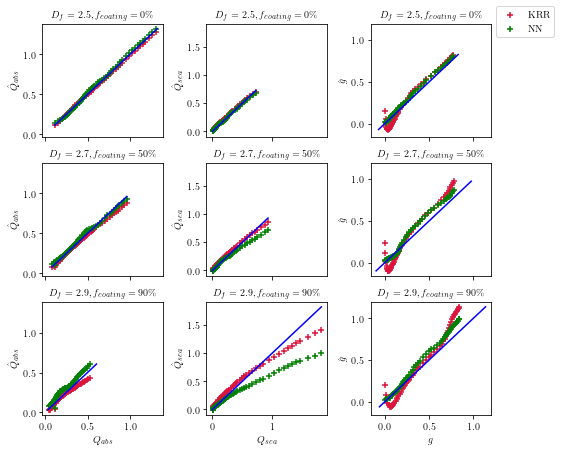

In [37]:
create_performance_plots(df_extrapol[df_extrapol['wavelength']==660])

In [95]:
# plt.figure(figsize=(10,10))
# plt.scatter(df_extrapol['q_abs'], df_extrapol['q_abs_pred_KRR'], c='crimson')
# plt.yscale('linear')
# plt.xscale('linear')

# p1 = max(max(df_extrapol['q_abs_pred_KRR']), max(df_extrapol['q_abs']))
# p2 = min(min(df_extrapol['q_abs_pred_KRR']), min(df_extrapol['q_abs']))
# plt.plot([p1, p2], [p1, p2], 'b-')
# plt.xlabel('True Values', fontsize=15)
# plt.ylabel('Predictions', fontsize=15)
# plt.axis('equal')
# plt.show()


In [96]:
# plt.figure(figsize=(10,10))
# plt.scatter(df_extrapol['q_abs'], df_extrapol['q_abs_pred_NN'], c='crimson')
# plt.yscale('log')
# plt.xscale('log')

# p1 = max(max(df_extrapol['q_abs_pred_NN']), max(df_extrapol['q_abs']))
# p2 = min(min(df_extrapol['q_abs_pred_NN']), min(df_extrapol['q_abs']))
# plt.plot([p1, p2], [p1, p2], 'b-')
# plt.xlabel('True Values', fontsize=15)
# plt.ylabel('Predictions', fontsize=15)
# plt.axis('equal')
# plt.show()

In [81]:
def create_subplots(df_extrapol,x_axis, y_axis_MSTM, y_axis_KRR, y_axis_NN):
    fig, axs = plt.subplots(3, 3, figsize= (0.9*text_width, 0.9*text_width), sharex= True, sharey= True )
    axs[0, 0].set_title('$D_f=2.5, f_{coating}=0\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==0)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==0)][y_axis_MSTM]
    axs[0, 0].plot(x, y, label= 'MSTM', zorder=3)
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==0)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==0)][y_axis_KRR]
    axs[0, 0].plot(x, y, label='KRR', zorder=2)
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==0)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==0)][y_axis_NN]
    axs[0, 0].plot(x, y, label='NN', zorder=1)
    
    
    axs[0, 1].set_title('$D_f=2.7, f_{coating}=0\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==0)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==0)][y_axis_MSTM]
    axs[0, 1].plot(x, y, zorder=3)
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==0)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==0)][y_axis_KRR]
    axs[0, 1].plot(x, y, zorder=2)
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==0)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==0)][y_axis_NN]
    axs[0, 1].plot(x, y, zorder=1)
    
    
    
    axs[0, 2].set_title('$D_f=2.9, f_{coating}=0\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==0)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==0)][y_axis_MSTM]
    axs[0, 2].plot(x, y,zorder=3)
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==0)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==0)][y_axis_KRR]
    axs[0, 2].plot(x, y,zorder=2)
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==0)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==0)][y_axis_NN]
    axs[0, 2].plot(x, y, zorder=1)
#     # Create the legend
#     fig.legend([l1, l2, l3],     # The line objects
#            labels=line_labels,   # The labels for each line
#            loc="center right",   # Position of legend
#            borderaxespad=0.1,    # Small spacing around legend box
#            title="Legend Title"  # Title for the legend
#            )

# Adjust the scaling factor to fit your legend text completely outside the plot
# (smaller value results in more space being made for the legend)
    plt.subplots_adjust(right=0.8)

    
    axs[1, 0].set_title('$D_f=2.5, f_{coating}=25\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==25)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==25)][y_axis_MSTM]
    axs[1, 0].plot(x, y, zorder=3)
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==25)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==25)][y_axis_KRR]
    axs[1, 0].plot(x, y, zorder=2)
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==25)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==25)][y_axis_NN]
    axs[1, 0].plot(x, y,zorder=1)
    
    axs[1, 1].set_title('$D_f=2.7, f_{coating}=25\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==25)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==25)][y_axis_MSTM]
    axs[1, 1].plot(x, y, zorder=3)
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==25)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==25)][y_axis_KRR]
    axs[1, 1].plot(x, y, zorder=2)
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==25)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==25)][y_axis_NN]
    axs[1, 1].plot(x, y, zorder=1)
    
    axs[1, 2].set_title('$D_f=2.9, f_{coating}=25\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==25)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==25)][y_axis_MSTM]
    axs[1, 2].plot(x, y, zorder=3)
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==25)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==25)][y_axis_KRR]
    axs[1, 2].plot(x, y, zorder=2)
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==25)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==25)][y_axis_NN]
    axs[1, 2].plot(x, y, zorder=1)
    
    
    axs[2, 0].set_title('$D_f=2.5, f_{coating}=90\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==90)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==90)][y_axis_MSTM]
    axs[2, 0].plot(x, y, zorder=3)
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==90)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==90)][y_axis_KRR]
    axs[2, 0].plot(x, y, zorder=2)
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==90)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==90)][y_axis_NN]
    axs[2, 0].plot(x, y, zorder=1)
    
    
    axs[2, 1].set_title('$D_f=2.7, f_{coating}=90\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==90)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==90)][y_axis_MSTM]
    axs[2, 1].plot(x, y, zorder=3)
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==90)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==90)][y_axis_KRR]
    axs[2, 1].plot(x, y,zorder=2)
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==90)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==90)][y_axis_NN]
    axs[2, 1].plot(x, y, zorder=1)
    
    
    
    axs[2, 2].set_title('$D_f=2.9, f_{coating}=90\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==90)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==90)][y_axis_MSTM]
    axs[2, 2].plot(x, y, zorder=3)
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==90)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==90)][y_axis_KRR]
    axs[2, 2].plot(x, y, zorder=2)
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==90)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==90)][y_axis_NN]
    axs[2, 2].plot(x, y, zorder=1)
    
    fig.legend()
    
    
    if y_axis_MSTM=='q_abs':
        for ax in axs.flat:
            ax.set(xlabel='$D_m(nm)$', ylabel='$Q_{abs}$')
    elif y_axis_MSTM=='q_sca':
        for ax in axs.flat:
            ax.set(xlabel='$D_m(nm)$', ylabel='$Q_{sca}$')
    elif y_axis_MSTM=='g':
        for ax in axs.flat:
            ax.set(xlabel='$D_m(nm)$', ylabel='$g$')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
        
    fig.savefig(f"lineplots/lineplot_extrapol_660_{y_axis_MSTM}.pdf", format="pdf", bbox_inches="tight")

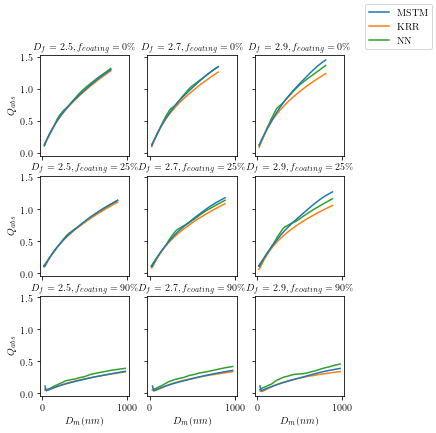

In [82]:
create_subplots(df_extrapol[(df_extrapol['wavelength']==660) & (df_extrapol['equi_mobility_dia']<=1000)], 'equi_mobility_dia','q_abs', 'q_abs_pred_KRR', 'q_abs_pred_NN')

In [66]:
# create_subplots(df_extrapol[df_extrapol['wavelength']==660], 'number_of_primary_particles','q_abs', 'q_abs_pred_KRR', 'q_abs_pred_NN')

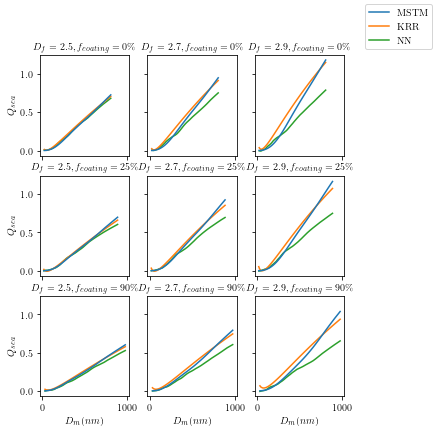

In [83]:
create_subplots(df_extrapol[(df_extrapol['wavelength']==660) & (df_extrapol['equi_mobility_dia']<=1000)], 'equi_mobility_dia','q_sca', 'q_sca_pred_KRR', 'q_sca_pred_NN')

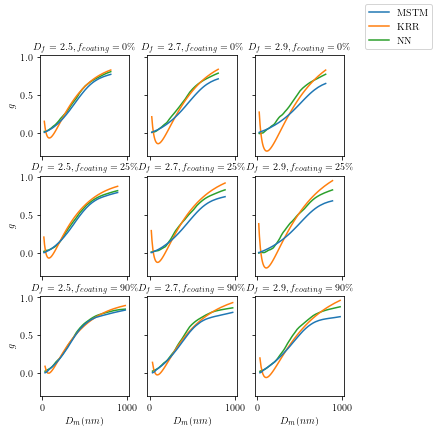

In [84]:
create_subplots(df_extrapol[(df_extrapol['wavelength']==660) & (df_extrapol['equi_mobility_dia']<=1000)], 'equi_mobility_dia','g', 'g_pred_KRR', 'g_pred_NN')

In [78]:
def create_subplots(df_extrapol):
    fig, axs = plt.subplots(3, 3, figsize= (1*text_width, 0.9*text_width), sharex= 'col', sharey='row')
    
    x_axis = 'equi_mobility_dia'
    col_MSTM = 'q_abs'
    col_KRR = 'q_abs_pred_KRR'
    col_NN = 'q_abs_pred_NN'
    
    axs[0, 0].set_title('$D_f=2.5, f_{coating}=50\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==50)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==50)][col_NN]
    axs[0, 0].plot(x, y, label= 'MSTM', zorder=3)
    axs[0, 0].plot(x, y_KRR, label='KRR', zorder=2)
    axs[0, 0].plot(x, y_NN, label='NN', zorder=1)
    axs[0, 0].set(ylabel='$Q_{abs}$')
    
    axs[0, 1].set_title('$D_f=2.7, f_{coating}=50\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_NN]
    axs[0, 1].plot(x, y,zorder=3)
    axs[0, 1].plot(x, y_KRR, zorder=2)
    axs[0, 1].plot(x, y_NN, zorder=1)
    axs[0, 1].set(ylabel='$Q_{abs}$')
    
    axs[0, 2].set_title('$D_f=2.9, f_{coating}=50\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==50)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==50)][col_NN]
    axs[0, 2].plot(x, y,zorder=3)
    axs[0, 2].plot(x, y_KRR, zorder=2)
    axs[0, 2].plot(x, y_NN, zorder=1)
    axs[0, 2].set(ylabel='$Q_{abs}$')
    
    x_axis = 'equi_mobility_dia'
    col_MSTM = 'q_sca'
    col_KRR = 'q_sca_pred_KRR'
    col_NN = 'q_sca_pred_NN'
    
    axs[1, 0].set_title('$D_f=2.5, f_{coating}=50\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==50)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==50)][col_NN]
    axs[1, 0].plot(x, y,zorder=3)
    axs[1, 0].plot(x, y_KRR, zorder=2)
    axs[1, 0].plot(x, y_NN, zorder=1)
    axs[1, 0].set(ylabel='$Q_{sca}$')
    
    axs[1, 1].set_title('$D_f=2.7, f_{coating}=50\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_NN]
    axs[1, 1].plot(x, y,zorder=3)
    axs[1, 1].plot(x, y_KRR, zorder=2)
    axs[1, 1].plot(x, y_NN, zorder=1)
    axs[1, 1].set(ylabel='$Q_{sca}$')
    
    axs[1, 2].set_title('$D_f=2.9, f_{coating}=50\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==50)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==50)][col_NN]
    axs[1, 2].plot(x, y,zorder=3)
    axs[1, 2].plot(x, y_KRR, zorder=2)
    axs[1, 2].plot(x, y_NN, zorder=1)
    axs[1, 2].set(ylabel='$Q_{sca}$')
    
    x_axis = 'equi_mobility_dia'
    col_MSTM = 'g'
    col_KRR = 'g_pred_KRR'
    col_NN = 'g_pred_NN'
    
    axs[2, 0].set_title('$D_f=2.5, f_{coating}=50\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==50)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.5) & (df_extrapol['fraction_of_coating']==50)][col_NN]
    axs[2, 0].plot(x, y,zorder=3)
    axs[2, 0].plot(x, y_KRR, zorder=2)
    axs[2, 0].plot(x, y_NN, zorder=1)
    axs[2, 0].set(ylabel='$g$')
    
    axs[2, 1].set_title('$D_f=2.7, f_{coating}=50\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.7) & (df_extrapol['fraction_of_coating']==50)][col_NN]
    axs[2, 1].plot(x, y,zorder=3)
    axs[2, 1].plot(x, y_KRR, zorder=2)
    axs[2, 1].plot(x, y_NN, zorder=1)
    axs[2, 1].set(ylabel='$g$')
    
    axs[2, 2].set_title('$D_f=2.9, f_{coating}=50\%$')
    x=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==50)][x_axis]
    y=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_extrapol[(df_extrapol['fractal_dimension']==2.9) & (df_extrapol['fraction_of_coating']==50)][col_NN]
    axs[2, 2].plot(x, y,zorder=3)
    axs[2, 2].plot(x, y_KRR, zorder=2)
    axs[2, 2].plot(x, y_NN, zorder=1)
    axs[2, 2].set(ylabel='$g$')
    
    
    fig.legend(loc='upper center', bbox_to_anchor=(1.05, 1))
    fig.tight_layout()
    
    for ax in axs.flat:
        ax.set(xlabel='$D_m(nm)$')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
        
    fig.savefig(f"lineplots/lineplot_extrapol_660.pdf", format="pdf", bbox_inches="tight")

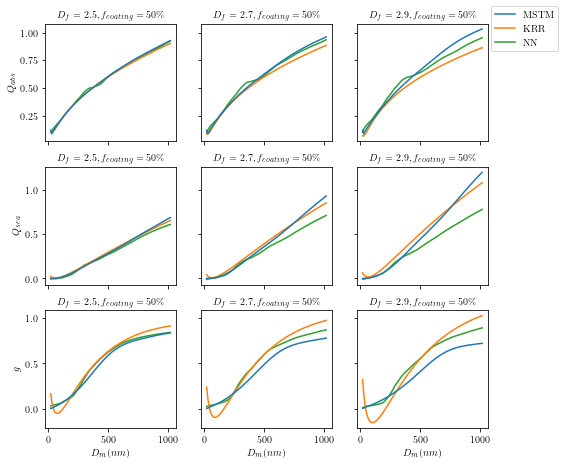

In [79]:
create_subplots(df_extrapol[df_extrapol['wavelength']==660])

In [45]:
# create_subplots(df_extrapol[df_extrapol['wavelength']==467], 'equi_mobility_dia','q_sca', 'q_sca_pred_KRR', 'q_sca_pred_NN')

In [46]:
# create_subplots(df_extrapol[df_extrapol['wavelength']==467], 'equi_mobility_dia','g', 'g_pred_KRR', 'g_pred_NN')

In [47]:
# create_subplots(df_extrapol[df_extrapol['wavelength']==530], 'equi_mobility_dia','q_abs', 'q_abs_pred_KRR', 'q_abs_pred_NN')

In [48]:
# create_subplots(df_extrapol[df_extrapol['wavelength']==530], 'equi_mobility_dia','q_sca', 'q_sca_pred_KRR', 'q_sca_pred_NN')

In [49]:
# create_subplots(df_extrapol[df_extrapol['wavelength']==530], 'equi_mobility_dia','g', 'g_pred_KRR', 'g_pred_NN')

In [83]:
# def create_boxplot(df, feature_x, feature_y, feature_y_model):
#     data=[]
#     positions=[]
#     for i in np.sort(df[feature_x].unique()):
#         mstm_values=df[(df[feature_x]==i)][feature_y]
#         model_values=df[(df[feature_x]==i)][feature_y_model]
#         l=mstm_values-model_values.to_numpy()
#         data.append(l)
#         positions.append(i)
        
#     fig = plt.figure(figsize =(10, 7))
#     #print(data)
#     # Creating axes instance
#     #ax = fig.add_axes([0, 0, 1, 1])

#     # Creating plot
#     plt.boxplot(data, labels=positions, sym="")
#     plt.grid(linestyle="dashed")
    
#     plt.xlabel(f'{feature_x}')
#     plt.ylabel(f'{feature_y} - {feature_y_model}')

#     # show plot
#     plt.show()
#     fig.savefig(f"boxplot_extrapol_error_{feature_x}_{feature_y_model}.pdf", format="pdf", bbox_inches="tight")
    
    
        
        
        
    
    

# Leave out fractal dimension(2.1, 2.3, 2.5) (KRR)

In [89]:
#GridSearchCV

train_set = df[(df['fractal_dimension'] < 2.1)|(df['fractal_dimension'] > 2.5)]
test_set = df[(df['fractal_dimension'] >= 2.1)&(df['fractal_dimension'] <= 2.5)]
Y_train = train_set.iloc[:, 25:28]
X_train = train_set.iloc[:, :8]
Y_test = test_set.iloc[:, 25:28]
X_test = test_set.iloc[:, :8]
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.00000000001)



regressor= KernelRidge()
model=regressor.fit(X_train_transformed,Y_train)
grid_search=GridSearchCV(estimator=model,
                        param_grid=parameters,
                         cv=2,
                         scoring='neg_mean_absolute_error',
                        n_jobs=-1
                        )
grid_search= grid_search.fit(X_train_transformed,Y_train)
print('Best score in CV: ', grid_search.best_score_)
print('Best parameters in CV: ', grid_search.best_params_)

parameter_alpha=grid_search.best_params_['alpha']
parameter_kernel=grid_search.best_params_['kernel']
parameter_gamma=grid_search.best_params_['gamma']
print(parameter_alpha)
print(parameter_gamma)

Best score in CV:  -0.04316107451119157
Best parameters in CV:  {'alpha': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.001
0.01


In [26]:

train_set = df[(df['fractal_dimension'] < 2.1)|(df['fractal_dimension'] > 2.5)]
test_set = df[(df['fractal_dimension'] >= 2.1)&(df['fractal_dimension'] <= 2.5)]
Y_train = train_set.iloc[:, 25:28]
X_train = train_set.iloc[:, :8]
Y_test = test_set.iloc[:, 25:28]
X_test = test_set.iloc[:, :8]

pt = PowerTransformer(method='box-cox')

X_test=X_test.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)

X_train_transformed = pt.fit_transform(X_train+0.00000000001)
X_test_transformed = pt.transform(X_test+0.000000001)




print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))

regressor = KernelRidge(alpha=0.001, gamma=0.01, kernel='rbf')


model = regressor.fit(X_train_transformed,Y_train)


Y_pred = model.predict(X_test_transformed)


Y_pred_KRR = pd.DataFrame(data=Y_pred, columns=["q_abs_pred_KRR", "q_sca_pred_KRR","g_pred_KRR"])
#Y_test.reset_index(inplace=True)
#Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_test, Y_pred_KRR, multioutput='raw_values')
max_error_q_abs, q_abs_max, min_error_q_abs, q_abs_min = min_max_error_efficiency(Y_test['q_abs'], Y_pred_KRR['q_abs_pred_KRR'])
max_error_q_sca, q_sca_max, min_error_q_sca, q_sca_min = min_max_error_efficiency(Y_test['q_sca'], Y_pred_KRR['q_sca_pred_KRR'])
max_error_g, g_max, min_error_g, g_min = min_max_error_efficiency(Y_test['g'], Y_pred_KRR['g_pred_KRR'])

mape  = mean_absolute_percentage_error(Y_test, Y_pred_KRR, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', mean_abs_error)
print(f'Max error is {max_error_q_abs} for  q_abs {q_abs_max} on test set')
print(f'Min error is {min_error_q_abs} for  q_abs {q_abs_min} on test set')

print(f'Max error is {max_error_q_sca} for  q_sca {q_sca_max} on test set')
print(f'Min error is {min_error_q_sca} for  q_sca {q_sca_min} on test set')

print(f'Max error is {max_error_g} for  g {g_max} on test set')
print(f'Min error is {min_error_g} for  g {g_min} on test set')


print('Mean absolute percentage error on test set: ', mape)
# Running and logging model plus Early stopping



                          cols  box_cox_lambdas
0                   wavelength        -1.881724
1            fractal_dimension        -0.668197
2          fraction_of_coating         0.250824
3        primary_particle_size        -3.519745
4  number_of_primary_particles         0.107611
5        vol_equi_radius_outer         0.211656
6        vol_equi_radius_inner         0.322834
7            equi_mobility_dia         0.177527
Mean absolute error on test set:  [0.00391732 0.00306736 0.00387666]
Max error is 0.38780299813997865 for  q_abs 0.32901 on test set
Min error is 2.1802995221475996e-06 for  q_abs 0.63187 on test set
Max error is 0.32425177947292577 for  q_sca 0.078355 on test set
Min error is 3.6150943443641337e-06 for  q_sca 0.044699 on test set
Max error is 0.46731807386756485 for  g 0.21173 on test set
Min error is 6.101381503705039e-06 for  g 0.051087 on test set
Mean absolute percentage error on test set:  [0.02716189 0.47918979 0.26120882]


In [32]:
#For plotting pupos, predicting for whole data

In [33]:
# df = pd.read_excel('database_new.xlsx')
# train_set = df[(df['fractal_dimension'] < 2.1)|(df['fractal_dimension'] > 2.5)]
# test_set = df[(df['fractal_dimension'] >= 2.1)&(df['fractal_dimension'] <= 2.5)]
# Y_train = train_set.iloc[:, 25:28]
# X_train = train_set.iloc[:, :8]
# Y_test = test_set.iloc[:, 25:28]
# X_test = test_set.iloc[:, :8]

# pt = PowerTransformer(method='box-cox')

# X_test=X_test.reset_index(drop=True)
# Y_test=Y_test.reset_index(drop=True)

# X_train_transformed = pt.fit_transform(X_train+0.00000000001)
# X_test_transformed = pt.transform(X_test+0.000000001)




# print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))

# regressor = KernelRidge(alpha=0.001, gamma=0.01, kernel='rbf')


# model = regressor.fit(X_train_transformed,Y_train)


# Y_pred = model.predict(X_test_transformed)


# Y_pred_KRR = pd.DataFrame(data=Y_pred, columns=["q_abs_pred_KRR", "q_sca_pred_KRR","g_pred_KRR"])
# #Y_test.reset_index(inplace=True)
# #Y_test.drop('index',axis=1, inplace=True)
# error = mean_absolute_error(Y_test, Y_pred_KRR, multioutput='raw_values')

# # error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
# print('Mean absolute error on test set: ', error)
# # Running and logging model plus Early stopping



In [27]:
#Neural network for extrapolation
from keras.models import Sequential
from keras.layers import Dense, Input, LeakyReLU
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger


In [5]:
df = pd.read_excel('database_new.xlsx')
train_set = df[(df['fractal_dimension'] < 2.1)|(df['fractal_dimension'] > 2.5)]
test_set = df[(df['fractal_dimension'] >= 2.1)&(df['fractal_dimension'] <= 2.5)]
Y_train = train_set.iloc[:, 25:28]
X_train = train_set.iloc[:, :8]
Y_test = test_set.iloc[:, 25:28]
X_test = test_set.iloc[:, :8]


pt = PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X_train + 0.00000000001)
X_test_transformed = pt.transform(X_test + 0.00000000001)

print(pd.DataFrame({'cols': X_train.columns, 'box_cox_lambdas': pt.lambdas_}))

#model = build_model()  # params.actuvation
model = Sequential()
model.add(Input(shape=(8,)))
for j in range(0,8):
    model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(3, kernel_initializer='he_normal', activation='linear'))
        # Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

print(model.summary())

        # Running and logging model plus Early stopping



checkpoint = ModelCheckpoint('interpolate_fwd_fractal_dim/best_model.hdf5', verbose=1, monitor='val_loss', save_best_only=True,mode='auto')
es = EarlyStopping(monitor='val_loss', patience=100, verbose=1)
callback_list = [checkpoint, es]
history = model.fit(X_train_transformed, Y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=callback_list)
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = len(loss)
print(epochs)
    # Use best model to predict
#weights_file = f'fractal_dimension_{_run._id}/best_model.hdf5'  # choose the best checkpoint
model.load_weights('interpolate_fwd_fractal_dim/best_model.hdf5')  # load it
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

Y_pred = model.predict(X_test_transformed)

Y_pred_NN = pd.DataFrame(data=Y_pred, columns=["q_abs_pred_NN", "q_sca_pred_NN","g_pred_NN"])

error = mean_absolute_error(Y_test, Y_pred_NN, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping


                          cols  box_cox_lambdas
0                   wavelength        -1.881724
1            fractal_dimension        -0.668197
2          fraction_of_coating         0.250824
3        primary_particle_size        -3.519745
4  number_of_primary_particles         0.107611
5        vol_equi_radius_outer         0.211656
6        vol_equi_radius_inner         0.322834
7            equi_mobility_dia         0.177527
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4608      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)    

2022-08-14 01:14:03.042122: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-14 01:14:03.042351: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-14 01:14:03.042395: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-08-14 01:14:03.042436: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-08-14 01:14:03.042477: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

293/293 [==============================] - ETA: 0s - loss: 0.1094 - mean_absolute_error: 0.0783
Epoch 1: val_loss improved from inf to 0.03180, saving model to interpolate_fwd_fractal_dim/best_model.hdf5
293/293 [==============================] - 3s 9ms/step - loss: 0.1094 - mean_absolute_error: 0.0783 - val_loss: 0.0318 - val_mean_absolute_error: 0.1224
Epoch 2/1000
292/293 [============================>.] - ETA: 0s - loss: 0.0017 - mean_absolute_error: 0.0286
Epoch 2: val_loss improved from 0.03180 to 0.02569, saving model to interpolate_fwd_fractal_dim/best_model.hdf5
293/293 [==============================] - 3s 9ms/step - loss: 0.0017 - mean_absolute_error: 0.0287 - val_loss: 0.0257 - val_mean_absolute_error: 0.1077
Epoch 3/1000
286/293 [============================>.] - ETA: 0s - loss: 0.0014 - mean_absolute_error: 0.0255
Epoch 3: val_loss improved from 0.02569 to 0.02269, saving model to interpolate_fwd_fractal_dim/best_model.hdf5
293/293 [==============================] - 3s 9m

293/293 [==============================] - 2s 8ms/step - loss: 9.2048e-04 - mean_absolute_error: 0.0184 - val_loss: 0.0079 - val_mean_absolute_error: 0.0557
Epoch 26/1000
291/293 [============================>.] - ETA: 0s - loss: 7.1841e-04 - mean_absolute_error: 0.0162
Epoch 26: val_loss did not improve from 0.00640
293/293 [==============================] - 2s 8ms/step - loss: 7.1582e-04 - mean_absolute_error: 0.0162 - val_loss: 0.0134 - val_mean_absolute_error: 0.0644
Epoch 27/1000
289/293 [============================>.] - ETA: 0s - loss: 7.3635e-04 - mean_absolute_error: 0.0165
Epoch 27: val_loss did not improve from 0.00640
293/293 [==============================] - 2s 8ms/step - loss: 7.3457e-04 - mean_absolute_error: 0.0165 - val_loss: 0.0163 - val_mean_absolute_error: 0.0660
Epoch 28/1000
287/293 [============================>.] - ETA: 0s - loss: 0.0011 - mean_absolute_error: 0.0191
Epoch 28: val_loss did not improve from 0.00640
293/293 [==============================] - 2s 8

287/293 [============================>.] - ETA: 0s - loss: 1.9086e-04 - mean_absolute_error: 0.0083
Epoch 76: val_loss did not improve from 0.00483
293/293 [==============================] - 2s 8ms/step - loss: 1.9026e-04 - mean_absolute_error: 0.0083 - val_loss: 0.0093 - val_mean_absolute_error: 0.0556
Epoch 77/1000
288/293 [============================>.] - ETA: 0s - loss: 2.5490e-04 - mean_absolute_error: 0.0094
Epoch 77: val_loss did not improve from 0.00483
293/293 [==============================] - 2s 8ms/step - loss: 2.5330e-04 - mean_absolute_error: 0.0094 - val_loss: 0.0083 - val_mean_absolute_error: 0.0530
Epoch 78/1000
286/293 [============================>.] - ETA: 0s - loss: 3.0893e-04 - mean_absolute_error: 0.0103
Epoch 78: val_loss did not improve from 0.00483
293/293 [==============================] - 2s 8ms/step - loss: 3.0653e-04 - mean_absolute_error: 0.0103 - val_loss: 0.0093 - val_mean_absolute_error: 0.0561
Epoch 79/1000
289/293 [============================>.] - 

Epoch 102/1000
291/293 [============================>.] - ETA: 0s - loss: 1.3773e-04 - mean_absolute_error: 0.0071
Epoch 102: val_loss did not improve from 0.00483
293/293 [==============================] - 2s 8ms/step - loss: 1.3741e-04 - mean_absolute_error: 0.0071 - val_loss: 0.0092 - val_mean_absolute_error: 0.0565
Epoch 103/1000
287/293 [============================>.] - ETA: 0s - loss: 1.0767e-04 - mean_absolute_error: 0.0063
Epoch 103: val_loss did not improve from 0.00483
293/293 [==============================] - 2s 8ms/step - loss: 1.1006e-04 - mean_absolute_error: 0.0064 - val_loss: 0.0067 - val_mean_absolute_error: 0.0503
Epoch 104/1000
290/293 [============================>.] - ETA: 0s - loss: 1.7513e-04 - mean_absolute_error: 0.0082
Epoch 104: val_loss did not improve from 0.00483
293/293 [==============================] - 2s 8ms/step - loss: 1.7562e-04 - mean_absolute_error: 0.0082 - val_loss: 0.0086 - val_mean_absolute_error: 0.0538
Epoch 105/1000
288/293 [=============

Epoch 128/1000
287/293 [============================>.] - ETA: 0s - loss: 2.9667e-04 - mean_absolute_error: 0.0102
Epoch 128: val_loss did not improve from 0.00483
293/293 [==============================] - 2s 8ms/step - loss: 2.9931e-04 - mean_absolute_error: 0.0103 - val_loss: 0.0081 - val_mean_absolute_error: 0.0536
Epoch 129/1000
288/293 [============================>.] - ETA: 0s - loss: 1.4840e-04 - mean_absolute_error: 0.0072
Epoch 129: val_loss did not improve from 0.00483
293/293 [==============================] - 2s 8ms/step - loss: 1.4701e-04 - mean_absolute_error: 0.0072 - val_loss: 0.0067 - val_mean_absolute_error: 0.0497
Epoch 130/1000
293/293 [==============================] - ETA: 0s - loss: 8.5876e-05 - mean_absolute_error: 0.0058
Epoch 130: val_loss did not improve from 0.00483
293/293 [==============================] - 2s 8ms/step - loss: 8.5876e-05 - mean_absolute_error: 0.0058 - val_loss: 0.0064 - val_mean_absolute_error: 0.0489
Epoch 131/1000
293/293 [=============

Epoch 154/1000
291/293 [============================>.] - ETA: 0s - loss: 8.8426e-05 - mean_absolute_error: 0.0059
Epoch 154: val_loss did not improve from 0.00483
293/293 [==============================] - 2s 8ms/step - loss: 8.8128e-05 - mean_absolute_error: 0.0059 - val_loss: 0.0072 - val_mean_absolute_error: 0.0519
Epoch 155/1000
290/293 [============================>.] - ETA: 0s - loss: 9.6926e-05 - mean_absolute_error: 0.0063
Epoch 155: val_loss did not improve from 0.00483
293/293 [==============================] - 2s 8ms/step - loss: 9.6767e-05 - mean_absolute_error: 0.0063 - val_loss: 0.0071 - val_mean_absolute_error: 0.0527
Epoch 156/1000
292/293 [============================>.] - ETA: 0s - loss: 8.7493e-05 - mean_absolute_error: 0.0059
Epoch 156: val_loss did not improve from 0.00483
293/293 [==============================] - 2s 8ms/step - loss: 8.7402e-05 - mean_absolute_error: 0.0059 - val_loss: 0.0067 - val_mean_absolute_error: 0.0502
Epoch 157/1000
291/293 [=============

In [12]:
#For plotting purpose NN

In [28]:
df = pd.read_excel('database_new.xlsx')
train_set = df[(df['fractal_dimension'] < 2.1)|(df['fractal_dimension'] > 2.5)]
test_set = df[(df['fractal_dimension'] >= 2.1)&(df['fractal_dimension'] <= 2.5)]
Y_train = train_set.iloc[:, 25:28]
X_train = train_set.iloc[:, :8]
Y_test = test_set.iloc[:, 25:28]
X_test = test_set.iloc[:, :8]
X_test=X_test.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)
pt = PowerTransformer(method='box-cox')

X_test=X_test.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)

X_train_transformed = pt.fit_transform(X_train+0.00000000001)
X_test_transformed = pt.transform(X_test+0.000000001)


print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))


model = load_model('interpolate_fwd_fractal_dim/best_model.hdf5')
Y_pred_NN = model.predict(X_test_transformed)

Y_test = pd.DataFrame(data=Y_test, columns=["q_abs", "q_sca","g"])

Y_pred_NN = pd.DataFrame(data=Y_pred_NN, columns=["q_abs_pred_NN", "q_sca_pred_NN","g_pred_NN"])
#Y_test.reset_index(inplace=True)
#Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_test, Y_pred_NN, multioutput='raw_values')
max_error_q_abs, q_abs_max, min_error_q_abs, q_abs_min = min_max_error_efficiency(Y_test['q_abs'], Y_pred_NN['q_abs_pred_NN'])
max_error_q_sca, q_sca_max, min_error_q_sca, q_sca_min = min_max_error_efficiency(Y_test['q_sca'], Y_pred_NN['q_sca_pred_NN'])
max_error_g, g_max, min_error_g, g_min = min_max_error_efficiency(Y_test['g'], Y_pred_NN['g_pred_NN'])

mape  = mean_absolute_percentage_error(Y_test, Y_pred_KRR, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', mean_abs_error)
print(f'Max error is {max_error_q_abs} for  q_abs {q_abs_max} on test set')
print(f'Min error is {min_error_q_abs} for  q_abs {q_abs_min} on test set')

print(f'Max error is {max_error_q_sca} for  q_sca {q_sca_max} on test set')
print(f'Min error is {min_error_q_sca} for  q_sca {q_sca_min} on test set')

print(f'Max error is {max_error_g} for  g {g_max} on test set')
print(f'Min error is {min_error_g} for  g {g_min} on test set')


print('Mean absolute percentage error on test set: ', mape)

                          cols  box_cox_lambdas
0                   wavelength        -1.881724
1            fractal_dimension        -0.668197
2          fraction_of_coating         0.250824
3        primary_particle_size        -3.519745
4  number_of_primary_particles         0.107611
5        vol_equi_radius_outer         0.211656
6        vol_equi_radius_inner         0.322834
7            equi_mobility_dia         0.177527
213/213 [==============================] - 0s 2ms/step
Mean absolute error on test set:  [0.00391732 0.00306736 0.00387666]
Max error is 0.3403118946456909 for  q_abs 0.32901 on test set
Min error is 8.864402770147883e-08 for  q_abs 0.14045 on test set
Max error is 0.4454654270172118 for  q_sca 1.1019 on test set
Min error is 9.794374823571955e-06 for  q_sca 0.015762 on test set
Max error is 0.448655012626648 for  g 0.21173 on test set
Min error is 4.93097305293011e-07 for  g 0.21955 on test set
Mean absolute percentage error on test set:  [0.02716189 0.47918979

In [29]:
df_interpol=pd.concat([X_test, Y_test, Y_pred_KRR, Y_pred_NN], axis =1)
df_interpol= df_interpol.sort_values(by=['equi_mobility_dia'])
df_interpol=df_interpol.reset_index(drop=True)
df_interpol

,wavelength,fractal_dimension,fraction_of_coating,primary_particle_size,number_of_primary_particles,vol_equi_radius_outer,vol_equi_radius_inner,equi_mobility_dia,q_abs,q_sca,g,q_abs_pred_KRR,q_sca_pred_KRR,g_pred_KRR,q_abs_pred_NN,q_sca_pred_NN,g_pred_NN
0,467,2.3,1,15.1,0.5,11.984878,11.905508,16.845238,0.19030,0.001535,0.007075,0.171930,0.004653,-0.005867,0.161344,-0.002262,0.000698
1,660,2.1,1,15.1,0.5,11.984878,11.905508,16.845238,0.11691,0.000389,0.003798,0.124716,0.000322,-0.031959,0.116271,-0.001467,-0.000228
2,467,2.5,1,15.1,0.5,11.984878,11.905508,16.845238,0.19030,0.001535,0.007075,0.170070,0.007525,0.010961,0.161205,-0.002434,0.001327
3,660,2.3,1,15.1,0.5,11.984878,11.905508,16.845238,0.11691,0.000389,0.003798,0.125257,0.001880,-0.007999,0.116754,-0.001465,-0.000327
4,530,2.5,1,15.1,0.5,11.984878,11.905508,16.845238,0.15654,0.000930,0.005690,0.144194,-0.001137,0.009383,0.141098,-0.003182,0.002014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6811,467,2.3,90,29.0,1000.0,290.000000,150.000000,1561.074003,1.44490,1.890900,0.874810,1.393511,1.966693,0.795442,1.240957,1.978335,0.958716
6812,660,2.5,90,29.0,1000.0,290.000000,150.000000,1561.074003,0.45801,1.003600,0.900450,0.475092,1.142791,0.847192,0.560106,1.372272,0.939184
6813,660,2.3,90,29.0,1000.0,290.000000,150.000000,1561.074003,0.45054,0.710570,0.872220,0.461768,0.900236,0.820763,0.501853,1.109569,0.902402
6814,530,2.3,90,29.0,1000.0,290.000000,150.000000,1561.074003,0.84277,1.101900,0.875120,0.867195,1.367375,0.818147,0.859992,1.547365,0.940975


In [91]:
def create_subplots(df_interpol,x_axis, y_axis_MSTM, y_axis_KRR, y_axis_NN):
    fig, axs = plt.subplots(3, 3, figsize= (0.9*text_width, 0.9*text_width), sharex= True, sharey= True )
    axs[0, 0].set_title('$D_f=2.1, f_{coating}=0\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==0)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==0)][y_axis_MSTM]
    axs[0, 0].plot(x, y, label= 'MSTM', zorder=3)
    x=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==0)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==0)][y_axis_KRR]
    axs[0, 0].plot(x, y, label='KRR', zorder=2)
    x=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==0)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==0)][y_axis_NN]
    axs[0, 0].plot(x, y, label='NN', zorder=1)
    
    
    axs[0, 1].set_title('$D_f=2.3, f_{coating}=0\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==0)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==0)][y_axis_MSTM]
    axs[0, 1].plot(x, y, zorder=3)
    x=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==0)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==0)][y_axis_KRR]
    axs[0, 1].plot(x, y, zorder=2)
    x=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==0)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==0)][y_axis_NN]
    axs[0, 1].plot(x, y, zorder=1)
    
    
    
    axs[0, 2].set_title('$D_f=2.5, f_{coating}=0\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==0)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==0)][y_axis_MSTM]
    axs[0, 2].plot(x, y,zorder=3)
    x=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==0)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==0)][y_axis_KRR]
    axs[0, 2].plot(x, y,zorder=2)
    x=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==0)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==0)][y_axis_NN]
    axs[0, 2].plot(x, y, zorder=1)
#     # Create the legend
#     fig.legend([l1, l2, l3],     # The line objects
#            labels=line_labels,   # The labels for each line
#            loc="center right",   # Position of legend
#            borderaxespad=0.1,    # Small spacing around legend box
#            title="Legend Title"  # Title for the legend
#            )

# Adjust the scaling factor to fit your legend text completely outside the plot
# (smaller value results in more space being made for the legend)
    plt.subplots_adjust(right=0.8)

    
    axs[1, 0].set_title('$D_f=2.1, f_{coating}=25\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==25)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==25)][y_axis_MSTM]
    axs[1, 0].plot(x, y, zorder=3)
    x=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==25)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==25)][y_axis_KRR]
    axs[1, 0].plot(x, y, zorder=2)
    x=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==25)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==25)][y_axis_NN]
    axs[1, 0].plot(x, y,zorder=1)
    
    axs[1, 1].set_title('$D_f=2.3, f_{coating}=25\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==25)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==25)][y_axis_MSTM]
    axs[1, 1].plot(x, y, zorder=3)
    x=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==25)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==25)][y_axis_KRR]
    axs[1, 1].plot(x, y, zorder=2)
    x=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==25)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==25)][y_axis_NN]
    axs[1, 1].plot(x, y, zorder=1)
    
    axs[1, 2].set_title('$D_f=2.5, f_{coating}=25\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==25)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==25)][y_axis_MSTM]
    axs[1, 2].plot(x, y, zorder=3)
    x=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==25)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==25)][y_axis_KRR]
    axs[1, 2].plot(x, y, zorder=2)
    x=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==25)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==25)][y_axis_NN]
    axs[1, 2].plot(x, y, zorder=1)
    
    
    axs[2, 0].set_title('$D_f=2.1, f_{coating}=90\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==90)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==90)][y_axis_MSTM]
    axs[2, 0].plot(x, y, zorder=3)
    x=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==90)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==90)][y_axis_KRR]
    axs[2, 0].plot(x, y, zorder=2)
    x=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==90)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==90)][y_axis_NN]
    axs[2, 0].plot(x, y, zorder=1)
    
    
    axs[2, 1].set_title('$D_f=2.3, f_{coating}=90\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==90)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==90)][y_axis_MSTM]
    axs[2, 1].plot(x, y, zorder=3)
    x=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==90)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==90)][y_axis_KRR]
    axs[2, 1].plot(x, y,zorder=2)
    x=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==90)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==90)][y_axis_NN]
    axs[2, 1].plot(x, y, zorder=1)
    
    
    
    axs[2, 2].set_title('$D_f=2.5, f_{coating}=90\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==90)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==90)][y_axis_MSTM]
    axs[2, 2].plot(x, y, zorder=3)
    x=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==90)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==90)][y_axis_KRR]
    axs[2, 2].plot(x, y, zorder=2)
    x=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==90)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==90)][y_axis_NN]
    axs[2, 2].plot(x, y, zorder=1)
    
    fig.legend()
    
    
    if y_axis_MSTM=='q_abs':
        for ax in axs.flat:
            ax.set(xlabel='$D_m(nm)$', ylabel='$Q_{abs}$')
    elif y_axis_MSTM=='q_sca':
        for ax in axs.flat:
            ax.set(xlabel='$D_m(nm)$', ylabel='$Q_{sca}$')
    elif y_axis_MSTM=='g':
        for ax in axs.flat:
            ax.set(xlabel='$D_m(nm)$', ylabel='$g$')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
        
    fig.savefig(f"lineplots/lineplot_interpol_660_{y_axis_MSTM}.pdf", format="pdf", bbox_inches="tight")

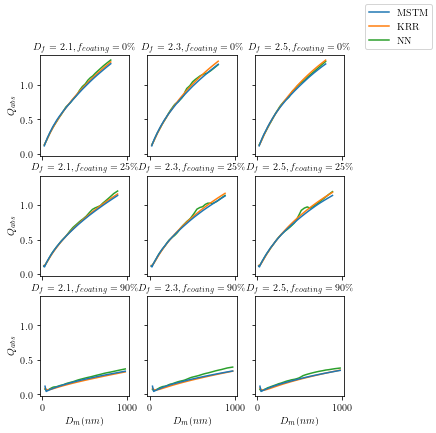

In [92]:
create_subplots(df_interpol[(df_interpol['wavelength']==660) & (df_interpol['equi_mobility_dia']<=1000)], 'equi_mobility_dia','q_abs', 'q_abs_pred_KRR', 'q_abs_pred_NN')

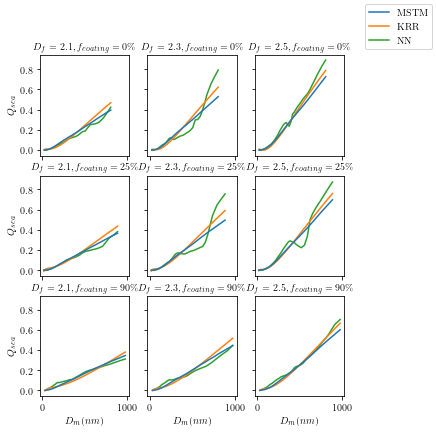

In [93]:
create_subplots(df_interpol[(df_interpol['wavelength']==660) & (df_interpol['equi_mobility_dia']<=1000)], 'equi_mobility_dia','q_sca', 'q_sca_pred_KRR', 'q_sca_pred_NN')

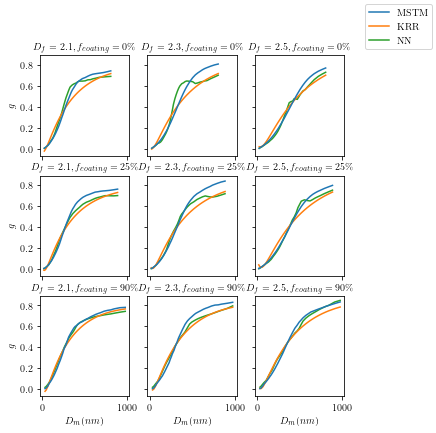

In [94]:
create_subplots(df_interpol[(df_interpol['wavelength']==660) & (df_interpol['equi_mobility_dia']<=1000)], 'equi_mobility_dia','g', 'g_pred_KRR', 'g_pred_NN')

In [76]:
def create_subplots(df_interpol):
    fig, axs = plt.subplots(3, 3, figsize= (1*text_width, 0.9*text_width), sharex= 'col', sharey='row')
    
    x_axis = 'equi_mobility_dia'
    col_MSTM = 'q_abs'
    col_KRR = 'q_abs_pred_KRR'
    col_NN = 'q_abs_pred_NN'
    
    axs[0, 0].set_title('$D_f=2.1, f_{coating}=50\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==50)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==50)][col_NN]
    axs[0, 0].plot(x, y, label= 'MSTM', zorder=3)
    axs[0, 0].plot(x, y_KRR, label='KRR', zorder=2)
    axs[0, 0].plot(x, y_NN, label='NN', zorder=1)
    axs[0, 0].set(ylabel='$Q_{abs}$')
    
    axs[0, 1].set_title('$D_f=2.3, f_{coating}=50\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==50)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==50)][col_NN]
    axs[0, 1].plot(x, y,zorder=3)
    axs[0, 1].plot(x, y_KRR, zorder=2)
    axs[0, 1].plot(x, y_NN, zorder=1)
#     axs[0, 1].set(ylabel='$Q_{abs}$')
    
    axs[0, 2].set_title('$D_f=2.5, f_{coating}=50\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==50)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==50)][col_NN]
    axs[0, 2].plot(x, y,zorder=3)
    axs[0, 2].plot(x, y_KRR, zorder=2)
    axs[0, 2].plot(x, y_NN, zorder=1)
#     axs[0, 2].set(ylabel='$Q_{abs}$')
    
    x_axis = 'equi_mobility_dia'
    col_MSTM = 'q_sca'
    col_KRR = 'q_sca_pred_KRR'
    col_NN = 'q_sca_pred_NN'
    
    axs[1, 0].set_title('$D_f=2.1, f_{coating}=50\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==50)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==50)][col_NN]
    axs[1, 0].plot(x, y,zorder=3)
    axs[1, 0].plot(x, y_KRR, zorder=2)
    axs[1, 0].plot(x, y_NN, zorder=1)
    axs[1, 0].set(ylabel='$Q_{sca}$')
    
    axs[1, 1].set_title('$D_f=2.3, f_{coating}=50\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==50)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==50)][col_NN]
    axs[1, 1].plot(x, y,zorder=3)
    axs[1, 1].plot(x, y_KRR, zorder=2)
    axs[1, 1].plot(x, y_NN, zorder=1)
#     axs[1, 1].set(ylabel='$Q_{sca}$')
    
    axs[1, 2].set_title('$D_f=2.5, f_{coating}=50\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==50)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==50)][col_NN]
    axs[1, 2].plot(x, y,zorder=3)
    axs[1, 2].plot(x, y_KRR, zorder=2)
    axs[1, 2].plot(x, y_NN, zorder=1)
#     axs[1, 2].set(ylabel='$Q_{sca}$')
    
    x_axis = 'equi_mobility_dia'
    col_MSTM = 'g'
    col_KRR = 'g_pred_KRR'
    col_NN = 'g_pred_NN'
    
    axs[2, 0].set_title('$D_f=2.1, f_{coating}=50\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==50)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==50)][col_NN]
    axs[2, 0].plot(x, y,zorder=3)
    axs[2, 0].plot(x, y_KRR, zorder=2)
    axs[2, 0].plot(x, y_NN, zorder=1)
    axs[2, 0].set(ylabel='$g$')
    
    axs[2, 1].set_title('$D_f=2.3, f_{coating}=50\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==50)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==50)][col_NN]
    axs[2, 1].plot(x, y,zorder=3)
    axs[2, 1].plot(x, y_KRR, zorder=2)
    axs[2, 1].plot(x, y_NN, zorder=1)
#     axs[2, 1].set(ylabel='$g$')
    
    axs[2, 2].set_title('$D_f=2.5, f_{coating}=50\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==50)][x_axis]
    y=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==50)][col_NN]
    axs[2, 2].plot(x, y,zorder=3)
    axs[2, 2].plot(x, y_KRR, zorder=2)
    axs[2, 2].plot(x, y_NN, zorder=1)
#     axs[2, 2].set(ylabel='$g$')
    
    
    fig.legend(loc='upper center', bbox_to_anchor=(1.05, 1))
    fig.tight_layout()
    
    for ax in axs.flat:
        ax.set(xlabel='$D_m(nm)$')

    # Hide x labels and tick labels for top plots and y ticks for right plots.
    for ax in axs.flat:
        ax.label_outer()
        
    fig.savefig(f"lineplots/lineplot_interpol_660.pdf", format="pdf", bbox_inches="tight")



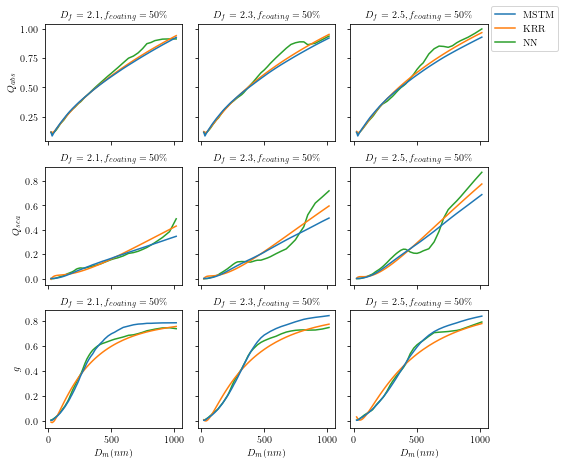

In [77]:
create_subplots(df_interpol[df_interpol['wavelength']==660])

In [24]:
# create_subplots(df_extrapol[df_extrapol['wavelength']==467], 'equi_mobility_dia','q_abs', 'q_abs_pred_KRR', 'q_abs_pred_NN')

In [25]:
# create_subplots(df_extrapol[df_extrapol['wavelength']==467], 'equi_mobility_dia','q_sca', 'q_sca_pred_KRR', 'q_sca_pred_NN')

In [26]:
# create_subplots(df_extrapol[df_extrapol['wavelength']==467], 'equi_mobility_dia','g', 'g_pred_KRR', 'g_pred_NN')

In [27]:
# create_subplots(df_extrapol[df_extrapol['wavelength']==530], 'equi_mobility_dia','q_abs', 'q_abs_pred_KRR', 'q_abs_pred_NN')

In [28]:
# create_subplots(df_extrapol[df_extrapol['wavelength']==530], 'equi_mobility_dia','q_sca', 'q_sca_pred_KRR', 'q_sca_pred_NN')

In [29]:
# create_subplots(df_extrapol[df_extrapol['wavelength']==530], 'equi_mobility_dia','g', 'g_pred_KRR', 'g_pred_NN')

In [48]:
def create_performance_plots(df_interpol):
    fig, axs = plt.subplots(3, 3, figsize= (1*text_width, 0.9*text_width), sharex= 'col', sharey='col')
    
    col_MSTM = 'q_abs'
    col_KRR = 'q_abs_pred_KRR'
    col_NN = 'q_abs_pred_NN'
    axs[0, 0].set_title('$D_f=2.1, f_{coating}=0\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==0)][col_MSTM]
    y_KRR=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==0)][col_KRR]
    y_NN=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==0)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[0, 0].scatter(x, y_KRR, c='crimson',marker='+')
    axs[0, 0].scatter(x, y_NN, c='green',marker='+')
    axs[0, 0].plot([p1, p2], [p1, p2], 'b-')
    axs[0, 0].set(ylabel='$\hat{Q}_{abs}$')

    axs[1, 0].set_title('$D_f=2.3, f_{coating}=50\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==50)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[1, 0].scatter(x, y_KRR, c='crimson',marker='+')
    axs[1, 0].scatter(x, y_NN, c='green',marker='+')
    axs[1, 0].plot([p1, p2], [p1, p2], 'b-')
    axs[1, 0].set(ylabel='$\hat{Q}_{abs}$')
    
    axs[2, 0].set_title('$D_f=2.5, f_{coating}=90\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==90)][col_MSTM]
    y_KRR=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==90)][col_KRR]
    y_NN=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==90)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[2, 0].scatter(x, y_KRR, c='crimson',marker='+')
    axs[2, 0].scatter(x, y_NN, c='green',marker='+')
    axs[2, 0].plot([p1, p2], [p1, p2], 'b-')
    axs[2, 0].set_xlabel('$Q_{abs}$')
    axs[2, 0].set(ylabel='$\hat{Q}_{abs}$')
    

    col_MSTM = 'q_sca'
    col_KRR = 'q_sca_pred_KRR'
    col_NN = 'q_sca_pred_NN'
    
    axs[0, 1].set_title('$D_f=2.1, f_{coating}=0\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==0)][col_MSTM]
    y_KRR=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==0)][col_KRR]
    y_NN=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==0)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[0,1].scatter(x, y_KRR, c='crimson',marker='+')
    axs[0,1].scatter(x, y_NN, c='green',marker='+')
    axs[0,1].plot([p1, p2], [p1, p2], 'b-')
    axs[0,1].set(ylabel='$\hat{Q}_{sca}$')
    
    axs[1, 1].set_title('$D_f=2.3, f_{coating}=50\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==50)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[1, 1].scatter(x, y_KRR, c='crimson',marker='+')
    axs[1, 1].scatter(x, y_NN, c='green',marker='+')
    axs[1, 1].plot([p1, p2], [p1, p2], 'b-')
    axs[1,1].set(ylabel='$\hat{Q}_{sca}$')

    axs[2, 1].set_title('$D_f=2.5, f_{coating}=90\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==90)][col_MSTM]
    y_KRR=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==90)][col_KRR]
    y_NN=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==90)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[2, 1].scatter(x, y_KRR, c='crimson',marker='+')
    axs[2, 1].scatter(x, y_NN, c='green',marker='+')
    axs[2, 1].plot([p1, p2], [p1, p2], 'b-')
    axs[2,1].set_xlabel('$Q_{sca}$')
    axs[2,1].set(ylabel='$\hat{Q}_{sca}$')
    
    
    col_MSTM = 'g'
    col_KRR = 'g_pred_KRR'
    col_NN = 'g_pred_NN'
    axs[0,2].set_title('$D_f=2.1, f_{coating}=0\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==0)][col_MSTM]
    y_KRR=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==0)][col_KRR]
    y_NN=df_interpol[(df_interpol['fractal_dimension']==2.1) & (df_interpol['fraction_of_coating']==0)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[0,2].scatter(x, y_KRR, c='crimson',label='KRR',marker='+')
    axs[0,2].scatter(x, y_NN, c='green', label='NN',marker='+')
    axs[0,2].plot([p1, p2], [p1, p2], 'b-')
#     axs[0,2].set_xlabel('True $Q_{abs}$')
    axs[0,2].set(ylabel='$\hat{g}$')
    
    
    axs[1,2].set_title('$D_f=2.3, f_{coating}=50\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==50)][col_MSTM]
    y_KRR=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==50)][col_KRR]
    y_NN=df_interpol[(df_interpol['fractal_dimension']==2.3) & (df_interpol['fraction_of_coating']==50)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[1,2].scatter(x, y_KRR, c='crimson',marker='+')
    axs[1,2].scatter(x, y_NN, c='green',marker='+')
    axs[1,2].plot([p1, p2], [p1, p2], 'b-')
    axs[1,2].set(ylabel='$\hat{g}$')
    
    
    
    
    axs[2, 2].set_title('$D_f=2.5, f_{coating}=90\%$')
    x=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==90)][col_MSTM]
    y_KRR=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==90)][col_KRR]
    y_NN=df_interpol[(df_interpol['fractal_dimension']==2.5) & (df_interpol['fraction_of_coating']==90)][col_NN]
    p1 = max(max(y_KRR), max(y_NN), max(x))
    p2 = min(min(y_KRR), min(y_NN),min(x))
    axs[2, 2].scatter(x, y_KRR, c='crimson',marker='+')
    axs[2, 2].scatter(x, y_NN, c='green',marker='+')
    axs[2, 2].plot([p1, p2], [p1, p2], 'b-')
    axs[2, 2].set_xlabel('$g$')
    axs[2, 2].set(ylabel='$\hat{g}$')

    
    
    fig.legend(loc='upper center', bbox_to_anchor=(1.05, 1))
    fig.tight_layout()
        
    fig.savefig(f"performance_plots/performance_plot_interpol_660.pdf", format="pdf", bbox_inches="tight")

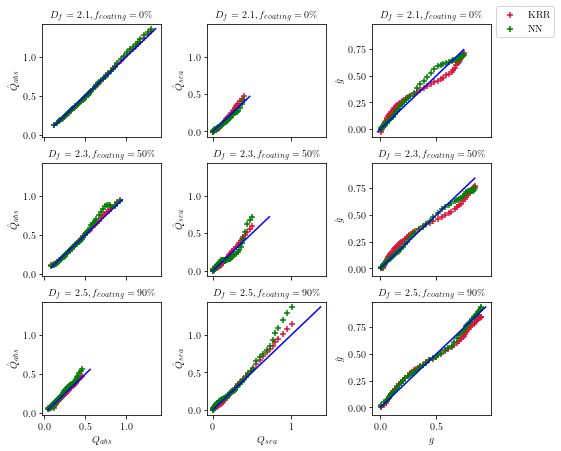

In [49]:
create_performance_plots(df_interpol[df_interpol['wavelength']==660])

In [51]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color=color)

In [52]:
def create_boxplots(df_random, df_extrapol, df_interpol, feature_x):
    fig, axs = plt.subplots(3, 3, figsize= (0.9*text_width, 0.9*text_width), sharex=True, sharey='row')
    
    data_KRR=[]
    data_NN=[]
    ticks=[]
    for i in np.sort(df_random[feature_x].unique()):
        mstm_values=df_random[(df_random[feature_x]==i)]['q_abs']
        KRR_values=df_random[(df_random[feature_x]==i)]['q_abs_pred_KRR']
        NN_values=df_random[(df_random[feature_x]==i)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(i)
    
    # Creating plot
    bpl=axs[0,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[0,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[0,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,0].plot([], c='#D7191C')
    axs[0,0].plot([], c='#2C7BB6')
    axs[0,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,0].set(ylabel='$\hat{Q_{abs}}-Q_{abs}$')
    axs[0,0].title.set_text('Random split')
    
    
    ######
    
    data_KRR=[]
    data_NN=[]
    ticks=[]
    for i in np.sort(df_interpol[feature_x].unique()):
        mstm_values=df_interpol[(df_interpol[feature_x]==i)]['q_abs']
        KRR_values=df_interpol[(df_interpol[feature_x]==i)]['q_abs_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]==i)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(i)
    
    # Creating plot
    bpl=axs[0,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[0,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[0,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    l1=axs[0,1].plot([], c='#D7191C', label='KRR')
    l2=axs[0,1].plot([], c='#2C7BB6', label='NN')
    axs[0,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,1].title.set_text('Interpolation split')
#     axs[0,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    for i in np.sort(df_extrapol[feature_x].unique()):
        mstm_values=df_extrapol[(df_extrapol[feature_x]==i)]['q_abs']
        KRR_values=df_extrapol[(df_extrapol[feature_x]==i)]['q_abs_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]==i)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(i)
    
    # Creating plot
    bpl=axs[0,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[0,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[0,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,2].plot([], c='#D7191C')
    axs[0,2].plot([], c='#2C7BB6')
    axs[0,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,2].title.set_text('Extrapolation split')
    ########
    ##################################################################
    data_KRR=[]
    data_NN=[]
    ticks=[]
    for i in np.sort(df_random[feature_x].unique()):
        mstm_values=df_random[(df_random[feature_x]==i)]['q_sca']
        KRR_values=df_random[(df_random[feature_x]==i)]['q_sca_pred_KRR']
        NN_values=df_random[(df_random[feature_x]==i)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(i)
    
    # Creating plot
    bpl=axs[1,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[1,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[1,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,0].plot([], c='#D7191C')
    axs[1,0].plot([], c='#2C7BB6')
    axs[1,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[1,0].set(ylabel='$\hat{Q_{sca}}-Q_{sca}$')
    
    
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    for i in np.sort(df_interpol[feature_x].unique()):
        mstm_values=df_interpol[(df_interpol[feature_x]==i)]['q_sca']
        KRR_values=df_interpol[(df_interpol[feature_x]==i)]['q_sca_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]==i)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(i)
    
    # Creating plot
    bpl=axs[1,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[1,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[1,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,1].plot([], c='#D7191C')
    axs[1,1].plot([], c='#2C7BB6')
    axs[1,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    
    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    for i in np.sort(df_extrapol[feature_x].unique()):
        mstm_values=df_extrapol[(df_extrapol[feature_x]==i)]['q_sca']
        KRR_values=df_extrapol[(df_extrapol[feature_x]==i)]['q_sca_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]==i)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(i)
    
    # Creating plot
    bpl=axs[1,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[1,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[1,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,2].plot([], c='#D7191C')
    axs[1,2].plot([], c='#2C7BB6')
    axs[1,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    ################################################################################3
    data_KRR=[]
    data_NN=[]
    ticks=[]
    for i in np.sort(df_random[feature_x].unique()):
        mstm_values=df_random[(df_random[feature_x]==i)]['g']
        KRR_values=df_random[(df_random[feature_x]==i)]['g_pred_KRR']
        NN_values=df_random[(df_random[feature_x]==i)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(i)
    
    # Creating plot
    bpl=axs[2,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[2,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[2,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,0].plot([], c='#D7191C')
    axs[2,0].plot([], c='#2C7BB6')
    axs[2,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,0].set(ylabel='$\hat{g}-g$')
    axs[2,0].set(xlabel='$\lambda(nm)$')
    
    
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    for i in np.sort(df_interpol[feature_x].unique()):
        mstm_values=df_interpol[(df_interpol[feature_x]==i)]['g']
        KRR_values=df_interpol[(df_interpol[feature_x]==i)]['g_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]==i)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(i)
    
    # Creating plot
    bpl=axs[2,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[2,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[2,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,1].plot([], c='#D7191C')
    axs[2,1].plot([], c='#2C7BB6')
    axs[2,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,1].set(xlabel='$\lambda(nm)$')
    
    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    for i in np.sort(df_extrapol[feature_x].unique()):
        mstm_values=df_extrapol[(df_extrapol[feature_x]==i)]['g']
        KRR_values=df_extrapol[(df_extrapol[feature_x]==i)]['g_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]==i)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(i)
    
    # Creating plot
    bpl=axs[2,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[2,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[2,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,2].plot([], c='#D7191C')
    axs[2,2].plot([], c='#2C7BB6')
    axs[2,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,2].set(xlabel='$\lambda(nm)$')
    
    fig.tight_layout()
    fig.legend(loc='upper center', bbox_to_anchor=(1.05, 0.5))
    
#     for ax in axs.flat:
#             ax.set(xlabel='Wavelength')
    # Hide x labels and tick labels for top plots and y ticks for right plots.
#     for ax in axs.flat:
#         ax.label_outer()
    
    
    fig.savefig(f"boxplots/boxplot_wavelength.pdf", format="pdf", bbox_inches="tight")
   

In [53]:
create_boxplots(df_random, df_extrapol, df_interpol, 'wavelength')

FileNotFoundError: missing font metrics file: cmr10

FileNotFoundError: missing font metrics file: cmr10

<Figure size 451.008x451.008 with 9 Axes>

In [33]:
def create_boxplots(df_random, df_extrapol, df_interpol, feature_x):
    fig, axs = plt.subplots(3, 3, figsize= (0.9*text_width, 0.9*text_width), sharex=True, sharey='row')
    
    data_KRR=[]
    data_NN=[]
    ticks=[]
    for i in np.sort(df_random[feature_x].unique()):
        mstm_values=df_random[(df_random[feature_x]==i)]['q_abs']
        KRR_values=df_random[(df_random[feature_x]==i)]['q_abs_pred_KRR']
        NN_values=df_random[(df_random[feature_x]==i)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(i)
    
    # Creating plot
    bpl=axs[0,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[0,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[0,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,0].plot([], c='#D7191C')
    axs[0,0].plot([], c='#2C7BB6')
    axs[0,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,0].set(ylabel='$\hat{Q_{abs}}-Q_{abs}$')
    axs[0,0].title.set_text('Random split')
    
    
    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    for i in np.sort(df_extrapol[feature_x].unique()):
        mstm_values=df_extrapol[(df_extrapol[feature_x]==i)]['q_abs']
        KRR_values=df_extrapol[(df_extrapol[feature_x]==i)]['q_abs_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]==i)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(i)
    
    # Creating plot
    bpl=axs[0,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[0,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[0,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,1].plot([], c='#D7191C')
    axs[0,1].plot([], c='#2C7BB6')
    axs[0,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,1].title.set_text('Extrapolation split')
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    for i in np.sort(df_interpol[feature_x].unique()):
        mstm_values=df_interpol[(df_interpol[feature_x]==i)]['q_abs']
        KRR_values=df_interpol[(df_interpol[feature_x]==i)]['q_abs_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]==i)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(i)
    
    # Creating plot
    bpl=axs[0,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[0,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[0,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    l1=axs[0,2].plot([], c='#D7191C', label='KRR')
    l2=axs[0,2].plot([], c='#2C7BB6', label='NN')
    axs[0,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,2].title.set_text('Interpolation split')
#     axs[0,2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ##################################################################
    data_KRR=[]
    data_NN=[]
    ticks=[]
    for i in np.sort(df_random[feature_x].unique()):
        mstm_values=df_random[(df_random[feature_x]==i)]['q_sca']
        KRR_values=df_random[(df_random[feature_x]==i)]['q_sca_pred_KRR']
        NN_values=df_random[(df_random[feature_x]==i)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(i)
    
    # Creating plot
    bpl=axs[1,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[1,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[1,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,0].plot([], c='#D7191C')
    axs[1,0].plot([], c='#2C7BB6')
    axs[1,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[1,0].set(ylabel='$\hat{Q_{sca}}-Q_{sca}$')
    
    
    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    for i in np.sort(df_extrapol[feature_x].unique()):
        mstm_values=df_extrapol[(df_extrapol[feature_x]==i)]['q_sca']
        KRR_values=df_extrapol[(df_extrapol[feature_x]==i)]['q_sca_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]==i)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(i)
    
    # Creating plot
    bpl=axs[1,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[1,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[1,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,1].plot([], c='#D7191C')
    axs[1,1].plot([], c='#2C7BB6')
    axs[1,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    for i in np.sort(df_interpol[feature_x].unique()):
        mstm_values=df_interpol[(df_interpol[feature_x]==i)]['q_sca']
        KRR_values=df_interpol[(df_interpol[feature_x]==i)]['q_sca_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]==i)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(i)
    
    # Creating plot
    bpl=axs[1,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[1,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[1,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,2].plot([], c='#D7191C')
    axs[1,2].plot([], c='#2C7BB6')
    axs[1,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    ################################################################################3
    data_KRR=[]
    data_NN=[]
    ticks=[]
    for i in np.sort(df_random[feature_x].unique()):
        mstm_values=df_random[(df_random[feature_x]==i)]['g']
        KRR_values=df_random[(df_random[feature_x]==i)]['g_pred_KRR']
        NN_values=df_random[(df_random[feature_x]==i)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(i)
    
    # Creating plot
    bpl=axs[2,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[2,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[2,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,0].plot([], c='#D7191C')
    axs[2,0].plot([], c='#2C7BB6')
    axs[2,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,0].set(ylabel='$\hat{g}-g$')
    axs[2,0].set(xlabel='$wavelength$')
    
    
    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    for i in np.sort(df_extrapol[feature_x].unique()):
        mstm_values=df_extrapol[(df_extrapol[feature_x]==i)]['g']
        KRR_values=df_extrapol[(df_extrapol[feature_x]==i)]['g_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]==i)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(i)
    
    # Creating plot
    bpl=axs[2,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[2,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[2,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,1].plot([], c='#D7191C')
    axs[2,1].plot([], c='#2C7BB6')
    axs[2,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,1].set(xlabel='$wavelength$')
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    for i in np.sort(df_interpol[feature_x].unique()):
        mstm_values=df_interpol[(df_interpol[feature_x]==i)]['g']
        KRR_values=df_interpol[(df_interpol[feature_x]==i)]['g_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]==i)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(i)
    
    # Creating plot
    bpl=axs[2,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[2,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[2,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,2].plot([], c='#D7191C')
    axs[2,2].plot([], c='#2C7BB6')
    axs[2,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,2].set(xlabel='$wavelength$')
    
    fig.tight_layout()
    fig.legend(loc='upper center', bbox_to_anchor=(1.05, 0.5))
    
#     for ax in axs.flat:
#             ax.set(xlabel='Wavelength')
    # Hide x labels and tick labels for top plots and y ticks for right plots.
#     for ax in axs.flat:
#         ax.label_outer()
    
    
#     fig.savefig(f"boxplots/boxplot_wavelength.pdf", format="pdf", bbox_inches="tight")
   

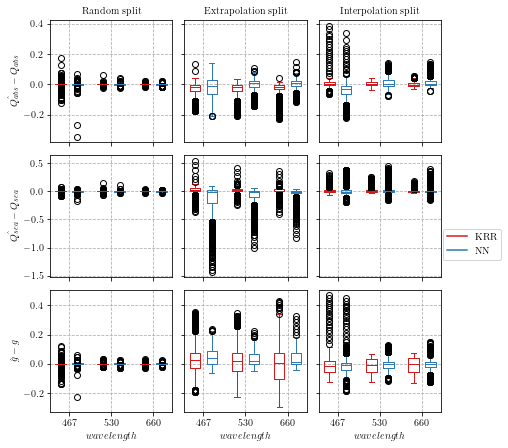

In [34]:
create_boxplots(df_random, df_extrapol, df_interpol, 'wavelength')

In [96]:
def create_boxplots(df_random, df_extrapol, df_interpol, feature_x):
    fig, axs = plt.subplots(3, 3, figsize= (1*text_width, 0.9*text_width), sharex=True, sharey='row')
    
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=1.5
    upper_val=1.7
    mstm_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_abs']
    KRR_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=1.7
    upper_val=2.3
    for i in range(0,2):
        mstm_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_abs']
        KRR_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_KRR']
        NN_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+0.2}-{upper_val}')
        lower_val=2.3
        upper_val=2.9
    
    # Creating plot
    bpl=axs[0,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[0,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[0,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,0].plot([], c='#D7191C')
    axs[0,0].plot([], c='#2C7BB6')
    axs[0,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,0].set(ylabel='$\hat{Q_{abs}}-Q_{abs}$')
    axs[0,0].title.set_text('Random split')
    
    
    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=1.5
    upper_val=1.7
    mstm_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs']
    KRR_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=1.7
    upper_val=2.3
    for i in range(0,2):
        mstm_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs']
        KRR_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+0.2}-{upper_val}')
        lower_val=2.3
        upper_val=2.9
    
    # Creating plot
    bpl=axs[0,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[0,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[0,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,1].plot([], c='#D7191C')
    axs[0,1].plot([], c='#2C7BB6')
    axs[0,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,1].title.set_text('Extrapolation split')
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=1.5
    upper_val=1.9
    mstm_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs']
    KRR_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=1.9
    upper_val=2.5
    for i in range(0,2):
        mstm_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs']
        KRR_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+0.2}-{upper_val}')
        lower_val=2.5
        upper_val=2.9
    
    # Creating plot
    bpl=axs[0,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[0,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[0,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,2].plot([], c='#D7191C', label='KRR')
    axs[0,2].plot([], c='#2C7BB6', label='NN')
    axs[0,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,2].title.set_text('Interpolation split')
#     axs[0,2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ##################################################################
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=1.5
    upper_val=1.7
    mstm_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_sca']
    KRR_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=1.7
    upper_val=2.3
    for i in range(0,2):
        mstm_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_sca']
        KRR_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_KRR']
        NN_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+0.2}-{upper_val}')
        lower_val=2.3
        upper_val=2.9
    
    # Creating plot
    bpl=axs[1,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[1,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[1,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,0].plot([], c='#D7191C')
    axs[1,0].plot([], c='#2C7BB6')
    axs[1,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[1,0].set(ylabel='$\hat{Q_{sca}}-Q_{sca}$')
    
    
    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=1.5
    upper_val=1.7
    mstm_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca']
    KRR_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=1.7
    upper_val=2.3
    for i in range(0,2):
        mstm_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca']
        KRR_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+0.2}-{upper_val}')
        lower_val=2.3
        upper_val=2.9
    
    # Creating plot
    bpl=axs[1,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[1,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[1,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,1].plot([], c='#D7191C')
    axs[1,1].plot([], c='#2C7BB6')
    axs[1,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=1.5
    upper_val=1.9
    mstm_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca']
    KRR_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=1.9
    upper_val=2.5
    for i in range(0,2):
        mstm_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca']
        KRR_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+0.2}-{upper_val}')
        lower_val=2.5
        upper_val=2.9
    
    # Creating plot
    bpl=axs[1,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[1,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[1,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,2].plot([], c='#D7191C')
    axs[1,2].plot([], c='#2C7BB6')
    axs[1,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    ################################################################################3
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=1.5
    upper_val=1.7
    mstm_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['g']
    KRR_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=1.7
    upper_val=2.3
    for i in range(0,2):
        mstm_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['g']
        KRR_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_KRR']
        NN_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+0.2}-{upper_val}')
        lower_val=2.3
        upper_val=2.9
    
    # Creating plot
    bpl=axs[2,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[2,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[2,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,0].plot([], c='#D7191C')
    axs[2,0].plot([], c='#2C7BB6')
    axs[2,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,0].set(ylabel='$\hat{g}-g$')
    axs[2,0].set(xlabel='$D_{f}$')
    
    
    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=1.5
    upper_val=1.7
    mstm_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['g']
    KRR_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['g_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=1.7
    upper_val=2.3
    for i in range(0,2):
        mstm_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['g']
        KRR_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['g_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+0.2}-{upper_val}')
        lower_val=2.3
        upper_val=2.9
    
    # Creating plot
    bpl=axs[2,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[2,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[2,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,1].plot([], c='#D7191C')
    axs[2,1].plot([], c='#2C7BB6')
    axs[2,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,1].set(xlabel='$D_{f}$')
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=1.5
    upper_val=1.9
    mstm_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['g']
    KRR_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['g_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=1.9
    upper_val=2.5
    for i in range(0,2):
        mstm_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['g']
        KRR_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['g_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+0.2}-{upper_val}')
        lower_val=2.5
        upper_val=2.9
    
    # Creating plot
    bpl=axs[2,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[2,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[2,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,2].plot([], c='#D7191C')
    axs[2,2].plot([], c='#2C7BB6')
    axs[2,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,2].set(xlabel='$D_{f}$')
    
    fig.tight_layout()
    fig.legend(loc='upper center', bbox_to_anchor=(1.05, 0.5))
    
    fig.savefig(f"boxplots/boxplot_df.pdf", format="pdf", bbox_inches="tight")

    
    
    
   

In [49]:
def create_boxplots(df_random, df_extrapol, df_interpol, feature_x):
    fig, axs = plt.subplots(3, 3, figsize= (1*text_width, 0.9*text_width), sharex='col', sharey='row')
    
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=1.5
    upper_val=1.7
    mstm_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_abs']
    KRR_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=1.7
    upper_val=2.3
    for i in range(0,2):
        mstm_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_abs']
        KRR_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_KRR']
        NN_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+0.2}-{upper_val}')
        lower_val=2.3
        upper_val=2.9
    
    # Creating plot
    bpl=axs[0,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[0,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[0,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,0].plot([], c='#D7191C')
    axs[0,0].plot([], c='#2C7BB6')
    axs[0,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,0].set(ylabel='$\hat{Q}_{abs}-Q_{abs}$')
    axs[0,0].title.set_text('Random split')
    
    
    
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=2.1
#     upper_val=1.9
    mstm_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_abs']
    KRR_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_abs_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
    lower_val=2.3
#     upper_val=2.5
    for i in range(0,2):
        mstm_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_abs']
        KRR_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_abs_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val}')
        lower_val=2.5
        
    
    # Creating plot
    bpl=axs[0,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[0,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[0,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,1].plot([], c='#D7191C', label='KRR')
    axs[0,1].plot([], c='#2C7BB6', label='NN')
    axs[0,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,1].title.set_text('Interpolation split')
#     axs[0,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=2.7
#     upper_val=1.7
    mstm_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_abs']
    KRR_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_abs_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
#     lower_val=2.9
    lower_val=2.9
    for i in range(0,1):
        mstm_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_abs']
        KRR_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_abs_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val}')
#         lower_val=2.3
#         upper_val=2.9
    
    # Creating plot
    bpl=axs[0,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[0,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[0,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,2].plot([], c='#D7191C')
    axs[0,2].plot([], c='#2C7BB6')
    axs[0,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,2].title.set_text('Extrapolation split')
    ##################################################################
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=1.5
    upper_val=1.7
    mstm_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_sca']
    KRR_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=1.7
    upper_val=2.3
    for i in range(0,2):
        mstm_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_sca']
        KRR_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_KRR']
        NN_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+0.2}-{upper_val}')
        lower_val=2.3
        upper_val=2.9
    
    # Creating plot
    bpl=axs[1,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[1,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[1,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,0].plot([], c='#D7191C')
    axs[1,0].plot([], c='#2C7BB6')
    axs[1,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[1,0].set(ylabel='$\hat{Q}_{sca}-Q_{sca}$')
    
    
    
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=2.1
#     upper_val=1.9
    mstm_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_sca']
    KRR_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_sca_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
    lower_val=2.3
#     upper_val=2.5
    for i in range(0,2):
        mstm_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_sca']
        KRR_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_sca_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val}')
        lower_val=2.5
    
    # Creating plot
    bpl=axs[1,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[1,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[1,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,1].plot([], c='#D7191C')
    axs[1,1].plot([], c='#2C7BB6')
    axs[1,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    
    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=2.7
#     upper_val=1.7
    mstm_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_sca']
    KRR_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_sca_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
#     lower_val=2.9
    lower_val=2.9
    for i in range(0,1):
        mstm_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_sca']
        KRR_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_sca_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val}')
#         lower_val=2.3
#         upper_val=2.9
    
    # Creating plot
    bpl=axs[1,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[1,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[1,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,2].plot([], c='#D7191C')
    axs[1,2].plot([], c='#2C7BB6')
    axs[1,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    ################################################################################3
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=1.5
    upper_val=1.7
    mstm_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['g']
    KRR_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=1.7
    upper_val=2.3
    for i in range(0,2):
        mstm_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['g']
        KRR_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_KRR']
        NN_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+0.2}-{upper_val}')
        lower_val=2.3
        upper_val=2.9
    
    # Creating plot
    bpl=axs[2,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[2,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[2,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,0].plot([], c='#D7191C')
    axs[2,0].plot([], c='#2C7BB6')
    axs[2,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,0].set(ylabel='$\hat{g}-g$')
    axs[2,0].set(xlabel='$D_{f}$')
    
    
    
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=2.1
#     upper_val=1.9
    mstm_values=df_interpol[(df_interpol[feature_x]==lower_val)]['g']
    KRR_values=df_interpol[(df_interpol[feature_x]==lower_val)]['g_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]==lower_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
    lower_val=2.3
#     upper_val=2.5
    for i in range(0,2):
        mstm_values=df_interpol[(df_interpol[feature_x]==lower_val)]['g']
        KRR_values=df_interpol[(df_interpol[feature_x]==lower_val)]['g_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]==lower_val)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val}')
        lower_val=2.5
    
    # Creating plot
    bpl=axs[2,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[2,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[2,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,1].plot([], c='#D7191C')
    axs[2,1].plot([], c='#2C7BB6')
    axs[2,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,1].set(xlabel='$D_{f}$')
    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=2.7
#     upper_val=1.7
    mstm_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['g']
    KRR_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['g_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
#     lower_val=2.9
    lower_val=2.9
    for i in range(0,1):
        mstm_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['g']
        KRR_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['g_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val}')
#         lower_val=2.3
#         upper_val=2.9
    
    # Creating plot
    bpl=axs[2,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[2,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[2,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,2].plot([], c='#D7191C')
    axs[2,2].plot([], c='#2C7BB6')
    axs[2,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,2].set(xlabel='$D_{f}$')
    fig.tight_layout()
    fig.legend(loc='upper center', bbox_to_anchor=(1.05, 0.5))
    
    fig.savefig(f"boxplots/boxplot_df.pdf", format="pdf", bbox_inches="tight")

    
    
    
   

In [50]:
create_boxplots(df_random, df_extrapol, df_interpol, 'fractal_dimension')

FileNotFoundError: missing font metrics file: cmr10

FileNotFoundError: missing font metrics file: cmr10

<Figure size 501.12x451.008 with 9 Axes>

In [35]:
def create_boxplots(df_random, df_extrapol, df_interpol, feature_x):
    fig, axs = plt.subplots(3, 3, figsize= (1*text_width, 0.9*text_width), sharex=True, sharey='row')
    
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=1.5
    upper_val=1.7
    mstm_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_abs']
    KRR_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=1.7
    upper_val=2.3
    for i in range(0,2):
        mstm_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_abs']
        KRR_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_KRR']
        NN_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+0.2}-{upper_val}')
        lower_val=2.3
        upper_val=2.9
    
    # Creating plot
    bpl=axs[0,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[0,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[0,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,0].plot([], c='#D7191C')
    axs[0,0].plot([], c='#2C7BB6')
    axs[0,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,0].set(ylabel='$\hat{Q_{abs}}-Q_{abs}$')
    axs[0,0].title.set_text('Random split')
    
    
    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=1.5
    upper_val=1.7
    mstm_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs']
    KRR_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=1.7
    upper_val=2.3
    for i in range(0,2):
        mstm_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs']
        KRR_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+0.2}-{upper_val}')
        lower_val=2.3
        upper_val=2.9
    
    # Creating plot
    bpl=axs[0,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[0,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[0,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,1].plot([], c='#D7191C')
    axs[0,1].plot([], c='#2C7BB6')
    axs[0,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,1].title.set_text('Extrapolation split')
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=1.5
    upper_val=1.9
    mstm_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs']
    KRR_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=1.9
    upper_val=2.5
    for i in range(0,2):
        mstm_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs']
        KRR_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+0.2}-{upper_val}')
        lower_val=2.5
        upper_val=2.9
    
    # Creating plot
    bpl=axs[0,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[0,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[0,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,2].plot([], c='#D7191C', label='KRR')
    axs[0,2].plot([], c='#2C7BB6', label='NN')
    axs[0,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,2].title.set_text('Interpolation split')
#     axs[0,2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ##################################################################
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=1.5
    upper_val=1.7
    mstm_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_sca']
    KRR_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=1.7
    upper_val=2.3
    for i in range(0,2):
        mstm_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_sca']
        KRR_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_KRR']
        NN_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+0.2}-{upper_val}')
        lower_val=2.3
        upper_val=2.9
    
    # Creating plot
    bpl=axs[1,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[1,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[1,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,0].plot([], c='#D7191C')
    axs[1,0].plot([], c='#2C7BB6')
    axs[1,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[1,0].set(ylabel='$\hat{Q_{sca}}-Q_{sca}$')
    
    
    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=1.5
    upper_val=1.7
    mstm_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca']
    KRR_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=1.7
    upper_val=2.3
    for i in range(0,2):
        mstm_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca']
        KRR_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+0.2}-{upper_val}')
        lower_val=2.3
        upper_val=2.9
    
    # Creating plot
    bpl=axs[1,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[1,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[1,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,1].plot([], c='#D7191C')
    axs[1,1].plot([], c='#2C7BB6')
    axs[1,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=1.5
    upper_val=1.9
    mstm_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca']
    KRR_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=1.9
    upper_val=2.5
    for i in range(0,2):
        mstm_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca']
        KRR_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+0.2}-{upper_val}')
        lower_val=2.5
        upper_val=2.9
    
    # Creating plot
    bpl=axs[1,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[1,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[1,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,2].plot([], c='#D7191C')
    axs[1,2].plot([], c='#2C7BB6')
    axs[1,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    ################################################################################3
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=1.5
    upper_val=1.7
    mstm_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['g']
    KRR_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=1.7
    upper_val=2.3
    for i in range(0,2):
        mstm_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['g']
        KRR_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_KRR']
        NN_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+0.2}-{upper_val}')
        lower_val=2.3
        upper_val=2.9
    
    # Creating plot
    bpl=axs[2,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[2,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[2,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,0].plot([], c='#D7191C')
    axs[2,0].plot([], c='#2C7BB6')
    axs[2,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,0].set(ylabel='$\hat{g}-g$')
    axs[2,0].set(xlabel='$D_{f}$')
    
    
    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=1.5
    upper_val=1.7
    mstm_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['g']
    KRR_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['g_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=1.7
    upper_val=2.3
    for i in range(0,2):
        mstm_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['g']
        KRR_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['g_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+0.2}-{upper_val}')
        lower_val=2.3
        upper_val=2.9
    
    # Creating plot
    bpl=axs[2,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[2,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[2,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,1].plot([], c='#D7191C')
    axs[2,1].plot([], c='#2C7BB6')
    axs[2,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,1].set(xlabel='$D_{f}$')
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=1.5
    upper_val=1.9
    mstm_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['g']
    KRR_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['g_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=1.9
    upper_val=2.5
    for i in range(0,2):
        mstm_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['g']
        KRR_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['g_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+0.2}-{upper_val}')
        lower_val=2.5
        upper_val=2.9
    
    # Creating plot
    bpl=axs[2,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[2,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[2,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,2].plot([], c='#D7191C')
    axs[2,2].plot([], c='#2C7BB6')
    axs[2,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,2].set(xlabel='$D_{f}$')
    
    fig.tight_layout()
    fig.legend(loc='upper center', bbox_to_anchor=(1.05, 0.5))
    
    fig.savefig(f"boxplots/boxplot_df.pdf", format="pdf", bbox_inches="tight")

    
    
    
   

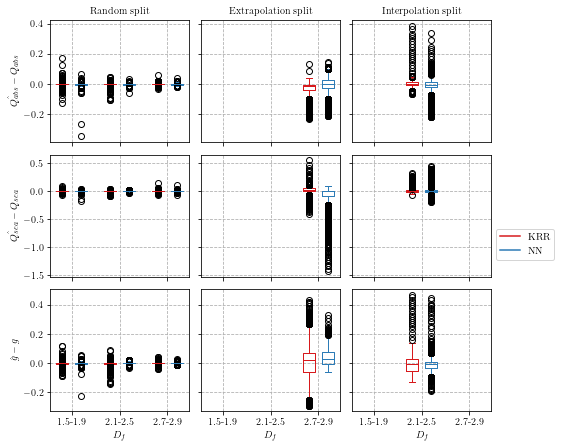

In [36]:
create_boxplots(df_random, df_extrapol, df_interpol, 'fractal_dimension')

In [47]:
def create_boxplots(df_random, df_extrapol, df_interpol, feature_x):
    fig, axs = plt.subplots(3, 3, figsize= (1*text_width, 0.9*text_width), sharex='col', sharey='row')
    
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val= 0
    upper_val=100
    mstm_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_abs']
    KRR_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    
    
    lower_val=100
    upper_val=500
    mstm_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_abs']
    KRR_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    
    lower_val=500
    mstm_values=df_random[(df_random[feature_x]>lower_val)]['q_abs']
    KRR_values=df_random[(df_random[feature_x]>lower_val)]['q_abs_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>lower_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    
    # Creating plot
    bpl=axs[0,0].boxplot(data_KRR, labels=ticks, sym="")
    bpr=axs[0,0].boxplot(data_NN, labels=ticks, sym="")
    axs[0,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,0].plot([], c='#D7191C')
    axs[0,0].plot([], c='#2C7BB6')
#     axs[0,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,0].set(ylabel='$\hat{Q}_{abs}-Q_{abs}$')
    axs[0,0].title.set_text('Random split')
    
    
    
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val= 0
    upper_val=100
    mstm_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs']
    KRR_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    
    
    lower_val=100
    upper_val=500
    mstm_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs']
    KRR_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    
    lower_val=500
    mstm_values=df_interpol[(df_interpol[feature_x]>lower_val)]['q_abs']
    KRR_values=df_interpol[(df_interpol[feature_x]>lower_val)]['q_abs_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]>lower_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
        
    
    # Creating plot
    bpl=axs[0,1].boxplot(data_KRR, labels=ticks, sym="")
    bpr=axs[0,1].boxplot(data_NN, labels=ticks, sym="")
    axs[0,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,1].plot([], c='#D7191C', label='KRR')
    axs[0,1].plot([], c='#2C7BB6', label='NN')
#     axs[0,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,1].title.set_text('Interpolation split')
#     axs[0,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))


    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val= 0
    upper_val=100
    mstm_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs']
    KRR_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    
    
    lower_val=100
    upper_val=500
    mstm_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs']
    KRR_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    
    lower_val=500
    mstm_values=df_extrapol[(df_extrapol[feature_x]>lower_val)]['q_abs']
    KRR_values=df_extrapol[(df_extrapol[feature_x]>lower_val)]['q_abs_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]>lower_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
    
    # Creating plot
    bpl=axs[0,2].boxplot(data_KRR, labels=ticks, sym="")
    bpr=axs[0,2].boxplot(data_NN, labels=ticks, sym="")
    axs[0,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,2].plot([], c='#D7191C')
    axs[0,2].plot([], c='#2C7BB6')
#     axs[0,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,2].title.set_text('Extrapolation split')
    ##################################################################
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val= 0
    upper_val=100
    mstm_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_sca']
    KRR_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    
    
    lower_val=100
    upper_val=500
    mstm_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_sca']
    KRR_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    
    lower_val=500
    mstm_values=df_random[(df_random[feature_x]>lower_val)]['q_sca']
    KRR_values=df_random[(df_random[feature_x]>lower_val)]['q_sca_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>lower_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
    
    # Creating plot
    bpl=axs[1,0].boxplot(data_KRR, labels=ticks, sym="")
    bpr=axs[1,0].boxplot(data_NN, labels=ticks, sym="")
    axs[1,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,0].plot([], c='#D7191C')
    axs[1,0].plot([], c='#2C7BB6')
#     axs[1,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[1,0].set(ylabel='$\hat{Q}_{sca}-Q_{sca}$')
#     axs[1,0].title.set_text('Random split')
    
    
    
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val= 0
    upper_val=100
    mstm_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca']
    KRR_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    
    
    lower_val=100
    upper_val=500
    mstm_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca']
    KRR_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    
    lower_val=500
    mstm_values=df_interpol[(df_interpol[feature_x]>lower_val)]['q_sca']
    KRR_values=df_interpol[(df_interpol[feature_x]>lower_val)]['q_sca_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]>lower_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
        
    
    # Creating plot
    bpl=axs[1,1].boxplot(data_KRR, labels=ticks, sym="")
    bpr=axs[1,1].boxplot(data_NN, labels=ticks, sym="")
    axs[1,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,1].plot([], c='#D7191C', label='KRR')
    axs[1,1].plot([], c='#2C7BB6', label='NN')
#     axs[1,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
#     axs[1,1].title.set_text('Interpolation split')
#     axs[0,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))


    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val= 0
    upper_val=100
    mstm_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca']
    KRR_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    
    
    lower_val=100
    upper_val=500
    mstm_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca']
    KRR_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    
    lower_val=500
    mstm_values=df_extrapol[(df_extrapol[feature_x]>lower_val)]['q_sca']
    KRR_values=df_extrapol[(df_extrapol[feature_x]>lower_val)]['q_sca_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]>lower_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
    
    # Creating plot
    bpl=axs[1,2].boxplot(data_KRR, labels=ticks, sym="")
    bpr=axs[1,2].boxplot(data_NN, labels=ticks, sym="")
    axs[1,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,2].plot([], c='#D7191C')
    axs[1,2].plot([], c='#2C7BB6')
#     axs[1,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
#     axs[1,2].title.set_text('Extrapolation split')
    ################################################################################3
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val= 0
    upper_val=100
    mstm_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['g']
    KRR_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    
    
    lower_val=100
    upper_val=500
    mstm_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['g']
    KRR_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    
    lower_val=500
    mstm_values=df_random[(df_random[feature_x]>lower_val)]['g']
    KRR_values=df_random[(df_random[feature_x]>lower_val)]['g_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>lower_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
    
    # Creating plot
    bpl=axs[2,0].boxplot(data_KRR, labels=ticks, sym="")
    bpr=axs[2,0].boxplot(data_NN, labels=ticks, sym="")
    axs[2,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,0].plot([], c='#D7191C')
    axs[2,0].plot([], c='#2C7BB6')
#     axs[2,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,0].set(ylabel='$\hat{g}- g$')
#     axs[2,0].title.set_text('Random split')
    
    
    
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val= 0
    upper_val=100
    mstm_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['g']
    KRR_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['g_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    
    
    lower_val=100
    upper_val=500
    mstm_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['g']
    KRR_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['g_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    
    lower_val=500
    mstm_values=df_interpol[(df_interpol[feature_x]>lower_val)]['g']
    KRR_values=df_interpol[(df_interpol[feature_x]>lower_val)]['g_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]>lower_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
        
    
    # Creating plot
    bpl=axs[2,1].boxplot(data_KRR, labels=ticks, sym="")
    bpr=axs[2,1].boxplot(data_NN, labels=ticks, sym="")
    axs[2,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,1].plot([], c='#D7191C', label='KRR')
    axs[2,1].plot([], c='#2C7BB6', label='NN')
#     axs[2,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
#     axs[2,1].title.set_text('Interpolation split')
#     axs[0,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))


    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val= 0
    upper_val=100
    mstm_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['g']
    KRR_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['g_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    
    
    lower_val=100
    upper_val=500
    mstm_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['g']
    KRR_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['g_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    
    lower_val=500
    mstm_values=df_extrapol[(df_extrapol[feature_x]>lower_val)]['g']
    KRR_values=df_extrapol[(df_extrapol[feature_x]>lower_val)]['g_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]>lower_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
    
    # Creating plot
    bpl=axs[2,2].boxplot(data_KRR, labels=ticks, sym="")
    bpr=axs[2,2].boxplot(data_NN, labels=ticks, sym="")
    axs[2,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,2].plot([], c='#D7191C')
    axs[2,2].plot([], c='#2C7BB6')
#     axs[2,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
#     axs[2,2].title.set_text('Extrapolation split')    
    axs[2,2].set(xlabel='$D_{mob}$')
#     fig.tight_layout()
    fig.legend(loc='upper center', bbox_to_anchor=(1.05, 0.5))
    
    fig.savefig(f"boxplots/boxplot_dmob.pdf", format="pdf", bbox_inches="tight")

    
    
    
   

In [48]:
create_boxplots(df_random, df_extrapol, df_interpol, 'equi_mobility_dia')

FileNotFoundError: missing font metrics file: cmr10

FileNotFoundError: missing font metrics file: cmr10

<Figure size 501.12x451.008 with 9 Axes>

In [ ]:
def create_boxplots(df_random, df_extrapol, df_interpol, feature_x):
    fig, axs = plt.subplots(3, 3, figsize= (1*text_width, 0.9*text_width), sharex='col', sharey='row')
    
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=1.5
    upper_val=1.7
    mstm_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_abs']
    KRR_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=1.7
    upper_val=2.3
    for i in range(0,2):
        mstm_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_abs']
        KRR_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_KRR']
        NN_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+0.2}-{upper_val}')
        lower_val=2.3
        upper_val=2.9
    
    # Creating plot
    bpl=axs[0,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[0,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[0,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,0].plot([], c='#D7191C')
    axs[0,0].plot([], c='#2C7BB6')
    axs[0,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,0].set(ylabel='$\hat{Q}_{abs}-Q_{abs}$')
    axs[0,0].title.set_text('Random split')
    
    
    
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=2.1
#     upper_val=1.9
    mstm_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_abs']
    KRR_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_abs_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
    lower_val=2.3
#     upper_val=2.5
    for i in range(0,2):
        mstm_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_abs']
        KRR_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_abs_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val}')
        lower_val=2.5
        
    
    # Creating plot
    bpl=axs[0,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[0,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[0,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,1].plot([], c='#D7191C', label='KRR')
    axs[0,1].plot([], c='#2C7BB6', label='NN')
    axs[0,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,1].title.set_text('Interpolation split')
#     axs[0,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=2.7
#     upper_val=1.7
    mstm_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_abs']
    KRR_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_abs_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
#     lower_val=2.9
    lower_val=2.9
    for i in range(0,1):
        mstm_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_abs']
        KRR_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_abs_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val}')
#         lower_val=2.3
#         upper_val=2.9
    
    # Creating plot
    bpl=axs[0,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[0,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[0,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,2].plot([], c='#D7191C')
    axs[0,2].plot([], c='#2C7BB6')
    axs[0,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,2].title.set_text('Extrapolation split')
    ##################################################################
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=1.5
    upper_val=1.7
    mstm_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_sca']
    KRR_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=1.7
    upper_val=2.3
    for i in range(0,2):
        mstm_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_sca']
        KRR_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_KRR']
        NN_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+0.2}-{upper_val}')
        lower_val=2.3
        upper_val=2.9
    
    # Creating plot
    bpl=axs[1,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[1,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[1,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,0].plot([], c='#D7191C')
    axs[1,0].plot([], c='#2C7BB6')
    axs[1,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[1,0].set(ylabel='$\hat{Q}_{sca}-Q_{sca}$')
    
    
    
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=2.1
#     upper_val=1.9
    mstm_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_sca']
    KRR_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_sca_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
    lower_val=2.3
#     upper_val=2.5
    for i in range(0,2):
        mstm_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_sca']
        KRR_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_sca_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val}')
        lower_val=2.5
    
    # Creating plot
    bpl=axs[1,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[1,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[1,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,1].plot([], c='#D7191C')
    axs[1,1].plot([], c='#2C7BB6')
    axs[1,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    
    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=2.7
#     upper_val=1.7
    mstm_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_sca']
    KRR_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_sca_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
#     lower_val=2.9
    lower_val=2.9
    for i in range(0,1):
        mstm_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_sca']
        KRR_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_sca_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val}')
#         lower_val=2.3
#         upper_val=2.9
    
    # Creating plot
    bpl=axs[1,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[1,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[1,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,2].plot([], c='#D7191C')
    axs[1,2].plot([], c='#2C7BB6')
    axs[1,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    ################################################################################3
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=1.5
    upper_val=1.7
    mstm_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['g']
    KRR_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=1.7
    upper_val=2.3
    for i in range(0,2):
        mstm_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['g']
        KRR_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_KRR']
        NN_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+0.2}-{upper_val}')
        lower_val=2.3
        upper_val=2.9
    
    # Creating plot
    bpl=axs[2,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[2,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[2,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,0].plot([], c='#D7191C')
    axs[2,0].plot([], c='#2C7BB6')
    axs[2,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,0].set(ylabel='$\hat{g}-g$')
    axs[2,0].set(xlabel='$D_{f}$')
    
    
    
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=2.1
#     upper_val=1.9
    mstm_values=df_interpol[(df_interpol[feature_x]==lower_val)]['g']
    KRR_values=df_interpol[(df_interpol[feature_x]==lower_val)]['g_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]==lower_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
    lower_val=2.3
#     upper_val=2.5
    for i in range(0,2):
        mstm_values=df_interpol[(df_interpol[feature_x]==lower_val)]['g']
        KRR_values=df_interpol[(df_interpol[feature_x]==lower_val)]['g_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]==lower_val)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val}')
        lower_val=2.5
    
    # Creating plot
    bpl=axs[2,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[2,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[2,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,1].plot([], c='#D7191C')
    axs[2,1].plot([], c='#2C7BB6')
    axs[2,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,1].set(xlabel='$D_{f}$')
    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=2.7
#     upper_val=1.7
    mstm_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['g']
    KRR_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['g_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
#     lower_val=2.9
    lower_val=2.9
    for i in range(0,1):
        mstm_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['g']
        KRR_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['g_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val}')
#         lower_val=2.3
#         upper_val=2.9
    
    # Creating plot
    bpl=axs[2,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[2,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[2,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,2].plot([], c='#D7191C')
    axs[2,2].plot([], c='#2C7BB6')
    axs[2,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,2].set(xlabel='$D_{f}$')
    fig.tight_layout()
    fig.legend(loc='upper center', bbox_to_anchor=(1.05, 0.5))
    
    fig.savefig(f"boxplots/boxplot_df.pdf", format="pdf", bbox_inches="tight")

    
    
    
   

create_boxplots(df_random, df_extrapol, df_interpol, 'fractal_dimension')

# Leave out foc(70,80,90) (KRR extrapolation)

In [42]:
parameters=[{'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1, 0.5,1],
            'kernel':['rbf'],
            'gamma':[0, 0.0001, 0.001, 0.01,0.05,0.5, 0.75, 1]}]

In [191]:
#GridSearchCV

train_set = df[(df['fraction_of_coating'] < 70)]
test_set = df[(df['fraction_of_coating'] >= 70)]
Y_train = train_set.iloc[:, 25:28]
X_train = train_set.iloc[:, :8]
Y_test = test_set.iloc[:, 25:28]
X_test = test_set.iloc[:, :8]
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.00000000001)



regressor= KernelRidge()
model=regressor.fit(X_train_transformed,Y_train)
grid_search=GridSearchCV(estimator=model,
                        param_grid=parameters,
                         cv=2,
                         scoring='neg_mean_absolute_error',
                        n_jobs=-1
                        )
grid_search= grid_search.fit(X_train_transformed,Y_train)
print('Best score in CV: ', grid_search.best_score_)
print('Best parameters in CV: ', grid_search.best_params_)

parameter_alpha=grid_search.best_params_['alpha']
parameter_kernel=grid_search.best_params_['kernel']
parameter_gamma=grid_search.best_params_['gamma']
print(parameter_alpha)
print(parameter_gamma)

Best score in CV:  -0.05005346602836477
Best parameters in CV:  {'alpha': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.001
0.01


In [43]:

train_set = df[(df['fraction_of_coating'] < 70)]
test_set = df[(df['fraction_of_coating'] >= 70)]
Y_train = train_set.iloc[:, 25:28]
X_train = train_set.iloc[:, :8]
Y_test = test_set.iloc[:, 25:28]
X_test = test_set.iloc[:, :8]

pt = PowerTransformer(method='box-cox')

X_test=X_test.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)

X_train_transformed = pt.fit_transform(X_train+0.00000000001)
X_test_transformed = pt.transform(X_test+0.000000001)




print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))

regressor = KernelRidge(alpha=0.001, gamma=0.01, kernel='rbf')


model = regressor.fit(X_train_transformed,Y_train)


Y_pred = model.predict(X_test_transformed)


Y_pred_KRR = pd.DataFrame(data=Y_pred, columns=["q_abs_pred_KRR", "q_sca_pred_KRR","g_pred_KRR"])
#Y_test.reset_index(inplace=True)
#Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_test, Y_pred_KRR, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping



                          cols  box_cox_lambdas
0                   wavelength        -1.862685
1            fractal_dimension         0.671153
2          fraction_of_coating         0.235982
3        primary_particle_size        -5.690486
4  number_of_primary_particles         0.107323
5        vol_equi_radius_outer         0.294574
6        vol_equi_radius_inner         0.321969
7            equi_mobility_dia         0.202535
Mean absolute error on test set:  [0.03260518 0.02755033 0.04234541]


In [98]:
#Neural network for extrapolation
from keras.models import Sequential
from keras.layers import Dense, Input, LeakyReLU
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger


In [194]:
df = pd.read_excel('database_new.xlsx')
train_set = df[(df['fraction_of_coating'] < 70)]
test_set = df[(df['fraction_of_coating'] >= 70)]
Y_train = train_set.iloc[:, 25:28]
X_train = train_set.iloc[:, :8]
Y_test = test_set.iloc[:, 25:28]
X_test = test_set.iloc[:, :8]


pt = PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X_train + 0.00000000001)
X_test_transformed = pt.transform(X_test + 0.00000000001)

print(pd.DataFrame({'cols': X_train.columns, 'box_cox_lambdas': pt.lambdas_}))

#model = build_model()  # params.actuvation
model = Sequential()
model.add(Input(shape=(8,)))
for j in range(0,8):
    model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(3, kernel_initializer='he_normal', activation='linear'))
        # Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

print(model.summary())

        # Running and logging model plus Early stopping



checkpoint = ModelCheckpoint('extrapolate_fwd_foc/best_model.hdf5', verbose=1, monitor='val_loss', save_best_only=True,mode='auto')
es = EarlyStopping(monitor='val_loss', patience=100, verbose=1)
callback_list = [checkpoint, es]
history = model.fit(X_train_transformed, Y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=callback_list)
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = len(loss)
print(epochs)
    # Use best model to predict
#weights_file = f'fractal_dimension_{_run._id}/best_model.hdf5'  # choose the best checkpoint
model.load_weights('extrapolate_fwd_foc/best_model.hdf5')  # load it
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

Y_pred = model.predict(X_test_transformed)

Y_pred_NN = pd.DataFrame(data=Y_pred, columns=["q_abs_pred_NN", "q_sca_pred_NN","g_pred_NN"])

error = mean_absolute_error(Y_test, Y_pred_NN, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping


                          cols  box_cox_lambdas
0                   wavelength        -1.862685
1            fractal_dimension         0.671153
2          fraction_of_coating         0.235982
3        primary_particle_size        -5.690486
4  number_of_primary_particles         0.107323
5        vol_equi_radius_outer         0.294574
6        vol_equi_radius_inner         0.321969
7            equi_mobility_dia         0.202535
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4608      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)    

Epoch 19/1000
359/363 [============================>.] - ETA: 0s - loss: 3.9201e-04 - mean_absolute_error: 0.0126
Epoch 19: val_loss improved from 0.00296 to 0.00192, saving model to extrapolate_fwd_foc/best_model.hdf5
363/363 [==============================] - 3s 8ms/step - loss: 3.9096e-04 - mean_absolute_error: 0.0126 - val_loss: 0.0019 - val_mean_absolute_error: 0.0263
Epoch 20/1000
358/363 [============================>.] - ETA: 0s - loss: 4.3100e-04 - mean_absolute_error: 0.0133
Epoch 20: val_loss did not improve from 0.00192
363/363 [==============================] - 3s 8ms/step - loss: 4.2823e-04 - mean_absolute_error: 0.0132 - val_loss: 0.0035 - val_mean_absolute_error: 0.0347
Epoch 21/1000
356/363 [============================>.] - ETA: 0s - loss: 5.1401e-04 - mean_absolute_error: 0.0146
Epoch 21: val_loss did not improve from 0.00192
363/363 [==============================] - 3s 8ms/step - loss: 5.1012e-04 - mean_absolute_error: 0.0146 - val_loss: 0.0037 - val_mean_absolute_

Epoch 70/1000
357/363 [============================>.] - ETA: 0s - loss: 1.3164e-04 - mean_absolute_error: 0.0069
Epoch 70: val_loss did not improve from 0.00114
363/363 [==============================] - 3s 8ms/step - loss: 1.3061e-04 - mean_absolute_error: 0.0069 - val_loss: 0.0020 - val_mean_absolute_error: 0.0272
Epoch 71/1000
357/363 [============================>.] - ETA: 0s - loss: 1.4867e-04 - mean_absolute_error: 0.0072
Epoch 71: val_loss did not improve from 0.00114
363/363 [==============================] - 3s 8ms/step - loss: 1.4895e-04 - mean_absolute_error: 0.0072 - val_loss: 0.0038 - val_mean_absolute_error: 0.0372
Epoch 72/1000
359/363 [============================>.] - ETA: 0s - loss: 1.2729e-04 - mean_absolute_error: 0.0068
Epoch 72: val_loss did not improve from 0.00114
363/363 [==============================] - 3s 8ms/step - loss: 1.2708e-04 - mean_absolute_error: 0.0068 - val_loss: 0.0029 - val_mean_absolute_error: 0.0327
Epoch 73/1000
357/363 [====================

Epoch 96/1000
357/363 [============================>.] - ETA: 0s - loss: 7.3669e-05 - mean_absolute_error: 0.0054
Epoch 96: val_loss did not improve from 0.00114
363/363 [==============================] - 3s 8ms/step - loss: 7.3428e-05 - mean_absolute_error: 0.0054 - val_loss: 0.0025 - val_mean_absolute_error: 0.0309
Epoch 97/1000
358/363 [============================>.] - ETA: 0s - loss: 7.7698e-05 - mean_absolute_error: 0.0055
Epoch 97: val_loss did not improve from 0.00114
363/363 [==============================] - 3s 8ms/step - loss: 7.7789e-05 - mean_absolute_error: 0.0055 - val_loss: 0.0026 - val_mean_absolute_error: 0.0310
Epoch 98/1000
363/363 [==============================] - ETA: 0s - loss: 7.1351e-05 - mean_absolute_error: 0.0054
Epoch 98: val_loss did not improve from 0.00114
363/363 [==============================] - 3s 8ms/step - loss: 7.1351e-05 - mean_absolute_error: 0.0054 - val_loss: 0.0033 - val_mean_absolute_error: 0.0354
Epoch 99/1000
357/363 [====================

Epoch 122/1000
363/363 [==============================] - ETA: 0s - loss: 5.3700e-05 - mean_absolute_error: 0.0048
Epoch 122: val_loss did not improve from 0.00114
363/363 [==============================] - 3s 8ms/step - loss: 5.3700e-05 - mean_absolute_error: 0.0048 - val_loss: 0.0017 - val_mean_absolute_error: 0.0255
Epoch 123/1000
356/363 [============================>.] - ETA: 0s - loss: 5.6646e-05 - mean_absolute_error: 0.0050
Epoch 123: val_loss did not improve from 0.00114
363/363 [==============================] - 3s 9ms/step - loss: 5.6635e-05 - mean_absolute_error: 0.0050 - val_loss: 0.0019 - val_mean_absolute_error: 0.0257
Epoch 124/1000
358/363 [============================>.] - ETA: 0s - loss: 1.9004e-04 - mean_absolute_error: 0.0082
Epoch 124: val_loss did not improve from 0.00114
363/363 [==============================] - 3s 8ms/step - loss: 1.8943e-04 - mean_absolute_error: 0.0082 - val_loss: 0.0026 - val_mean_absolute_error: 0.0311
Epoch 125/1000
359/363 [=============

In [195]:
#For plotting purpose NN

In [44]:
df = pd.read_excel('database_new.xlsx')
train_set = df[(df['fraction_of_coating'] < 70)]
test_set = df[(df['fraction_of_coating'] >= 70)]
Y_train = train_set.iloc[:, 25:28]
X_train = train_set.iloc[:, :8]
Y_test = test_set.iloc[:, 25:28]
X_test = test_set.iloc[:, :8]
X_test=X_test.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)
pt = PowerTransformer(method='box-cox')

X_test=X_test.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)

X_train_transformed = pt.fit_transform(X_train+0.00000000001)
X_test_transformed = pt.transform(X_test+0.000000001)


print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))


model = load_model('extrapolate_fwd_foc/best_model.hdf5')
Y_pred_NN = model.predict(X_test_transformed)

Y_test = pd.DataFrame(data=Y_test, columns=["q_abs", "q_sca","g"])

Y_pred_NN = pd.DataFrame(data=Y_pred_NN, columns=["q_abs_pred_NN", "q_sca_pred_NN","g_pred_NN"])
#Y_test.reset_index(inplace=True)
#Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_test, Y_pred_NN, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)

                          cols  box_cox_lambdas
0                   wavelength        -1.862685
1            fractal_dimension         0.671153
2          fraction_of_coating         0.235982
3        primary_particle_size        -5.690486
4  number_of_primary_particles         0.107323
5        vol_equi_radius_outer         0.294574
6        vol_equi_radius_inner         0.321969
7            equi_mobility_dia         0.202535
126/126 [==============================] - 1s 4ms/step
Mean absolute error on test set:  [0.05204635 0.05189579 0.03170993]


In [45]:
df_extrapol=pd.concat([X_test, Y_test, Y_pred_KRR, Y_pred_NN], axis =1)
df_extrapol= df_extrapol.sort_values(by=['equi_mobility_dia'])
df_extrapol=df_extrapol.reset_index(drop=True)
df_extrapol

,wavelength,fractal_dimension,fraction_of_coating,primary_particle_size,number_of_primary_particles,vol_equi_radius_outer,vol_equi_radius_inner,equi_mobility_dia,q_abs,q_sca,g,q_abs_pred_KRR,q_sca_pred_KRR,g_pred_KRR,q_abs_pred_NN,q_sca_pred_NN,g_pred_NN
0,660,1.5,70,22.4,0.5,17.778892,11.905508,24.988962,0.11691,0.000389,0.003798,0.051262,-0.012936,0.000919,0.106481,-0.006637,-0.008744
1,467,1.7,70,22.4,0.5,17.778892,11.905508,24.988962,0.19030,0.001535,0.007075,0.146685,-0.005247,0.003020,0.171270,-0.003813,0.001049
2,467,2.1,70,22.4,0.5,17.778892,11.905508,24.988962,0.19030,0.001535,0.007075,0.151439,-0.005961,0.002118,0.170566,-0.003271,0.002028
3,467,1.5,70,22.4,0.5,17.778892,11.905508,24.988962,0.19030,0.001535,0.007075,0.143025,-0.002875,-0.002452,0.169650,-0.003713,0.000458
4,530,2.9,70,22.4,0.5,17.778892,11.905508,24.988962,0.15654,0.000930,0.005690,0.120206,0.014289,0.050415,0.147059,-0.003553,-0.002668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4021,660,2.5,90,29.0,1000.0,290.000000,150.000000,1561.074003,0.45801,1.003600,0.900450,0.494513,0.973612,0.951833,0.736483,0.882196,0.842235
4022,467,2.1,90,29.0,1000.0,290.000000,150.000000,1561.074003,1.48740,1.534600,0.820130,1.353209,1.325952,0.821261,1.388948,1.300322,0.856149
4023,530,1.9,90,29.0,1000.0,290.000000,150.000000,1561.074003,0.86400,0.673490,0.732260,0.911299,0.750314,0.806188,1.057870,0.730218,0.786027
4024,467,2.7,90,29.0,1000.0,290.000000,150.000000,1561.074003,1.36780,2.809100,0.925200,1.259839,2.282071,0.877957,1.385631,2.044312,0.984371


# Leave out FOC(30,40,50) (KRR)

In [198]:
#GridSearchCV

train_set = df[(df['fraction_of_coating'] < 30)|(df['fraction_of_coating'] > 50)]
test_set = df[(df['fraction_of_coating'] >= 30)&(df['fraction_of_coating'] <= 50)]
Y_train = train_set.iloc[:, 25:28]
X_train = train_set.iloc[:, :8]
Y_test = test_set.iloc[:, 25:28]
X_test = test_set.iloc[:, :8]
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.00000000001)



regressor= KernelRidge()
model=regressor.fit(X_train_transformed,Y_train)
grid_search=GridSearchCV(estimator=model,
                        param_grid=parameters,
                         cv=2,
                         scoring='neg_mean_absolute_error',
                        n_jobs=-1
                        )
grid_search= grid_search.fit(X_train_transformed,Y_train)
print('Best score in CV: ', grid_search.best_score_)
print('Best parameters in CV: ', grid_search.best_params_)

parameter_alpha=grid_search.best_params_['alpha']
parameter_kernel=grid_search.best_params_['kernel']
parameter_gamma=grid_search.best_params_['gamma']
print(parameter_alpha)
print(parameter_gamma)

Best score in CV:  -0.06170307301269845
Best parameters in CV:  {'alpha': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.001
0.01


In [46]:

train_set = df[(df['fraction_of_coating'] < 30)|(df['fraction_of_coating'] > 50)]
test_set = df[(df['fraction_of_coating'] >= 30)&(df['fraction_of_coating'] <= 50)]
Y_train = train_set.iloc[:, 25:28]
X_train = train_set.iloc[:, :8]
Y_test = test_set.iloc[:, 25:28]
X_test = test_set.iloc[:, :8]

pt = PowerTransformer(method='box-cox')

X_test=X_test.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)

X_train_transformed = pt.fit_transform(X_train+0.00000000001)
X_test_transformed = pt.transform(X_test+0.000000001)




print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))

regressor = KernelRidge(alpha=0.001, gamma=0.01, kernel='rbf')


model = regressor.fit(X_train_transformed,Y_train)


Y_pred = model.predict(X_test_transformed)


Y_pred_KRR = pd.DataFrame(data=Y_pred, columns=["q_abs_pred_KRR", "q_sca_pred_KRR","g_pred_KRR"])
#Y_test.reset_index(inplace=True)
#Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_test, Y_pred_KRR, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping



                          cols  box_cox_lambdas
0                   wavelength        -1.865720
1            fractal_dimension         0.672591
2          fraction_of_coating         0.212463
3        primary_particle_size        -3.412923
4  number_of_primary_particles         0.107311
5        vol_equi_radius_outer         0.193047
6        vol_equi_radius_inner         0.321933
7            equi_mobility_dia         0.169826
Mean absolute error on test set:  [0.00676081 0.00919005 0.0269343 ]


In [47]:
#For plotting pupos, predicting for whole data

In [48]:
# df = pd.read_excel('database_new.xlsx')
# train_set = df[(df['fractal_dimension'] < 2.1)|(df['fractal_dimension'] > 2.5)]
# test_set = df[(df['fractal_dimension'] >= 2.1)&(df['fractal_dimension'] <= 2.5)]
# Y_train = train_set.iloc[:, 25:28]
# X_train = train_set.iloc[:, :8]
# Y_test = test_set.iloc[:, 25:28]
# X_test = test_set.iloc[:, :8]

# pt = PowerTransformer(method='box-cox')

# X_test=X_test.reset_index(drop=True)
# Y_test=Y_test.reset_index(drop=True)

# X_train_transformed = pt.fit_transform(X_train+0.00000000001)
# X_test_transformed = pt.transform(X_test+0.000000001)




# print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))

# regressor = KernelRidge(alpha=0.001, gamma=0.01, kernel='rbf')


# model = regressor.fit(X_train_transformed,Y_train)


# Y_pred = model.predict(X_test_transformed)


# Y_pred_KRR = pd.DataFrame(data=Y_pred, columns=["q_abs_pred_KRR", "q_sca_pred_KRR","g_pred_KRR"])
# #Y_test.reset_index(inplace=True)
# #Y_test.drop('index',axis=1, inplace=True)
# error = mean_absolute_error(Y_test, Y_pred_KRR, multioutput='raw_values')

# # error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
# print('Mean absolute error on test set: ', error)
# # Running and logging model plus Early stopping



In [49]:
#Neural network for extrapolation
from keras.models import Sequential
from keras.layers import Dense, Input, LeakyReLU
from keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger


In [9]:
df = pd.read_excel('database_new.xlsx')
train_set = df[(df['fraction_of_coating'] < 30)|(df['fraction_of_coating'] > 50)]
test_set = df[(df['fraction_of_coating'] >= 30)&(df['fraction_of_coating'] <= 50)]
Y_train = train_set.iloc[:, 25:28]
X_train = train_set.iloc[:, :8]
Y_test = test_set.iloc[:, 25:28]
X_test = test_set.iloc[:, :8]


pt = PowerTransformer(method='box-cox')
X_train_transformed = pt.fit_transform(X_train + 0.00000000001)
X_test_transformed = pt.transform(X_test + 0.00000000001)

print(pd.DataFrame({'cols': X_train.columns, 'box_cox_lambdas': pt.lambdas_}))

#model = build_model()  # params.actuvation
model = Sequential()
model.add(Input(shape=(8,)))
for j in range(0,8):
    model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(3, kernel_initializer='he_normal', activation='linear'))
        # Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

print(model.summary())

        # Running and logging model plus Early stopping



checkpoint = ModelCheckpoint('interpolate_fwd_foc/best_model.hdf5', verbose=1, monitor='val_loss', save_best_only=True,mode='auto')
es = EarlyStopping(monitor='val_loss', patience=100, verbose=1)
callback_list = [checkpoint, es]
history = model.fit(X_train_transformed, Y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=callback_list)
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = len(loss)
print(epochs)
    # Use best model to predict
#weights_file = f'fractal_dimension_{_run._id}/best_model.hdf5'  # choose the best checkpoint
model.load_weights('interpolate_fwd_foc/best_model.hdf5')  # load it
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])

Y_pred = model.predict(X_test_transformed)

Y_pred_NN = pd.DataFrame(data=Y_pred, columns=["q_abs_pred_NN", "q_sca_pred_NN","g_pred_NN"])

error = mean_absolute_error(Y_test, Y_pred_NN, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping


                          cols  box_cox_lambdas
0                   wavelength        -1.865720
1            fractal_dimension         0.672591
2          fraction_of_coating         0.212463
3        primary_particle_size        -3.412923
4  number_of_primary_particles         0.107311
5        vol_equi_radius_outer         0.193047
6        vol_equi_radius_inner         0.321933
7            equi_mobility_dia         0.169826
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               4608      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)    

2022-08-26 12:28:27.551752: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-08-26 12:28:27.551992: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-08-26 12:28:27.552055: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-08-26 12:28:27.552212: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-08-26 12:28:27.552345: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

363/363 [==============================] - ETA: 0s - loss: 0.0923 - mean_absolute_error: 0.0719
Epoch 1: val_loss improved from inf to 0.03318, saving model to interpolate_fwd_foc/best_model.hdf5
363/363 [==============================] - 4s 9ms/step - loss: 0.0923 - mean_absolute_error: 0.0719 - val_loss: 0.0332 - val_mean_absolute_error: 0.1194
Epoch 2/1000
360/363 [============================>.] - ETA: 0s - loss: 0.0012 - mean_absolute_error: 0.0245
Epoch 2: val_loss improved from 0.03318 to 0.01783, saving model to interpolate_fwd_foc/best_model.hdf5
363/363 [==============================] - 3s 8ms/step - loss: 0.0012 - mean_absolute_error: 0.0245 - val_loss: 0.0178 - val_mean_absolute_error: 0.0877
Epoch 3/1000
356/363 [============================>.] - ETA: 0s - loss: 0.0012 - mean_absolute_error: 0.0236
Epoch 3: val_loss improved from 0.01783 to 0.01441, saving model to interpolate_fwd_foc/best_model.hdf5
363/363 [==============================] - 3s 8ms/step - loss: 0.0012 - 

Epoch 25/1000
358/363 [============================>.] - ETA: 0s - loss: 5.6829e-04 - mean_absolute_error: 0.0146
Epoch 25: val_loss did not improve from 0.00664
363/363 [==============================] - 3s 8ms/step - loss: 5.6964e-04 - mean_absolute_error: 0.0146 - val_loss: 0.0147 - val_mean_absolute_error: 0.0631
Epoch 26/1000
360/363 [============================>.] - ETA: 0s - loss: 6.4045e-04 - mean_absolute_error: 0.0159
Epoch 26: val_loss did not improve from 0.00664
363/363 [==============================] - 3s 8ms/step - loss: 6.3764e-04 - mean_absolute_error: 0.0159 - val_loss: 0.0085 - val_mean_absolute_error: 0.0443
Epoch 27/1000
356/363 [============================>.] - ETA: 0s - loss: 6.1172e-04 - mean_absolute_error: 0.0157
Epoch 27: val_loss did not improve from 0.00664
363/363 [==============================] - 3s 8ms/step - loss: 6.1047e-04 - mean_absolute_error: 0.0157 - val_loss: 0.0080 - val_mean_absolute_error: 0.0449
Epoch 28/1000
359/363 [====================

362/363 [============================>.] - ETA: 0s - loss: 2.0221e-04 - mean_absolute_error: 0.0085
Epoch 75: val_loss did not improve from 0.00325
363/363 [==============================] - 3s 8ms/step - loss: 2.0218e-04 - mean_absolute_error: 0.0085 - val_loss: 0.0038 - val_mean_absolute_error: 0.0311
Epoch 76/1000
359/363 [============================>.] - ETA: 0s - loss: 1.6745e-04 - mean_absolute_error: 0.0081
Epoch 76: val_loss did not improve from 0.00325
363/363 [==============================] - 3s 8ms/step - loss: 1.7180e-04 - mean_absolute_error: 0.0081 - val_loss: 0.0126 - val_mean_absolute_error: 0.0592
Epoch 77/1000
360/363 [============================>.] - ETA: 0s - loss: 2.4402e-04 - mean_absolute_error: 0.0096
Epoch 77: val_loss did not improve from 0.00325
363/363 [==============================] - 3s 8ms/step - loss: 2.4461e-04 - mean_absolute_error: 0.0096 - val_loss: 0.0037 - val_mean_absolute_error: 0.0323
Epoch 78/1000
356/363 [============================>.] - 

Epoch 101/1000
357/363 [============================>.] - ETA: 0s - loss: 1.3097e-04 - mean_absolute_error: 0.0072
Epoch 101: val_loss did not improve from 0.00297
363/363 [==============================] - 3s 9ms/step - loss: 1.3018e-04 - mean_absolute_error: 0.0072 - val_loss: 0.0043 - val_mean_absolute_error: 0.0334
Epoch 102/1000
361/363 [============================>.] - ETA: 0s - loss: 1.0954e-04 - mean_absolute_error: 0.0066
Epoch 102: val_loss did not improve from 0.00297
363/363 [==============================] - 3s 8ms/step - loss: 1.0923e-04 - mean_absolute_error: 0.0066 - val_loss: 0.0040 - val_mean_absolute_error: 0.0316
Epoch 103/1000
357/363 [============================>.] - ETA: 0s - loss: 9.5553e-05 - mean_absolute_error: 0.0059
Epoch 103: val_loss improved from 0.00297 to 0.00292, saving model to interpolate_fwd_foc/best_model.hdf5
363/363 [==============================] - 3s 9ms/step - loss: 9.8932e-05 - mean_absolute_error: 0.0059 - val_loss: 0.0029 - val_mean_abs

Epoch 126/1000
362/363 [============================>.] - ETA: 0s - loss: 1.0765e-04 - mean_absolute_error: 0.0066
Epoch 126: val_loss did not improve from 0.00275
363/363 [==============================] - 3s 8ms/step - loss: 1.0754e-04 - mean_absolute_error: 0.0066 - val_loss: 0.0036 - val_mean_absolute_error: 0.0328
Epoch 127/1000
359/363 [============================>.] - ETA: 0s - loss: 6.8043e-05 - mean_absolute_error: 0.0054
Epoch 127: val_loss did not improve from 0.00275
363/363 [==============================] - 3s 8ms/step - loss: 6.8417e-05 - mean_absolute_error: 0.0054 - val_loss: 0.0045 - val_mean_absolute_error: 0.0352
Epoch 128/1000
357/363 [============================>.] - ETA: 0s - loss: 1.4186e-04 - mean_absolute_error: 0.0074
Epoch 128: val_loss did not improve from 0.00275
363/363 [==============================] - 3s 8ms/step - loss: 1.4059e-04 - mean_absolute_error: 0.0074 - val_loss: 0.0045 - val_mean_absolute_error: 0.0337
Epoch 129/1000
363/363 [=============

Epoch 152/1000
359/363 [============================>.] - ETA: 0s - loss: 6.6497e-05 - mean_absolute_error: 0.0052
Epoch 152: val_loss did not improve from 0.00275
363/363 [==============================] - 3s 8ms/step - loss: 6.8348e-05 - mean_absolute_error: 0.0053 - val_loss: 0.0033 - val_mean_absolute_error: 0.0320
Epoch 153/1000
356/363 [============================>.] - ETA: 0s - loss: 7.4847e-05 - mean_absolute_error: 0.0054
Epoch 153: val_loss did not improve from 0.00275
363/363 [==============================] - 3s 8ms/step - loss: 7.4459e-05 - mean_absolute_error: 0.0054 - val_loss: 0.0034 - val_mean_absolute_error: 0.0326
Epoch 154/1000
359/363 [============================>.] - ETA: 0s - loss: 5.0089e-05 - mean_absolute_error: 0.0046
Epoch 154: val_loss did not improve from 0.00275
363/363 [==============================] - 3s 8ms/step - loss: 5.0666e-05 - mean_absolute_error: 0.0046 - val_loss: 0.0041 - val_mean_absolute_error: 0.0338
Epoch 155/1000
360/363 [=============

Epoch 178/1000
361/363 [============================>.] - ETA: 0s - loss: 5.2529e-05 - mean_absolute_error: 0.0047
Epoch 178: val_loss did not improve from 0.00275
363/363 [==============================] - 3s 8ms/step - loss: 5.2536e-05 - mean_absolute_error: 0.0047 - val_loss: 0.0044 - val_mean_absolute_error: 0.0366
Epoch 179/1000
356/363 [============================>.] - ETA: 0s - loss: 7.4739e-05 - mean_absolute_error: 0.0054
Epoch 179: val_loss did not improve from 0.00275
363/363 [==============================] - 3s 8ms/step - loss: 7.8381e-05 - mean_absolute_error: 0.0055 - val_loss: 0.0052 - val_mean_absolute_error: 0.0401
Epoch 180/1000
361/363 [============================>.] - ETA: 0s - loss: 1.2645e-04 - mean_absolute_error: 0.0071
Epoch 180: val_loss did not improve from 0.00275
363/363 [==============================] - 3s 8ms/step - loss: 1.2612e-04 - mean_absolute_error: 0.0071 - val_loss: 0.0038 - val_mean_absolute_error: 0.0322
Epoch 181/1000
362/363 [=============

Epoch 204/1000
360/363 [============================>.] - ETA: 0s - loss: 7.3095e-05 - mean_absolute_error: 0.0052
Epoch 204: val_loss did not improve from 0.00275
363/363 [==============================] - 3s 8ms/step - loss: 7.2938e-05 - mean_absolute_error: 0.0052 - val_loss: 0.0041 - val_mean_absolute_error: 0.0374
Epoch 205/1000
361/363 [============================>.] - ETA: 0s - loss: 5.7737e-05 - mean_absolute_error: 0.0050
Epoch 205: val_loss did not improve from 0.00275
363/363 [==============================] - 3s 8ms/step - loss: 5.7643e-05 - mean_absolute_error: 0.0050 - val_loss: 0.0052 - val_mean_absolute_error: 0.0410
Epoch 206/1000
358/363 [============================>.] - ETA: 0s - loss: 4.1290e-05 - mean_absolute_error: 0.0043
Epoch 206: val_loss did not improve from 0.00275
363/363 [==============================] - 3s 8ms/step - loss: 4.1375e-05 - mean_absolute_error: 0.0043 - val_loss: 0.0037 - val_mean_absolute_error: 0.0350
Epoch 207/1000
360/363 [=============

In [10]:
#For plotting purpose NN

In [50]:
df = pd.read_excel('database_new.xlsx')
train_set = df[(df['fraction_of_coating'] < 30)|(df['fraction_of_coating'] > 50)]
test_set = df[(df['fraction_of_coating'] >= 30)&(df['fraction_of_coating'] <= 50)]
Y_train = train_set.iloc[:, 25:28]
X_train = train_set.iloc[:, :8]
Y_test = test_set.iloc[:, 25:28]
X_test = test_set.iloc[:, :8]
X_test=X_test.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)
pt = PowerTransformer(method='box-cox')

X_test=X_test.reset_index(drop=True)
Y_test=Y_test.reset_index(drop=True)

X_train_transformed = pt.fit_transform(X_train+0.00000000001)
X_test_transformed = pt.transform(X_test+0.000000001)


print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))


model = load_model('interpolate_fwd_foc/best_model.hdf5')
Y_pred_NN = model.predict(X_test_transformed)

Y_test = pd.DataFrame(data=Y_test, columns=["q_abs", "q_sca","g"])

Y_pred_NN = pd.DataFrame(data=Y_pred_NN, columns=["q_abs_pred_NN", "q_sca_pred_NN","g_pred_NN"])
#Y_test.reset_index(inplace=True)
#Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_test, Y_pred_NN, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)

                          cols  box_cox_lambdas
0                   wavelength        -1.865720
1            fractal_dimension         0.672591
2          fraction_of_coating         0.212463
3        primary_particle_size        -3.412923
4  number_of_primary_particles         0.107311
5        vol_equi_radius_outer         0.193047
6        vol_equi_radius_inner         0.321933
7            equi_mobility_dia         0.169826
126/126 [==============================] - 1s 4ms/step
Mean absolute error on test set:  [0.01956029 0.01467286 0.02181597]


In [51]:
df_interpol=pd.concat([X_test, Y_test, Y_pred_KRR, Y_pred_NN], axis =1)
df_interpol= df_interpol.sort_values(by=['equi_mobility_dia'])
df_interpol=df_interpol.reset_index(drop=True)
df_interpol

,wavelength,fractal_dimension,fraction_of_coating,primary_particle_size,number_of_primary_particles,vol_equi_radius_outer,vol_equi_radius_inner,equi_mobility_dia,q_abs,q_sca,g,q_abs_pred_KRR,q_sca_pred_KRR,g_pred_KRR,q_abs_pred_NN,q_sca_pred_NN,g_pred_NN
0,660,1.5,30,16.9,0.5,13.413539,11.905508,18.853279,0.11691,0.000389,0.003798,0.087137,-0.002079,0.017701,0.104959,-0.002933,-0.000693
1,660,2.1,30,16.9,0.5,13.413539,11.905508,18.853279,0.11691,0.000389,0.003798,0.120102,-0.018139,-0.001944,0.101896,-0.004363,-0.000840
2,660,2.3,30,16.9,0.5,13.413539,11.905508,18.853279,0.11691,0.000389,0.003798,0.125238,-0.014166,0.005792,0.102473,-0.004616,-0.001372
3,660,2.5,30,16.9,0.5,13.413539,11.905508,18.853279,0.11691,0.000389,0.003798,0.127424,-0.006190,0.026216,0.102896,-0.004677,-0.001510
4,660,2.7,30,16.9,0.5,13.413539,11.905508,18.853279,0.11691,0.000389,0.003798,0.126764,0.005288,0.061609,0.102755,-0.004614,-0.001384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4022,660,2.7,50,18.9,1000.0,189.000000,150.000000,1017.389609,0.96202,0.931180,0.780500,0.969463,0.920508,0.800565,1.014498,0.970350,0.765477
4023,530,2.5,50,18.9,1000.0,189.000000,150.000000,1017.389609,1.25820,1.037000,0.878560,1.261950,1.029786,0.868595,1.299161,1.072905,0.873505
4024,530,2.3,50,18.9,1000.0,189.000000,150.000000,1017.389609,1.27260,0.771920,0.861930,1.265398,0.789440,0.854804,1.311003,0.813926,0.872500
4025,467,1.5,50,18.9,1000.0,189.000000,150.000000,1017.389609,1.81220,0.548720,0.620870,1.813874,0.560176,0.579091,1.807121,0.633800,0.672052


In [53]:
def create_boxplots(df_random, df_extrapol, df_interpol, feature_x):
    fig, axs = plt.subplots(3, 3, figsize= (1*text_width, 0.9*text_width), sharex=True, sharey='row')
    
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=0
    upper_val=25
    mstm_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_abs']
    KRR_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=25
    upper_val=50
    for i in range(0,2):
        mstm_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_abs']
        KRR_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_KRR']
        NN_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+5}-{upper_val}')
        lower_val=55
        upper_val=90
    
    # Creating plot
    bpl=axs[0,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[0,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[0,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,0].plot([], c='#D7191C')
    axs[0,0].plot([], c='#2C7BB6')
    axs[0,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,0].set(ylabel='$\hat{Q_{abs}}-Q_{abs}$')
    axs[0,0].title.set_text('Random split')

    
    
    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=0
    upper_val=25
    mstm_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs']
    KRR_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=25
    upper_val=50
    for i in range(0,2):
        mstm_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs']
        KRR_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+5}-{upper_val}')
        lower_val=55
        upper_val=90
    
    # Creating plot
    bpl=axs[0,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[0,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[0,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,1].plot([], c='#D7191C')
    axs[0,1].plot([], c='#2C7BB6')
    axs[0,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,1].title.set_text('Extrapolation split')
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=0
    upper_val=25
    mstm_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs']
    KRR_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=25
    upper_val=50
    for i in range(0,2):
        mstm_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs']
        KRR_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+5}-{upper_val}')
        lower_val=55
        upper_val=90
    
    # Creating plot
    bpl=axs[0,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[0,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[0,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,2].plot([], c='#D7191C', label='KRR')
    axs[0,2].plot([], c='#2C7BB6', label='NN')
    axs[0,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,2].title.set_text('Interpolation split')
#     axs[0,2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    ##################################################################
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=0
    upper_val=25
    mstm_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_sca']
    KRR_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=25
    upper_val=50
    for i in range(0,2):
        mstm_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_sca']
        KRR_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_KRR']
        NN_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+5}-{upper_val}')
        lower_val=55
        upper_val=90
    
    # Creating plot
    bpl=axs[1,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[1,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[1,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,0].plot([], c='#D7191C')
    axs[1,0].plot([], c='#2C7BB6')
    axs[1,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[1,0].set(ylabel='$\hat{Q_{sca}}-Q_{sca}$')
    
    
    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=0
    upper_val=25
    mstm_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca']
    KRR_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=25
    upper_val=50
    for i in range(0,2):
        mstm_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca']
        KRR_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+5}-{upper_val}')
        lower_val=55
        upper_val=90
    
    # Creating plot
    bpl=axs[1,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[1,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[1,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,1].plot([], c='#D7191C')
    axs[1,1].plot([], c='#2C7BB6')
    axs[1,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=0
    upper_val=25
    mstm_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca']
    KRR_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=25
    upper_val=50
    for i in range(0,2):
        mstm_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca']
        KRR_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+5}-{upper_val}')
        lower_val=55
        upper_val=90
    
    # Creating plot
    bpl=axs[1,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[1,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[1,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,2].plot([], c='#D7191C')
    axs[1,2].plot([], c='#2C7BB6')
    axs[1,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    ################################################################################3
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=0
    upper_val=25
    mstm_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['g']
    KRR_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=25
    upper_val=50
    for i in range(0,2):
        mstm_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['g']
        KRR_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_KRR']
        NN_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+5}-{upper_val}')
        lower_val=55
        upper_val=90
    
    # Creating plot
    bpl=axs[2,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[2,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[2,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,0].plot([], c='#D7191C')
    axs[2,0].plot([], c='#2C7BB6')
    axs[2,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,0].set(ylabel='$\hat{g}-g$')
    axs[2,0].set(xlabel='$f_{coating}(\%)$')
    
    
    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=0
    upper_val=25
    mstm_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['g']
    KRR_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['g_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=25
    upper_val=50
    for i in range(0,2):
        mstm_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['g']
        KRR_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['g_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+5}-{upper_val}')
        lower_val=55
        upper_val=90
    
    # Creating plot
    bpl=axs[2,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[2,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[2,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,1].plot([], c='#D7191C')
    axs[2,1].plot([], c='#2C7BB6')
    axs[2,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,1].set(xlabel='$f_{coating}(\%)$')
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=0
    upper_val=25
    mstm_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['g']
    KRR_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['g_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=25
    upper_val=50
    for i in range(0,2):
        mstm_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['g']
        KRR_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['g_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+5}-{upper_val}')
        lower_val=55
        upper_val=90
    
    # Creating plot
    bpl=axs[2,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[2,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[2,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,2].plot([], c='#D7191C')
    axs[2,2].plot([], c='#2C7BB6')
    axs[2,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,2].set(xlabel='$f_{coating}(\%)$')
    fig.tight_layout()
    fig.legend(loc='upper center', bbox_to_anchor=(1.05, 0.5))
#     for ax in axs.flat:
#             ax.set(xlabel='$f_{coating}$')
    
#     # Hide x labels and tick labels for top plots and y ticks for right plots.
#     for ax in axs.flat:
#         ax.label_outer()
    fig.savefig(f"boxplots/boxplot_foc.pdf", format="pdf", bbox_inches="tight")
   
   

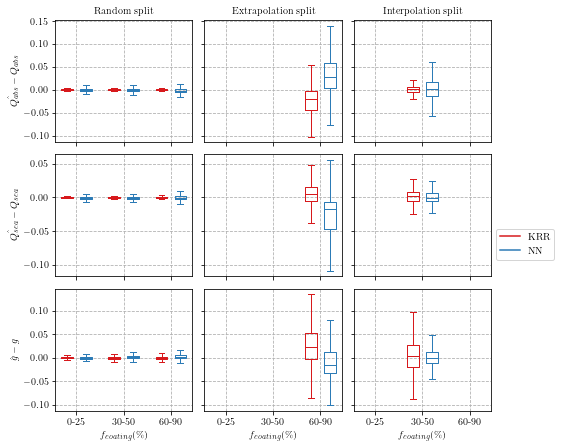

In [54]:
create_boxplots(df_random, df_extrapol, df_interpol, 'fraction_of_coating')

In [52]:
def create_boxplots(df_random, df_extrapol, df_interpol, feature_x):
    fig, axs = plt.subplots(3, 3, figsize= (1*text_width, 0.9*text_width), sharex='col', sharey='row')
    
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=0
    upper_val=25
    mstm_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_abs']
    KRR_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=25
    upper_val=50
    for i in range(0,2):
        mstm_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_abs']
        KRR_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_KRR']
        NN_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+5}-{upper_val}')
        lower_val=55
        upper_val=90
    
    # Creating plot
    bpl=axs[0,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[0,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[0,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,0].plot([], c='#D7191C')
    axs[0,0].plot([], c='#2C7BB6')
    axs[0,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,0].set(ylabel='$\hat{Q_{abs}}-Q_{abs}$')
    axs[0,0].title.set_text('Random split')

    
    
   
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=30
#     upper_val=1.9
    mstm_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_abs']
    KRR_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_abs_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
    lower_val=40
#     upper_val=2.5
    for i in range(0,2):
        mstm_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_abs']
        KRR_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_abs_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val}')
        lower_val+=10
        
    
    # Creating plot
    bpl=axs[0,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[0,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[0,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,1].plot([], c='#D7191C', label='KRR')
    axs[0,1].plot([], c='#2C7BB6', label='NN')
    axs[0,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,1].title.set_text('Interpolation split')
#     axs[0,1].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=70
#     upper_val=1.7
    mstm_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_abs']
    KRR_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_abs_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
    lower_val=80
#     upper_val=70
    for i in range(0,2):
        mstm_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_abs']
        KRR_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_abs_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val}')
        lower_val+=10
#         upper_val=2.9
    
    # Creating plot
    bpl=axs[0,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[0,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[0,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,2].plot([], c='#D7191C')
    axs[0,2].plot([], c='#2C7BB6')
    axs[0,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,2].title.set_text('Extrapolation split')
    
    ##################################################################
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=0
    upper_val=25
    mstm_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_sca']
    KRR_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=25
    upper_val=50
    for i in range(0,2):
        mstm_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_sca']
        KRR_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_KRR']
        NN_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+5}-{upper_val}')
        lower_val=55
        upper_val=90
    
    # Creating plot
    bpl=axs[1,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[1,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[1,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,0].plot([], c='#D7191C')
    axs[1,0].plot([], c='#2C7BB6')
    axs[1,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[1,0].set(ylabel='$\hat{Q_{sca}}-Q_{sca}$')
    
    
    
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=30
#     upper_val=1.9
    mstm_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_sca']
    KRR_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_sca_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
    lower_val=40
#     upper_val=2.5
    for i in range(0,2):
        mstm_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_sca']
        KRR_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_sca_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]==lower_val)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val}')
        lower_val+=10
        
    
    # Creating plot
    bpl=axs[1,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[1,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[1,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
#     axs[0,2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=70
#     upper_val=1.7
    mstm_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_sca']
    KRR_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_sca_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
    lower_val=80
#     upper_val=70
    for i in range(0,2):
        mstm_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_sca']
        KRR_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_sca_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val}')
        lower_val+=10
#         upper_val=2.9
    
    # Creating plot
    bpl=axs[1,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[1,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[1,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,2].plot([], c='#D7191C')
    axs[1,2].plot([], c='#2C7BB6')
    axs[1,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    ##################################################################
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=0
    upper_val=25
    mstm_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['g']
    KRR_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=25
    upper_val=50
    for i in range(0,2):
        mstm_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['g']
        KRR_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_KRR']
        NN_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+5}-{upper_val}')
        lower_val=55
        upper_val=90
    
    # Creating plot
    bpl=axs[2,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[2,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[2,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,0].plot([], c='#D7191C')
    axs[2,0].plot([], c='#2C7BB6')
    axs[2,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,0].set(ylabel='$\hat{g}-g$')
    axs[2,0].set(xlabel='$f_{coating}(\%)$')
    
    
    
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=30
#     upper_val=1.9
    mstm_values=df_interpol[(df_interpol[feature_x]==lower_val)]['g']
    KRR_values=df_interpol[(df_interpol[feature_x]==lower_val)]['g_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]==lower_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
    lower_val=40
#     upper_val=2.5
    for i in range(0,2):
        mstm_values=df_interpol[(df_interpol[feature_x]==lower_val)]['g']
        KRR_values=df_interpol[(df_interpol[feature_x]==lower_val)]['g_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]==lower_val)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val}')
        lower_val+=10
        
    
    # Creating plot
    bpl=axs[2,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[2,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[2,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,1].set(xlabel='$f_{coating}(\%)$')
#     axs[0,2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=70
#     upper_val=1.7
    mstm_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['g']
    KRR_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['g_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}')
    lower_val=80
#     upper_val=70
    for i in range(0,2):
        mstm_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['g']
        KRR_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['g_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]==lower_val)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val}')
        lower_val+=10
#         upper_val=2.9
    
    # Creating plot
    bpl=axs[2,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4, sym="")
    bpr=axs[2,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4, sym="")
    axs[2,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,2].plot([], c='#D7191C')
    axs[2,2].plot([], c='#2C7BB6')
    axs[2,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,2].set(xlabel='$f_{coating}(\%)$')
    ##################################################################
    fig.tight_layout()
    fig.legend(loc='upper center', bbox_to_anchor=(1.05, 0.5))
#     for ax in axs.flat:
#             ax.set(xlabel='$f_{coating}$')
    
#     # Hide x labels and tick labels for top plots and y ticks for right plots.
#     for ax in axs.flat:
#         ax.label_outer()
    fig.savefig(f"boxplots/boxplot_foc.pdf", format="pdf", bbox_inches="tight")
   
   

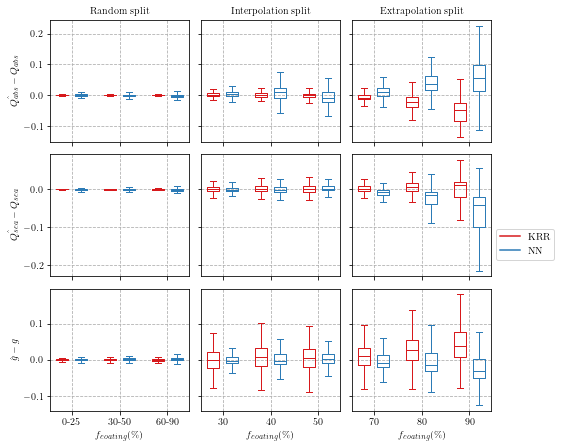

In [53]:
create_boxplots(df_random, df_extrapol, df_interpol, 'fraction_of_coating')

In [47]:
def create_boxplots(df_random, df_extrapol, df_interpol, feature_x):
    fig, axs = plt.subplots(3, 3, figsize= (1*text_width, 0.9*text_width), sharex=True, sharey='row')
    
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=0
    upper_val=25
    mstm_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_abs']
    KRR_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=25
    upper_val=50
    for i in range(0,2):
        mstm_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_abs']
        KRR_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_KRR']
        NN_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+5}-{upper_val}')
        lower_val=55
        upper_val=90
    
    # Creating plot
    bpl=axs[0,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[0,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[0,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,0].plot([], c='#D7191C')
    axs[0,0].plot([], c='#2C7BB6')
    axs[0,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,0].set(ylabel='$\hat{Q_{abs}}-Q_{abs}$')
    axs[0,0].title.set_text('Random split')

    
    
    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=0
    upper_val=25
    mstm_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs']
    KRR_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=25
    upper_val=50
    for i in range(0,2):
        mstm_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs']
        KRR_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+5}-{upper_val}')
        lower_val=55
        upper_val=90
    
    # Creating plot
    bpl=axs[0,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[0,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[0,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,1].plot([], c='#D7191C')
    axs[0,1].plot([], c='#2C7BB6')
    axs[0,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,1].title.set_text('Extrapolation split')
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=0
    upper_val=25
    mstm_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs']
    KRR_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=25
    upper_val=50
    for i in range(0,2):
        mstm_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs']
        KRR_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_abs_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+5}-{upper_val}')
        lower_val=55
        upper_val=90
    
    # Creating plot
    bpl=axs[0,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[0,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[0,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[0,2].plot([], c='#D7191C', label='KRR')
    axs[0,2].plot([], c='#2C7BB6', label='NN')
    axs[0,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[0,2].title.set_text('Interpolation split')
#     axs[0,2].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    ##################################################################
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=0
    upper_val=25
    mstm_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_sca']
    KRR_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=25
    upper_val=50
    for i in range(0,2):
        mstm_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_sca']
        KRR_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_KRR']
        NN_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+5}-{upper_val}')
        lower_val=55
        upper_val=90
    
    # Creating plot
    bpl=axs[1,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[1,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[1,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,0].plot([], c='#D7191C')
    axs[1,0].plot([], c='#2C7BB6')
    axs[1,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[1,0].set(ylabel='$\hat{Q_{sca}}-Q_{sca}$')
    
    
    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=0
    upper_val=25
    mstm_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca']
    KRR_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=25
    upper_val=50
    for i in range(0,2):
        mstm_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca']
        KRR_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+5}-{upper_val}')
        lower_val=55
        upper_val=90
    
    # Creating plot
    bpl=axs[1,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[1,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[1,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,1].plot([], c='#D7191C')
    axs[1,1].plot([], c='#2C7BB6')
    axs[1,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=0
    upper_val=25
    mstm_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca']
    KRR_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=25
    upper_val=50
    for i in range(0,2):
        mstm_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca']
        KRR_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['q_sca_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+5}-{upper_val}')
        lower_val=55
        upper_val=90
    
    # Creating plot
    bpl=axs[1,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[1,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[1,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[1,2].plot([], c='#D7191C')
    axs[1,2].plot([], c='#2C7BB6')
    axs[1,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    ################################################################################3
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=0
    upper_val=25
    mstm_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['g']
    KRR_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_KRR']
    NN_values=df_random[(df_random[feature_x]>=lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=25
    upper_val=50
    for i in range(0,2):
        mstm_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['g']
        KRR_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_KRR']
        NN_values=df_random[(df_random[feature_x]>lower_val) &(df_random[feature_x]<=upper_val)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+5}-{upper_val}')
        lower_val=55
        upper_val=90
    
    # Creating plot
    bpl=axs[2,0].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[2,0].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[2,0].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,0].plot([], c='#D7191C')
    axs[2,0].plot([], c='#2C7BB6')
    axs[2,0].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,0].set(ylabel='$\hat{g}-g$')
    axs[2,0].set(xlabel='$f_{coating}$')
    
    
    ######
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=0
    upper_val=25
    mstm_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['g']
    KRR_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['g_pred_KRR']
    NN_values=df_extrapol[(df_extrapol[feature_x]>=lower_val) &(df_extrapol[feature_x]<=upper_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=25
    upper_val=50
    for i in range(0,2):
        mstm_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['g']
        KRR_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['g_pred_KRR']
        NN_values=df_extrapol[(df_extrapol[feature_x]>lower_val) &(df_extrapol[feature_x]<=upper_val)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+5}-{upper_val}')
        lower_val=55
        upper_val=90
    
    # Creating plot
    bpl=axs[2,1].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[2,1].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[2,1].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,1].plot([], c='#D7191C')
    axs[2,1].plot([], c='#2C7BB6')
    axs[2,1].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,1].set(xlabel='$f_{coating}$')
    
    ########
    data_KRR=[]
    data_NN=[]
    ticks=[]
    lower_val=0
    upper_val=25
    mstm_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['g']
    KRR_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['g_pred_KRR']
    NN_values=df_interpol[(df_interpol[feature_x]>=lower_val) &(df_interpol[feature_x]<=upper_val)]['g_pred_NN']
    l1=KRR_values.to_numpy()-mstm_values
    l2=NN_values.to_numpy()-mstm_values
    data_KRR.append(l1)
    data_NN.append(l2)
    ticks.append(f'{lower_val}-{upper_val}')
    lower_val=25
    upper_val=50
    for i in range(0,2):
        mstm_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['g']
        KRR_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['g_pred_KRR']
        NN_values=df_interpol[(df_interpol[feature_x]>lower_val) &(df_interpol[feature_x]<=upper_val)]['g_pred_NN']
        l1=KRR_values.to_numpy()-mstm_values
        l2=NN_values.to_numpy()-mstm_values
        data_KRR.append(l1)
        data_NN.append(l2)
        ticks.append(f'{lower_val+5}-{upper_val}')
        lower_val=55
        upper_val=90
    
    # Creating plot
    bpl=axs[2,2].boxplot(data_KRR, labels=ticks, positions=np.array(range(len(data_KRR)))*2.0-0.4)
    bpr=axs[2,2].boxplot(data_NN, labels=ticks, positions=np.array(range(len(data_NN)))*2.0+0.4)
    axs[2,2].grid(linestyle="dashed")
    set_box_color(bpl, '#D7191C') 
    set_box_color(bpr, '#2C7BB6')
    axs[2,2].plot([], c='#D7191C')
    axs[2,2].plot([], c='#2C7BB6')
    axs[2,2].set_xticks(range(0, len(ticks) * 2, 2), ticks)
    axs[2,2].set(xlabel='$f_{coating}$')
    fig.tight_layout()
    fig.legend(loc='upper center', bbox_to_anchor=(1.05, 0.5))
#     for ax in axs.flat:
#             ax.set(xlabel='$f_{coating}$')
    
#     # Hide x labels and tick labels for top plots and y ticks for right plots.
#     for ax in axs.flat:
#         ax.label_outer()
#     fig.savefig(f"boxplots/boxplot_foc.pdf", format="pdf", bbox_inches="tight")
   
   

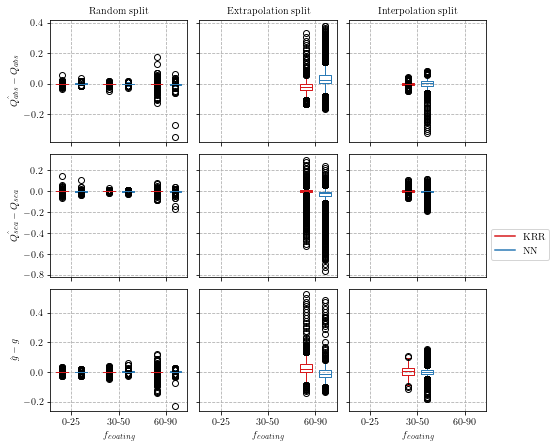

In [48]:
create_boxplots(df_random, df_extrapol, df_interpol, 'fraction_of_coating')

In [112]:
#cdcsd